In [1]:
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from matplotlib import cm
import networkx as nx
import powerlaw
import pandas as pd

In [2]:
from matplotlib import font_manager, rc
# 한글 폰트가 깨지지 않기 위한 세팅
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [3]:
file_lst = ['0306','0709','10','11_phy','12_phy_cm','12_phy_eqm']

# 함수 정의

In [4]:
def entire_Graph():
    G = nx.Graph()
    
    for file_name in file_lst:
        f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))

            # 노드 i 추가
            for i in data_line:
                if G.has_node(i):
                    G.nodes[i]['frequency'] += 1
                else:
                    G.add_node(i, frequency=1)
            # 엣지 ij 추가
            for idx, i in enumerate(data_line):
                for jdx, j in enumerate(data_line):
                    if idx >= jdx:
                        continue
                    if G.has_edge(i, j):
                        G[i][j]['weight'] += 1
                    else:
                        G.add_edge(i, j, weight=1)
        # 노드 weight 추가
        f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
        for line in f:
            data_line = list(set(line.split()))
            for i in data_line:
                sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
                G.nodes[i]['weight'] = sum_weight
    return G

In [5]:
def subject_graph(N, file_name, fig_name):
    G = nx.Graph()

    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.fruchterman_reingold_layout(G, iterations=20, weight='weight')  # 그래프의 노드 위치 결정
    plt.figure(figsize=(6,4), dpi=300)
    plt.title(fig_name, fontsize=15)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size=100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Node strength')
    
    plt.show()

In [6]:
def subject_graph_ver2(itr, seed, k, file_name):
    G = nx.Graph()

    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
                    
    # 노드와 엣지의 가중치를 저장할 딕셔너리 초기화
    node_weights = {node: data['weight'] for node, data in G.nodes(data=True)}
    edge_weights = {(u, v): data['weight'] for u, v, data in G.edges(data=True)}

    # 노드의 크기 및 엣지의 굵기를 가중치에 비례하여 설정
    #node_size = [node_weights[node] * 20 for node in G.nodes()]
    edge_width = [edge_weights[edge] * 0.1 for edge in G.edges()]
    
    # 노드 색상 매핑을 위한 컬러맵 설정
    cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
    norm = plt.Normalize(min(node_weights.values()), max(node_weights.values()))  # 노드 가중치에 따라 정규화

    # 노드 색상 설정
    node_colors = [cmap(norm(node_weights[node])) for node in G.nodes()]

    # 그래프 그리기
    pos = nx.fruchterman_reingold_layout(G, k=k, iterations=itr, weight='weight', seed=seed)  # 그래프의 노드 위치 결정
    plt.figure(figsize=(6,4), dpi=300)
    nx.draw(G, pos, with_labels=True,
            node_color=node_colors, node_size=100, width=edge_width,
            font_family = font, font_size=3)
    
    # 컬러바
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, label='Node strength')
    
    plt.show()

In [7]:
def graph(N, file_name):
    G = nx.Graph()

    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
    # 노드 i 추가
        for i in data_line:
            if G.has_node(i):
                G.nodes[i]['frequency'] += 1
            else:
                G.add_node(i, frequency=1)
    # 엣지 ij 추가
        for idx, i in enumerate(data_line):
            for jdx, j in enumerate(data_line):
                if idx >= jdx:
                    continue
                if G.has_edge(i, j):
                    G[i][j]['weight'] += 1
                else:
                    G.add_edge(i, j, weight=1)
    # 노드 weight 추가
    f = open(f"NewPhy_{file_name}.txt", 'r', encoding='UTF-8')
    for line in f:
        data_line = list(set(line.split()))
        for i in data_line:
            sum_weight = sum(data['weight'] for u, v, data in G.edges(i, data=True))
            G.nodes[i]['weight'] = sum_weight
    
    return G

In [8]:
def basic_info(G):
    
    hist_wordFreq = []
    hist_edges = []
    hist_nodeWeight = []
    hist_edgeWeight = []

    for i in list(G.nodes):
        hist_edges.append(G.degree[i])
        hist_wordFreq.append(G.nodes[i]['frequency'])
        hist_nodeWeight.append(G.nodes[i]['weight'])

    for edge in list(G.edges):
        i, j = edge[0], edge[1]
        hist_edgeWeight.append(G[i][j]['weight'])

    print(f'Number of nodes: {G.number_of_nodes()}')
    print(f'Number of edges: {G.number_of_edges()}')
    
    print(f'WordFreq avg: {round(np.average(hist_wordFreq), 2)}, WordFreq std: {round(np.std(hist_wordFreq), 2)}')
    print(f'Degree avg: {round(np.average(hist_edges), 2)}, Degree std: {round(np.std(hist_edges), 2)}')
    print(f'NodeWeight avg: {round(np.average(hist_nodeWeight), 2)}, NodeWeight std: {round(np.std(hist_nodeWeight), 2)}')
    print(f'EdgeWeight avg: {round(np.average(hist_edgeWeight), 2)}, EdgeWeight std: {round(np.std(hist_edgeWeight), 2)}')
    
    return hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight

In [9]:
def hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight):

    plt.figure(figsize=(13,4), dpi=300)
    
    plt.subplot(1,3,1)
    plt.title('Dist. of node degree')
    plt.hist(hist_edges)
    plt.yscale('log')
    plt.xlabel('Node degree')
    
    plt.subplot(1,3,2)
    plt.title('Dist. of edge weight')
    plt.hist(hist_edgeWeight)
    plt.yscale('log')
    plt.xlabel('Edge weight')

    plt.subplot(1,3,3)
    plt.title('Dist. of node strength')
    plt.hist(hist_nodeWeight)
    plt.yscale('log')
    plt.xlabel('Node strength')

In [10]:
def power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight):
    
    compare_lst = ['exponential', 'truncated_power_law', 'lognormal']
    
    plt.figure(figsize=(16,4), dpi=300)

    plt.subplot(1,4,1)
    plt.title('Dist. of word frequency')
    fit = powerlaw.Fit(hist_wordFreq)
    fig1 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig1)
    plt.ylabel('Probability')
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3:
        print(f"1: Pass, {fit.power_law.alpha}\n")
    
    plt.subplot(1,4,2)
    plt.title('Dist. of degree')
    fit = powerlaw.Fit(hist_edges)
    fig1 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig1)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3:
        print(f"2: Pass, {fit.power_law.alpha}\n")

    plt.subplot(1,4,3)
    plt.title('Dist. of node strength')
    fit = powerlaw.Fit(hist_nodeWeight)
    fig2 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig2)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3: print(f"3: Pass, {fit.power_law.alpha}\n")

    plt.subplot(1,4,4)
    plt.title('Dist. of edge weight')
    fit = powerlaw.Fit(hist_edgeWeight)
    fig3 = fit.plot_ccdf(color = 'b')
    fit.power_law.plot_ccdf(color = 'r', linestyle = '--', ax=fig3)
    check = [1,1,1]
    for i, compare in enumerate(compare_lst):
        R, p = fit.distribution_compare('power_law',compare, normalized_ratio = True)
        if p < 0.05:
            check[i] = 0
    if sum(check) == 3: print(f"4: Pass, {fit.power_law.alpha}\n")

In [11]:
def info(G):
    node_freq = {node: G.nodes[node]['frequency'] for node in G.nodes()}

    node_degree = dict(G.degree())

    # 각 노드의 강도(weight) 계산
    node_strength = dict(nx.degree(G, weight='weight'))

    # 각 엣지의 가중치(weight) 계산
    edge_weight = dict(nx.get_edge_attributes(G, 'weight'))

    # betweenness centrality 계산
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')

    # 결과 출력
    data = sorted(node_freq.items(), key=lambda x: x[1], reverse=True)
    df1 = pd.DataFrame(data, columns=['Node_F','Node Frequency'])

    #print("Node Degree:")
    data = sorted(node_degree.items(), key=lambda x: x[1], reverse=True)
    df2 = pd.DataFrame(data, columns=['Node_ND','Node Degree'])

    #print("\nNode Strength:")
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', 'Node Strength'])

    #print("\nEdge Weight:")
    data = sorted(edge_weight.items(), key=lambda x: x[1], reverse=True)
    df4 = pd.DataFrame(data, columns=['Edge', 'Edge Weight'])

    #print("\nBetweenness Centrality:")
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', 'Betweenness Centrality'])

    df = pd.concat([df1,df2,df3,df4,df5],axis=1)
    
    return df

# 키워드 추출

In [12]:
result = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    node_freq = {node: G.nodes[node]['frequency'] for node in G.nodes()}
    data = sorted(node_freq.items(), key=lambda x: x[1], reverse=True)
    df = pd.DataFrame(data, columns=['Node_F',file])
    result = pd.concat([result, df], axis=1)

print('Node Frequency')
result.head(10)

Node Frequency


Node_F  Total Node_F  0306 Node_F  0709 Node_F   10  Node_F  11_phy  Node_F  \
0     물체     26     물체  12.0     물체   8.0     지구  5.0       빛     4.0      물체   
1     물질     15     기체   5.0     운동   7.0   우주초기  2.0  역학적에너지     3.0      운동   
2      빛     14     물질   4.0     물질   6.0     물질  2.0      전환     3.0       열   
3     운동     13     온도   4.0     상태   4.0     원소  2.0     에너지     3.0       힘   
4      힘      9      힘   3.0   입자모형   4.0     형성  2.0      작용     2.0      작용   
5     기체      9     무게   3.0      힘   4.0     전환  2.0    보존법칙     2.0  역학적에너지   
6     상태      9     상태   3.0     입자   3.0     공간  1.0       열     2.0      행성   
7    에너지      9     소리   3.0     기체   3.0     길이  1.0      센서     2.0      합력   
8     작용      8     자석   3.0     온도   2.0     시간  1.0     반도체     2.0  뉴턴운동법칙   
9     온도      7      물   3.0     전달   2.0    디지털  1.0     돌림힘     1.0   포물선운동   

   12_phy_cm Node_F  12_phy_eqm  
0        4.0      빛         4.0  
1        3.0    디지털         3.0  
2        3.0     확률         3.0  
3        2.0     방향         2.0  
4        2.0     세기         2.0  
5        2.0    인덕터         2.0  
6        2.0    에너지         2.0  
7        1.0     간섭         2.0  
8        1.0     양자         2.0  
9        1.0   전기력선         1.0

In [13]:
result1 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    node_strength = dict(nx.degree(G, weight='weight'))
    data = sorted(node_strength.items(), key=lambda x: x[1], reverse=True)
    df3 = pd.DataFrame(data, columns=['Node_NS', file])
    result1 = pd.concat([result1, df3], axis=1)

print('Node Strength')
result1.head(10)

Node Strength


Node_NS  Total Node_NS  0306 Node_NS  0709 Node_NS    10 Node_NS  11_phy  \
0      물체     80      물체  25.0      물체  31.0      지구  19.0       빛    14.0   
1       빛     56       힘  10.0      운동  27.0    우주초기  13.0      전환    11.0   
2      운동     48      물질   8.0       힘  16.0      원소  13.0     에너지    11.0   
3      물질     47      기체   8.0      물질  15.0      형성  13.0  역학적에너지    10.0   
4       힘     35       빛   8.0      중력  12.0      전환  12.0      작용     9.0   
5     에너지     35      전지   8.0      전달  11.0      물질   9.0    보존법칙     8.0   
6      전환     33      연결   8.0      입자  10.0      방출   7.0     반도체     8.0   
7      작용     30    전기회로   8.0      모형  10.0      천체   7.0      센서     7.0   
8      상태     26      온도   7.0    입자모형  10.0    스펙트럼   7.0       열     6.0   
9       열     25      지레   6.0      방향  10.0       빛   7.0      전기     6.0   

  Node_NS  12_phy_cm Node_NS  12_phy_eqm  
0      물체       14.0       빛        20.0  
1      운동       13.0      확률        14.0  
2       열       13.0     디지털        11.0  
3      행성       11.0      양자        11.0  
4  역학적에너지       10.0      방향        10.0  
5       힘        9.0      세기        10.0  
6      작용        9.0     에너지        10.0  
7     운동량        7.0      간섭         9.0  
8    탈출속도        7.0      방출         7.0  
9      궤도        7.0      생성         7.0

In [14]:
result2 = pd.DataFrame()
for idx in range(7):
    if idx == 0:
        G = entire_Graph()
        file = 'Total'
    else:
        G = graph(3, file_lst[idx-1])
        file = file_lst[idx-1]
    components = nx.connected_components(G)
    largest_component = max(components, key=len)
    H = G.subgraph(largest_component)
    betweenness_centrality = nx.current_flow_betweenness_centrality(H, weight='weight')
    data = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)
    df5 = pd.DataFrame(data, columns=['Node_BC', file])
    result2 = pd.concat([result2, df5], axis=1)

print('Betweenness Centrality')
result2.head(10)

Betweenness Centrality


Node_BC     Total Node_BC      0306 Node_BC      0709 Node_BC        10  \
0       빛  0.298037      물체  0.788332      물체  0.456678      지구  0.713654   
1      물체  0.287116       빛  0.313468      운동  0.436328      전환  0.380366   
2      물질  0.188850      물질  0.295373      모형  0.315845      물질  0.131289   
3      운동  0.148757      기체  0.255961       힘  0.309820      형성  0.127176   
4     에너지  0.146563      상태  0.236754      전환  0.286417    우주초기  0.127176   
5      상태  0.118867      온도  0.206567      저항  0.264505      원소  0.127176   
6      전환  0.116714       물  0.166869      전류  0.258736      흐름  0.081633   
7       열  0.113137      소리  0.154425      중력  0.182138      질량  0.081633   
8      간섭  0.092395      무게  0.125433      전달  0.164606   수소핵융합  0.081633   
9      전달  0.085750       힘  0.114458      물질  0.157906      태양  0.081633   

  Node_BC    11_phy Node_BC  12_phy_cm Node_BC  12_phy_eqm  
0  역학적에너지  0.563022      물체   0.451729       빛    0.711296  
1     에너지  0.491653      운동   0.376993      간섭    0.482223  
2    보존법칙  0.490476      행성   0.352644     에너지    0.300101  
3      작용  0.341975  역학적에너지   0.316766      확률    0.268500  
4      전환  0.338539      작용   0.108096     인덕터    0.170040  
5      센서  0.286905       힘   0.108096     디지털    0.168730  
6       열  0.160886      중력   0.084323      양자    0.165962  
7       일  0.112698    인공위성   0.084323      회절    0.126181  
8   위치에너지  0.112698   케플러법칙   0.084323    홀로그램    0.126181  
9   운동에너지  0.112698   포물선운동   0.082907      파동    0.069701

# 전체 물리학 용어 및 커뮤니티

## 커뮤니티

In [15]:
G = entire_Graph()

In [16]:
# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp = nx.community.greedy_modularity_communities(G, weight='weight')
communities = list(comp)

len(communities)

15

In [17]:
nx.community.modularity(G, comp)

0.5999817883809871

In [18]:
# 모든 연결 성분 찾기
connected_components = list(nx.connected_components(G))

#가장 큰 연결 성분 찾기
giant_component = max(connected_components, key=len)

# 가장 큰 연결 성분으로 구성된 서브그래프 생성
G_giant = G.subgraph(giant_component)

# Girvan-Newman 알고리즘을 사용하여 커뮤니티 탐지
comp_giant = nx.community.greedy_modularity_communities(G_giant, weight='weight')
communities_giant = list(comp_giant)

len(communities_giant)

7

In [30]:
import seaborn as sns

In [31]:
sum_matrix = np.zeros((7,7))

for i in range(7):
    for j in range(7):
        sum_comp = []
        for x in range(len(list(communities_giant[i]))):
            for y in range(len(list(communities_giant[j]))):
                s = list(communities_giant[i])[x]
                t = list(communities_giant[j])[y]
                sum_comp.append(nx.shortest_path_length(G_giant, source=s, target=t))
        sum_matrix[i][j] = np.average(sum_comp)

In [32]:
sum_matrix

array([[2.46828143, 3.00809889, 3.48788927, 3.34313725, 3.30522876,
        2.78649237, 3.8974359 ],
       [3.00809889, 2.11814745, 3.39450128, 3.0142663 , 2.8826087 ,
        3.16666667, 4.04682274],
       [3.48788927, 3.39450128, 2.46712803, 3.671875  , 3.15294118,
        3.18464052, 4.13574661],
       [3.34313725, 3.0142663 , 3.671875  , 2.62890625, 3.08854167,
        3.03472222, 4.16826923],
       [3.30522876, 2.8826087 , 3.15294118, 3.08854167, 2.05555556,
        2.83888889, 3.83333333],
       [2.78649237, 3.16666667, 3.18464052, 3.03472222, 2.83888889,
        1.72839506, 3.52991453],
       [3.8974359 , 4.04682274, 4.13574661, 4.16826923, 3.83333333,
        3.52991453, 2.08284024]])

In [33]:
list = []
for idx, data in enumerate(sum_matrix):
    # 제외할 인덱스
    index_to_exclude = idx
    # 새로운 리스트 생성 (index_to_exclude 인덱스를 제외한 리스트)
    filtered_data = [value for i, value in enumerate(data) if i != index_to_exclude]
    print(np.average(filtered_data))
    list.append(np.average(filtered_data))

3.3047137417204113
3.2521607632740945
3.5045989763016707
3.386801946484651
3.1835904198635974
3.0902208675492986
3.9352537233771243


Text(0, 0.5, 'Average shortest path length')

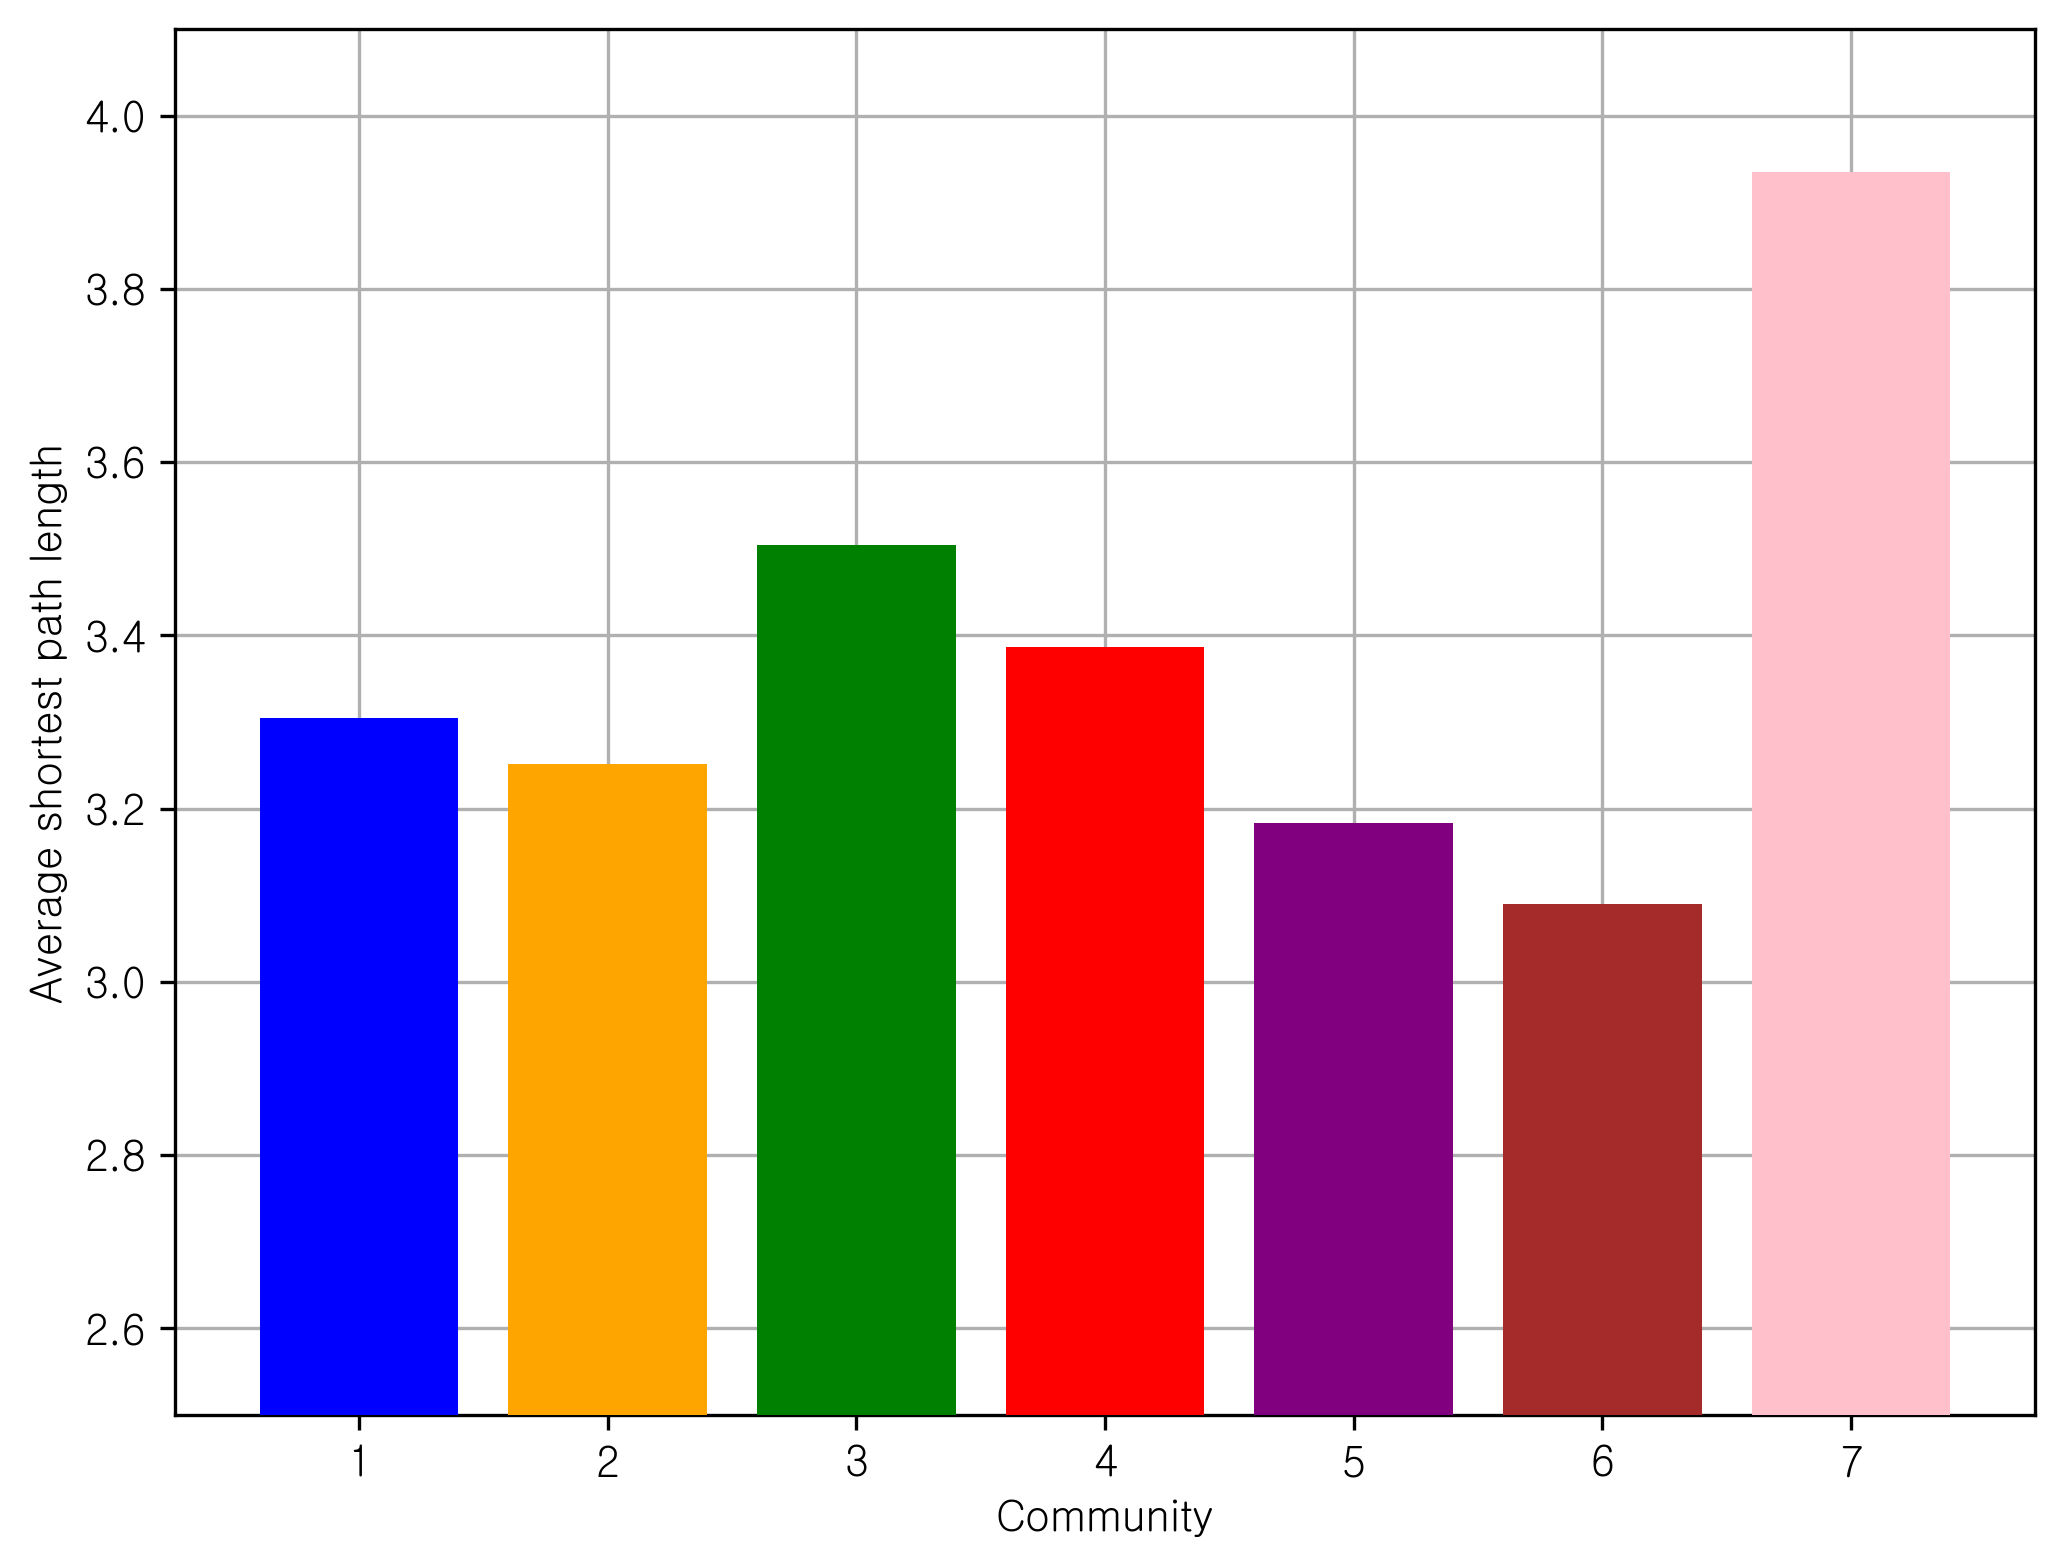

In [34]:
fig, ax = plt.subplots(figsize=(8, 6), dpi=300)

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink']

# 그리드를 그리기 (zorder를 낮게 설정)
ax.grid(True, zorder=0)

# 막대 그래프 그리기 (zorder를 높게 설정)
x_labels = range(1, 8)
ax.bar(x_labels, list, color=colors, zorder=3)
ax.set_xticks(x_labels)
ax.set_ylim(2.5, 4.1)

plt.xlabel('Community')
plt.ylabel('Average shortest path length')

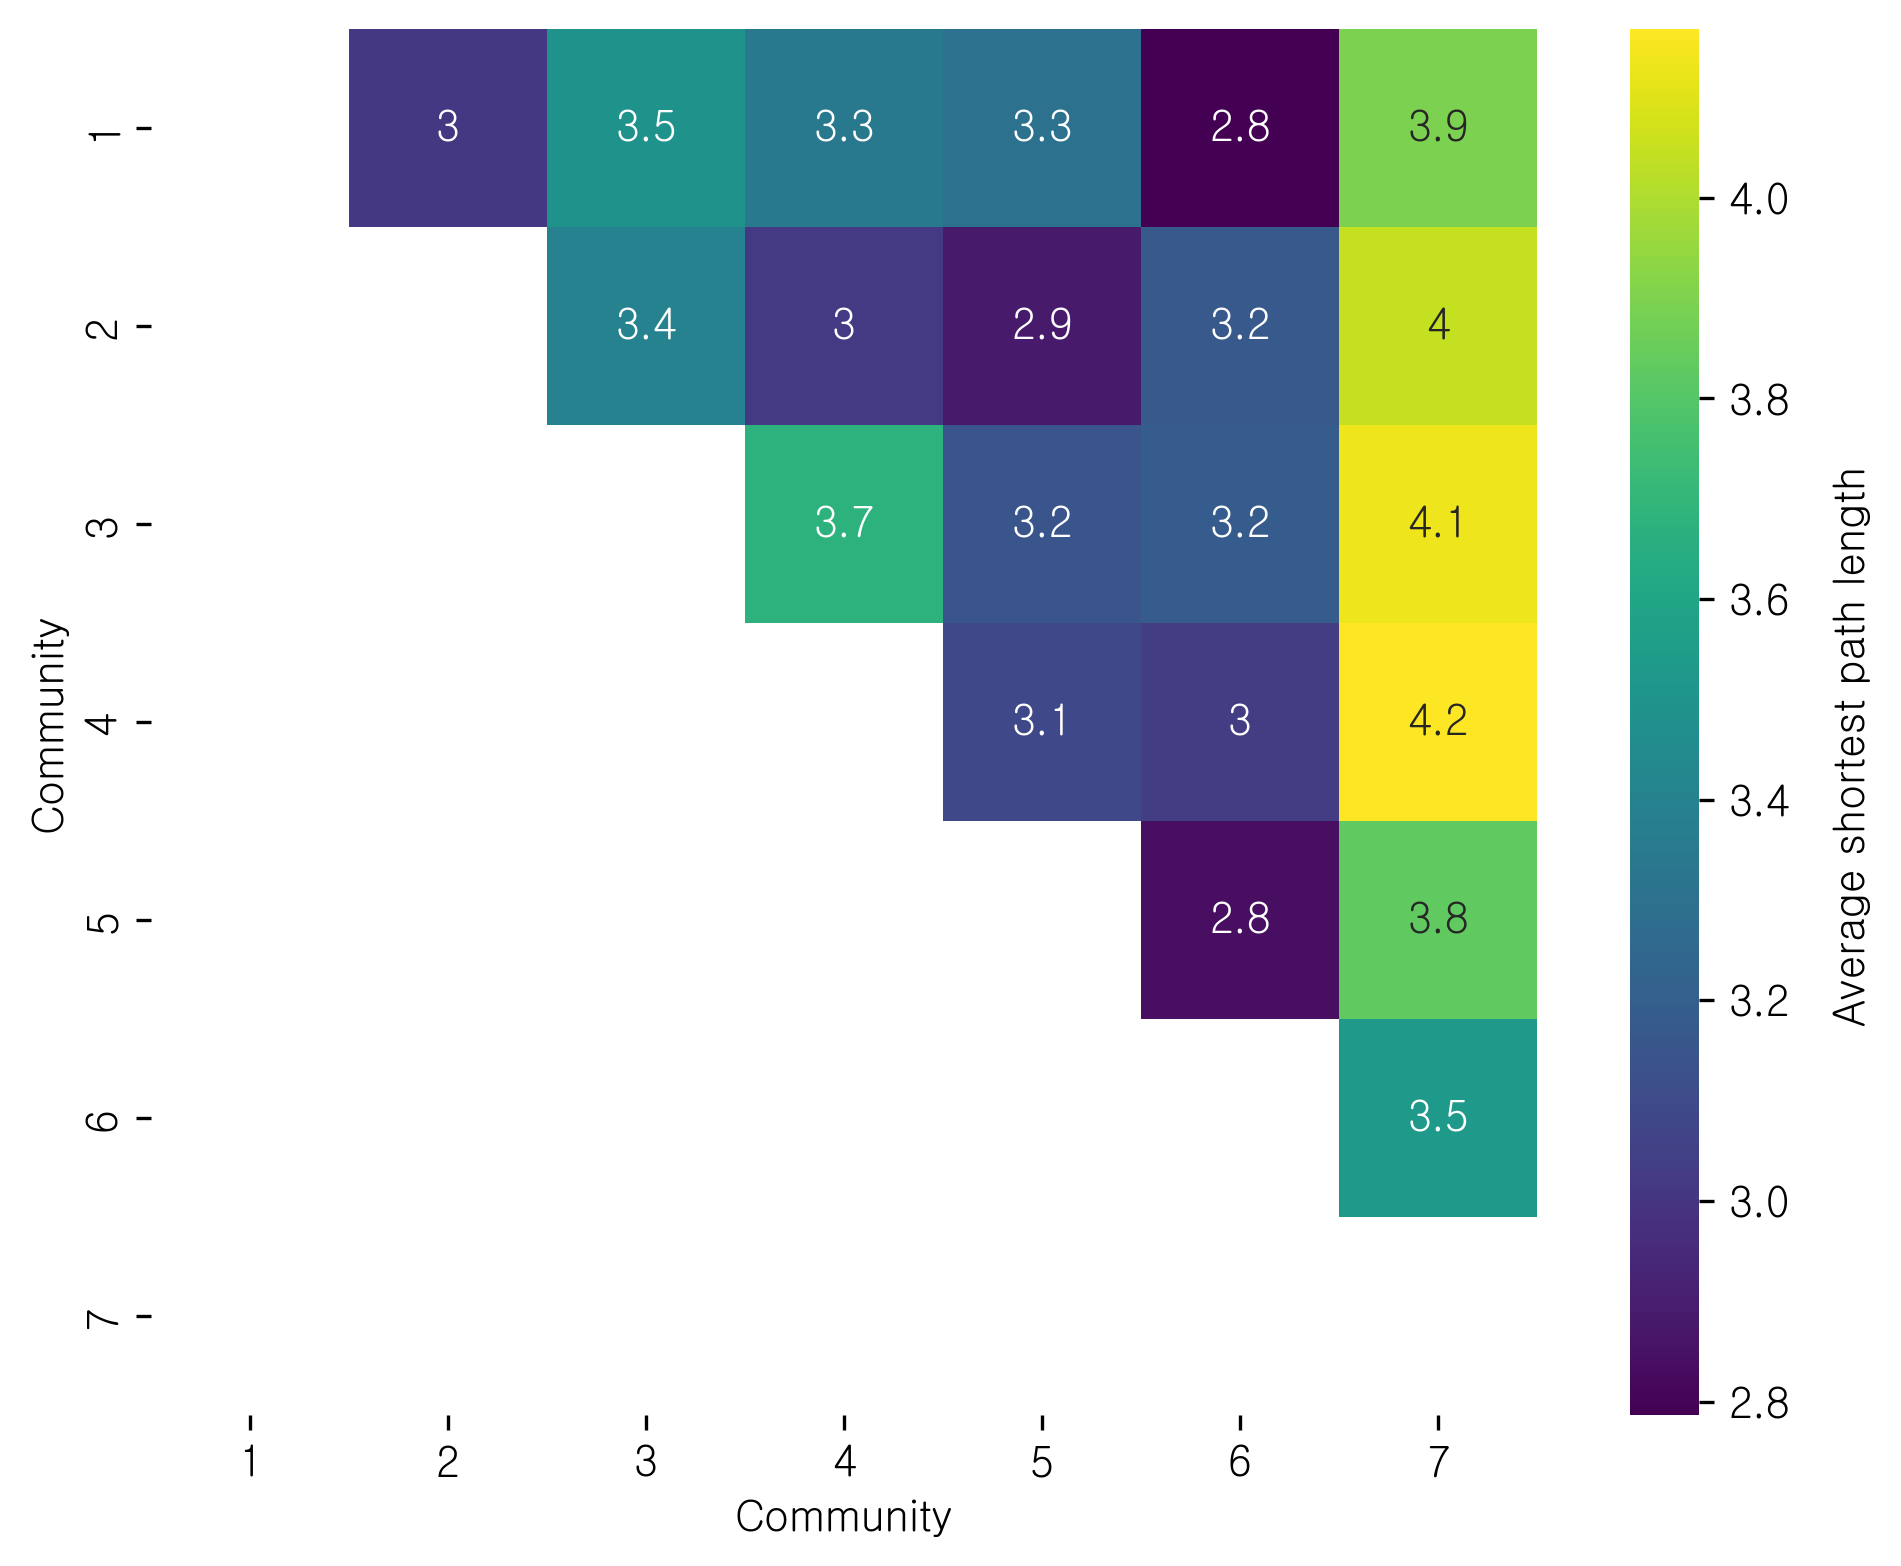

In [38]:
matrix = sum_matrix

# 좌하단 삼각형 부분만 남기고 나머지는 NaN으로 설정
mask = np.tri(*matrix.shape, k=-1).T
masked_matrix = np.where(mask, matrix, np.nan)
labels = np.arange(1, 8)

# 히트맵 그리기
plt.figure(figsize=(8, 6), dpi=300)
sns.heatmap(masked_matrix, annot=True, cmap="viridis", cbar=True, square=True, xticklabels=labels, yticklabels=labels)


plt.xlabel('Community')
plt.ylabel('Community')

plt.text(8.5,5.0,'Average shortest path length', rotation=90)

plt.show()

In [39]:
for i in communities_giant:
    print(len(i))

51
46
34
32
30
18
13


In [42]:
for i in range(7):

    lst = []
    for i in communities_giant[i]:
        lst.append(i)

    print(lst)
    print()

['투과', '인덕터', '진행', '전구', '전선', '열원', '전압', '자원', '스피커', '병렬', '변압기', '전기기구', '전류', '전기신호', '역학적에너지', '화석연료', '전동기', '볼록렌즈', '반사', '에너지', '입력장치', '소비전력', '자기장', '굴절', '축전기', '발전기', '경로', '코일', '보존법칙', '태양', '수소핵융합', '전환', '자기력선', '모형', '영구기관', '탄성파', '전지', '자기선속', '직렬', '빛', '전자기유도', '흐름', '전기에너지', '자기작용', '저항', '질량', '핵에너지', '합성', '연결', '센서', '전기회로']

['속력', '케플러법칙', '위치에너지', '물체', '관성계', '빗면', '이동거리', '뉴턴운동법칙', '시간', '알짜힘', '도플러효과', '힘', '지레', '크기', '행성', '저울', '마찰력', '방향', '운동에너지', '부력', '인공위성', '속도', '길이수축', '운동', '그래프', '안정성', '무게', '시간팽창', '수평', '원운동', '공유', '일', '작용', '평형', '자석', '직선', '포물선운동', '탄성력', '등가속도', '자유낙하', '위치', '돌림힘', '도구', '중력', '합력', '극']

['공간', '정상파', '관악기', '입자파동이중성', '양자컴퓨터', '간섭', '음파', '열전달', '양자', '음향', '현악기', '분포', '소음', '소리', '파형', '제어', '중첩', '확률', '회절', '홀로그램', '불확정성원리', '파동', '대류', '양자암호통신', '보어원자모형', '전도', '길이', '진폭', '진동수', '복사', '파동성', '전달', '이중슬릿실험', '현대원자모형']

['태양전지', '전기장', '레이저', '광전효과', '전하', '탈출속도', '가속운동', '유전분극', '정전기유도', '상호작용', '높낮이', '궤도'

In [95]:
import itertools

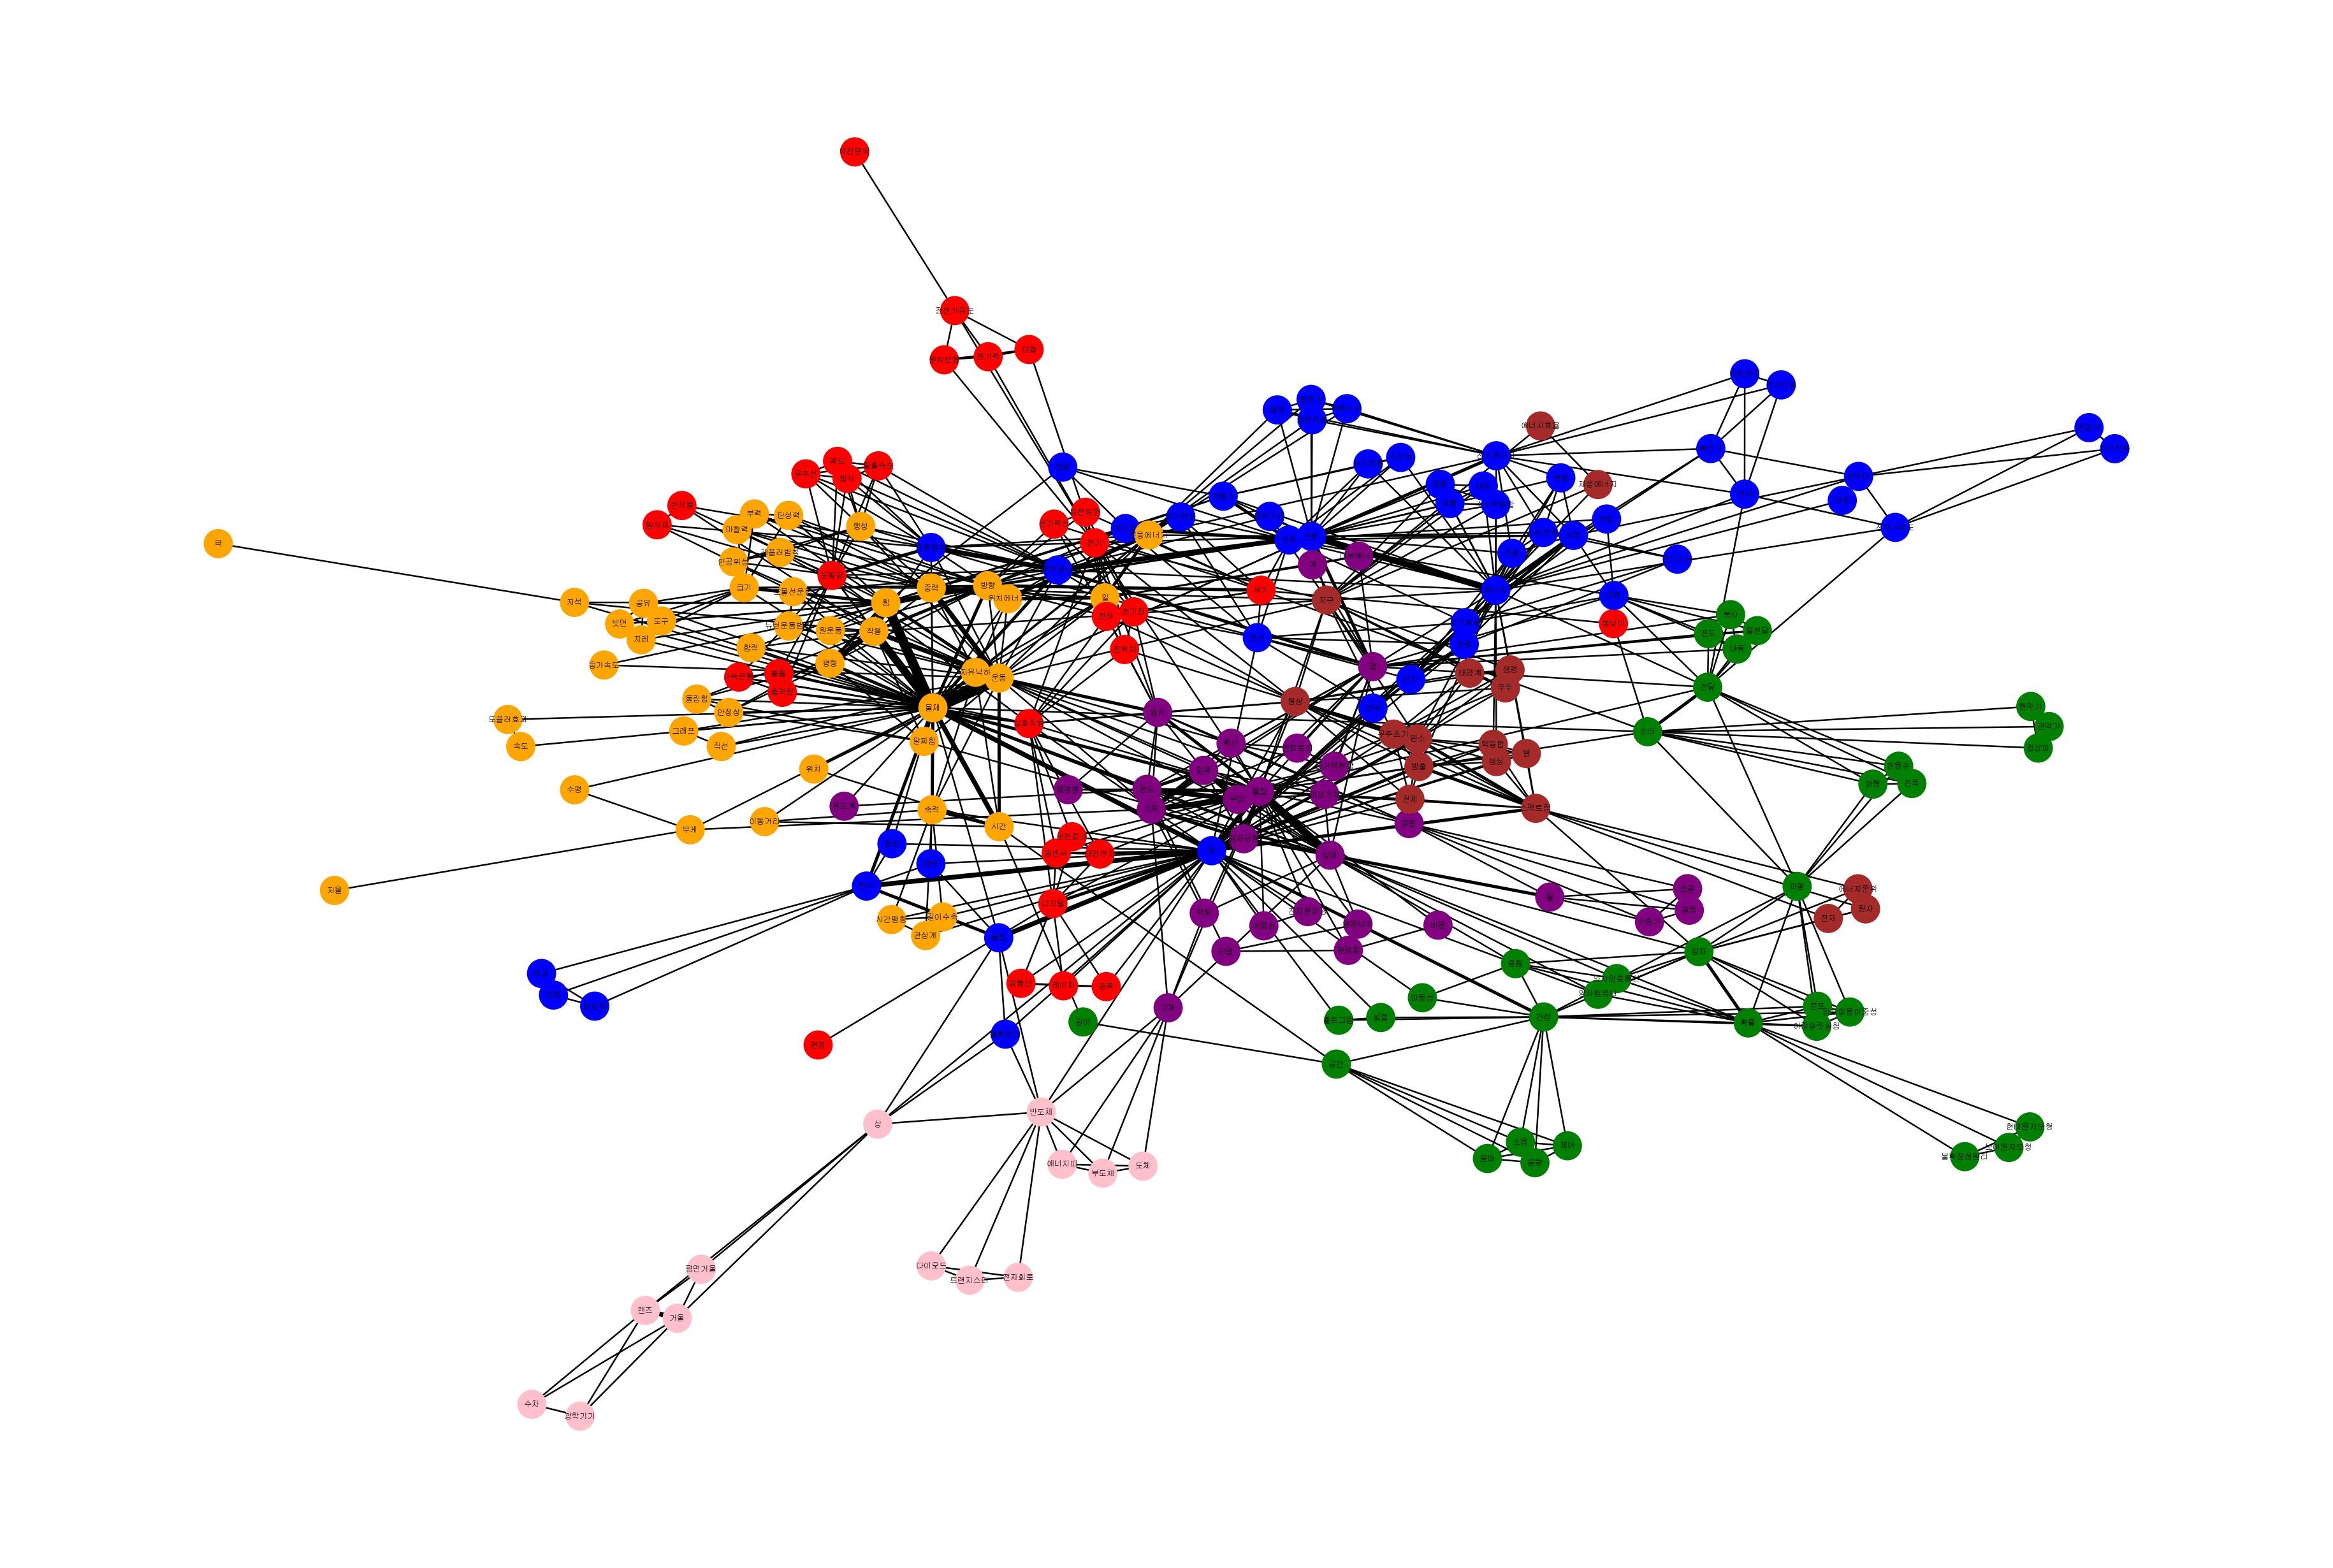

In [104]:
# 커뮤니티별로 색상 지정
colors = itertools.cycle(['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan'])  # 필요한 색상 리스트

node_colors = {}
for community, color in zip(communities_giant, colors):
    for node in community:
        node_colors[node] = color

# 노드 색상 리스트 생성
node_color_list = [node_colors[node] for node in G_giant.nodes()]

# 그래프 레이아웃 설정
pos = nx.fruchterman_reingold_layout(G_giant, k=1, iterations=1000, weight='weight')  # 그래프의 노드 위치 결정

edge_weights = {(u, v): data['weight'] for u, v, data in G_giant.edges(data=True)}
edge_width = [edge_weights[edge] * 0.1 for edge in G_giant.edges()]

# 그래프 시각화
plt.figure(figsize=(12,8), dpi=300)
nx.draw(G_giant, pos, with_labels=True, node_color=node_color_list, width=edge_width, node_size=100, font_family = font, font_size=3)
plt.show()

## 전체 물리학 용어 통계

In [24]:
G = entire_Graph()

In [25]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 243
Number of edges: 852
WordFreq avg: 2.07, WordFreq std: 2.57
Degree avg: 7.01, Degree std: 6.49
NodeWeight avg: 7.98, NodeWeight std: 8.97
EdgeWeight avg: 1.14, EdgeWeight std: 0.53


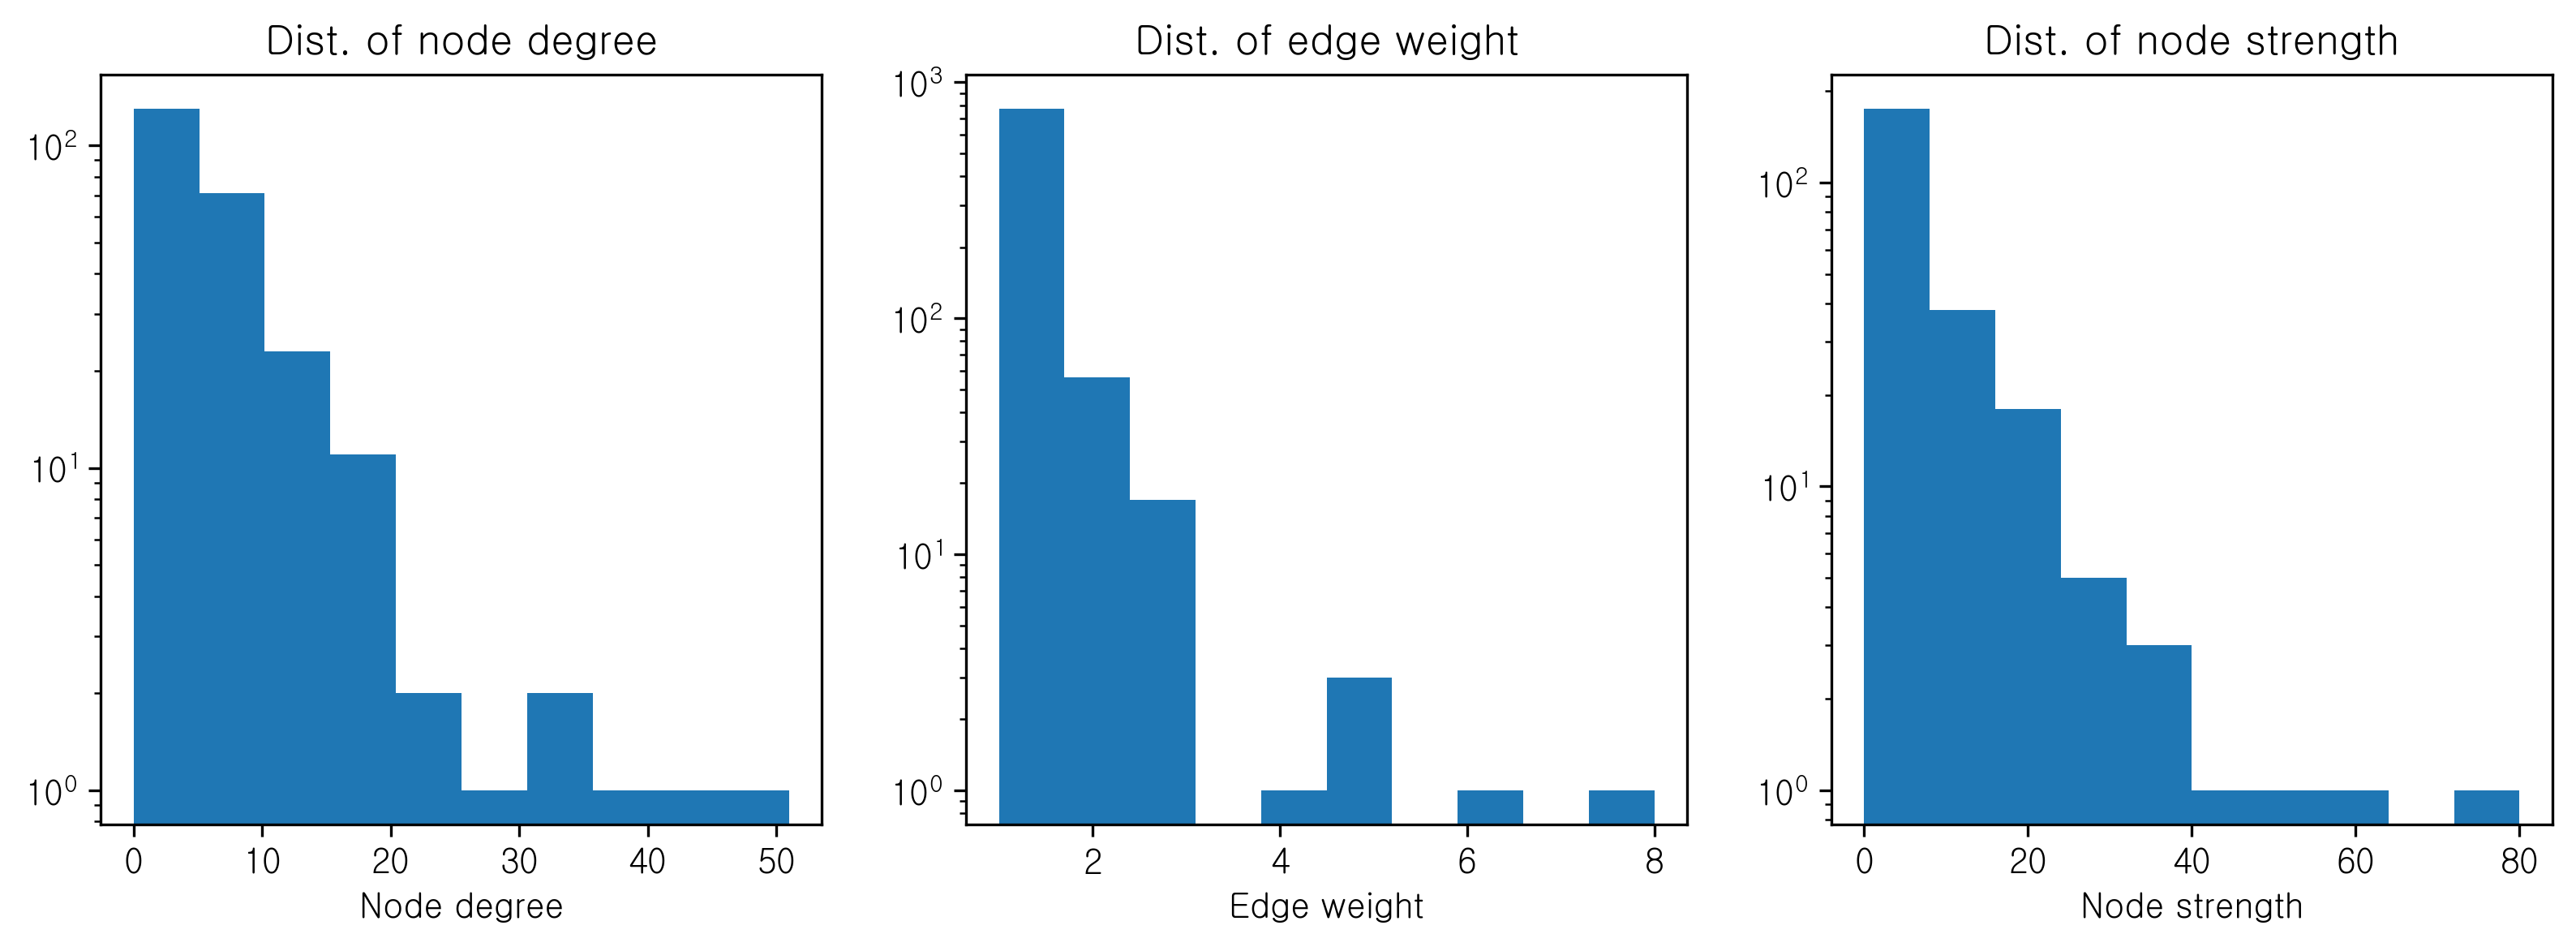

In [26]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions


2: Pass, 4.0781267593571275

Calculating best minimal value for power law fit
3: Pass, 3.453916657685464

Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


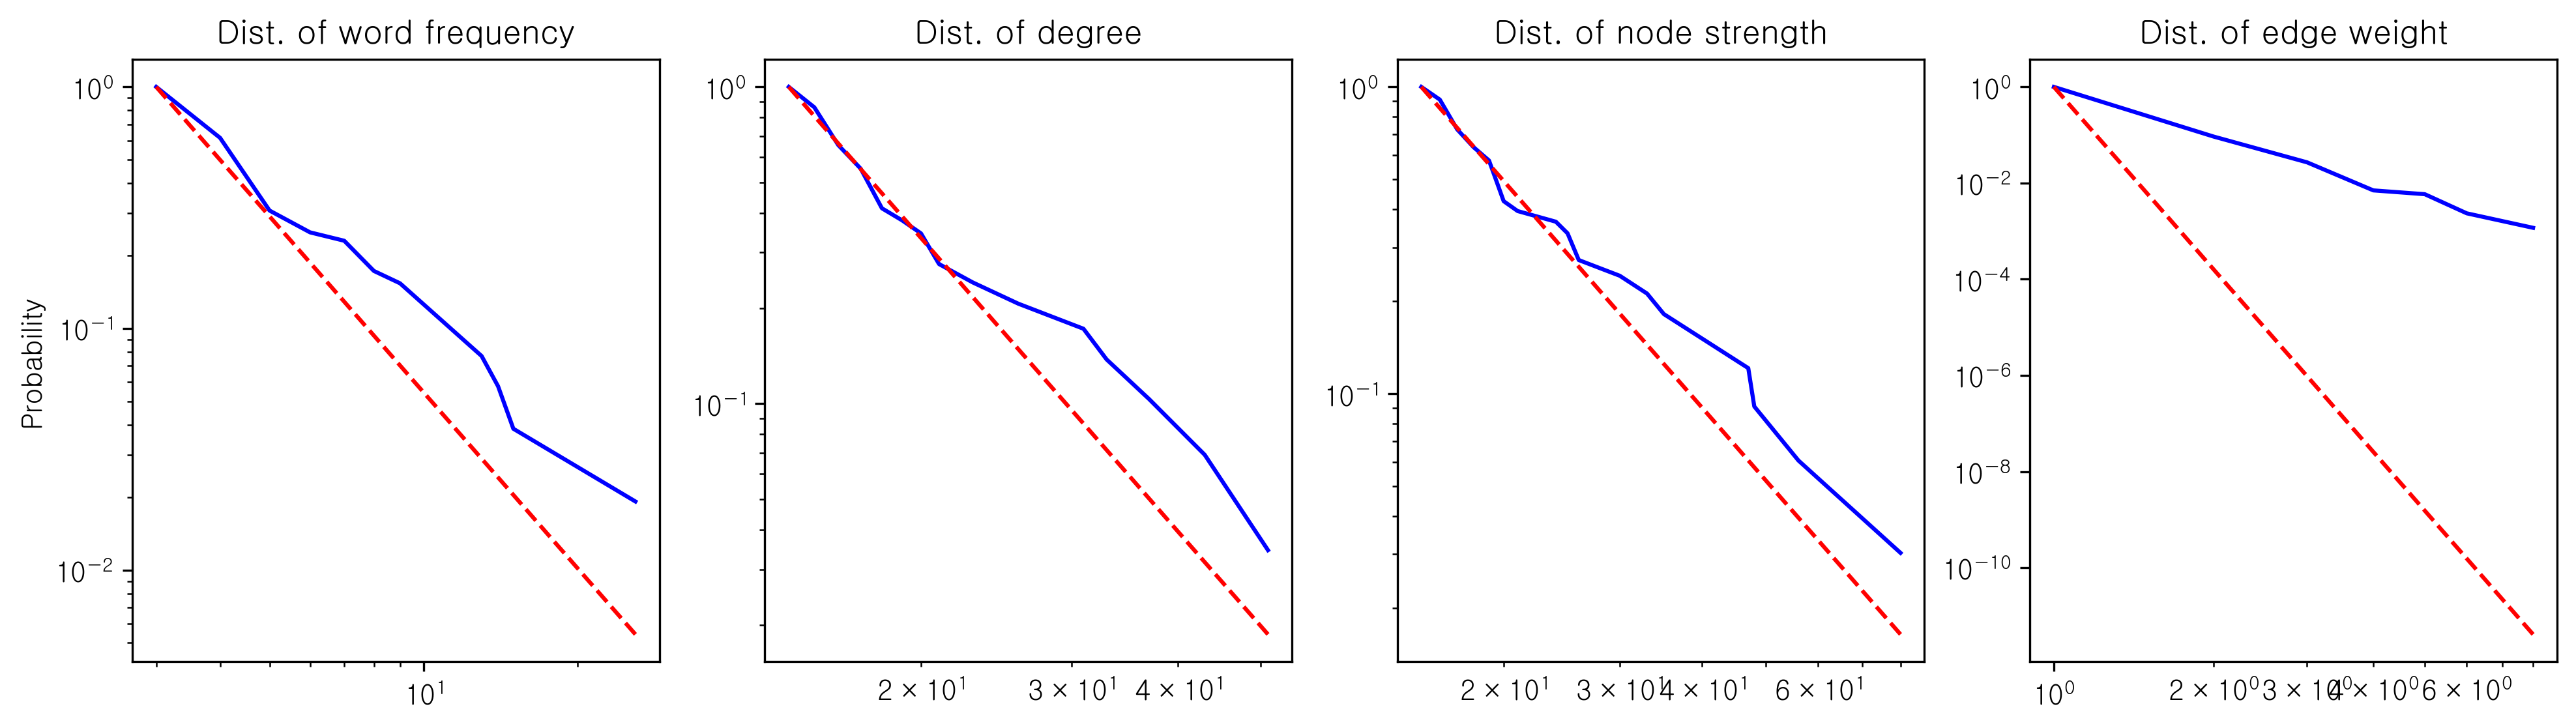

In [27]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [28]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0       물체            26.0      물체         51.0      물체           80.0   
1       물질            15.0       빛         43.0       빛           56.0   
2        빛            14.0      물질         37.0      운동           48.0   
3       운동            13.0      운동         33.0      물질           47.0   
4        힘             9.0     에너지         31.0       힘           35.0   
5       기체             9.0      전환         26.0     에너지           35.0   
6       상태             9.0       열         23.0      전환           33.0   
7      에너지             9.0       힘         21.0      작용           30.0   
8       작용             8.0      상태         20.0      상태           26.0   
9       온도             7.0      방향         20.0       열           25.0   
10       열             7.0      지구         19.0      방향           25.0   
11      전환             7.0  역학적에너지         18.0  역학적에너지           24.0   
12  역학적에너지             6.0      작용         17.0      기체           21.0   
13      소리             5.0      중력         17.0      원소           20.0   
14      방향             5.0      형성         17.0      온도           19.0   
15      지구             5.0    상호작용         17.0      중력           19.0   
16      전달             4.0      전류         16.0    보존법칙           19.0   
17      부피             4.0    보존법칙         16.0      형성           19.0   
18      압력             4.0      간섭         16.0      지구           19.0   
19      반사             4.0      기체         15.0      전류           18.0   

         Edge  Edge Weight Node_BC  Betweenness Centrality  
0    (물체, 운동)            8       빛                0.298037  
1     (물체, 힘)            6      물체                0.287116  
2    (물체, 작용)            5      물질                0.188850  
3     (힘, 작용)            5      운동                0.148757  
4    (물질, 상태)            5     에너지                0.146563  
5   (에너지, 전환)            4      상태                0.118867  
6     (물체, 빛)            3      전환                0.116714  
7    (물체, 시간)            3       열                0.113137  
8     (힘, 방향)            3      간섭                0.092395  
9     (물질, 빛)            3      전달                0.085750  
10   (기체, 부피)            3       힘                0.085629  
11   (기체, 압력)            3      지구                0.082407  
12   (작용, 평형)            3      방향                0.081177  
13   (작용, 운동)            3  역학적에너지                0.078189  
14   (부피, 온도)            3      소리                0.071734  
15   (부피, 압력)            3    상호작용                0.071201  
16    (빛, 굴절)            3      작용                0.068102  
17    (빛, 반사)            3     반도체                0.067824  
18   (렌즈, 거울)            3    스펙트럼                0.066361  
19   (운동, 중력)            3      전기                0.063641

# 초3-6

C:\Users\user\AppData\Local\Temp\ipykernel_37040\15638097.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\15638097.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


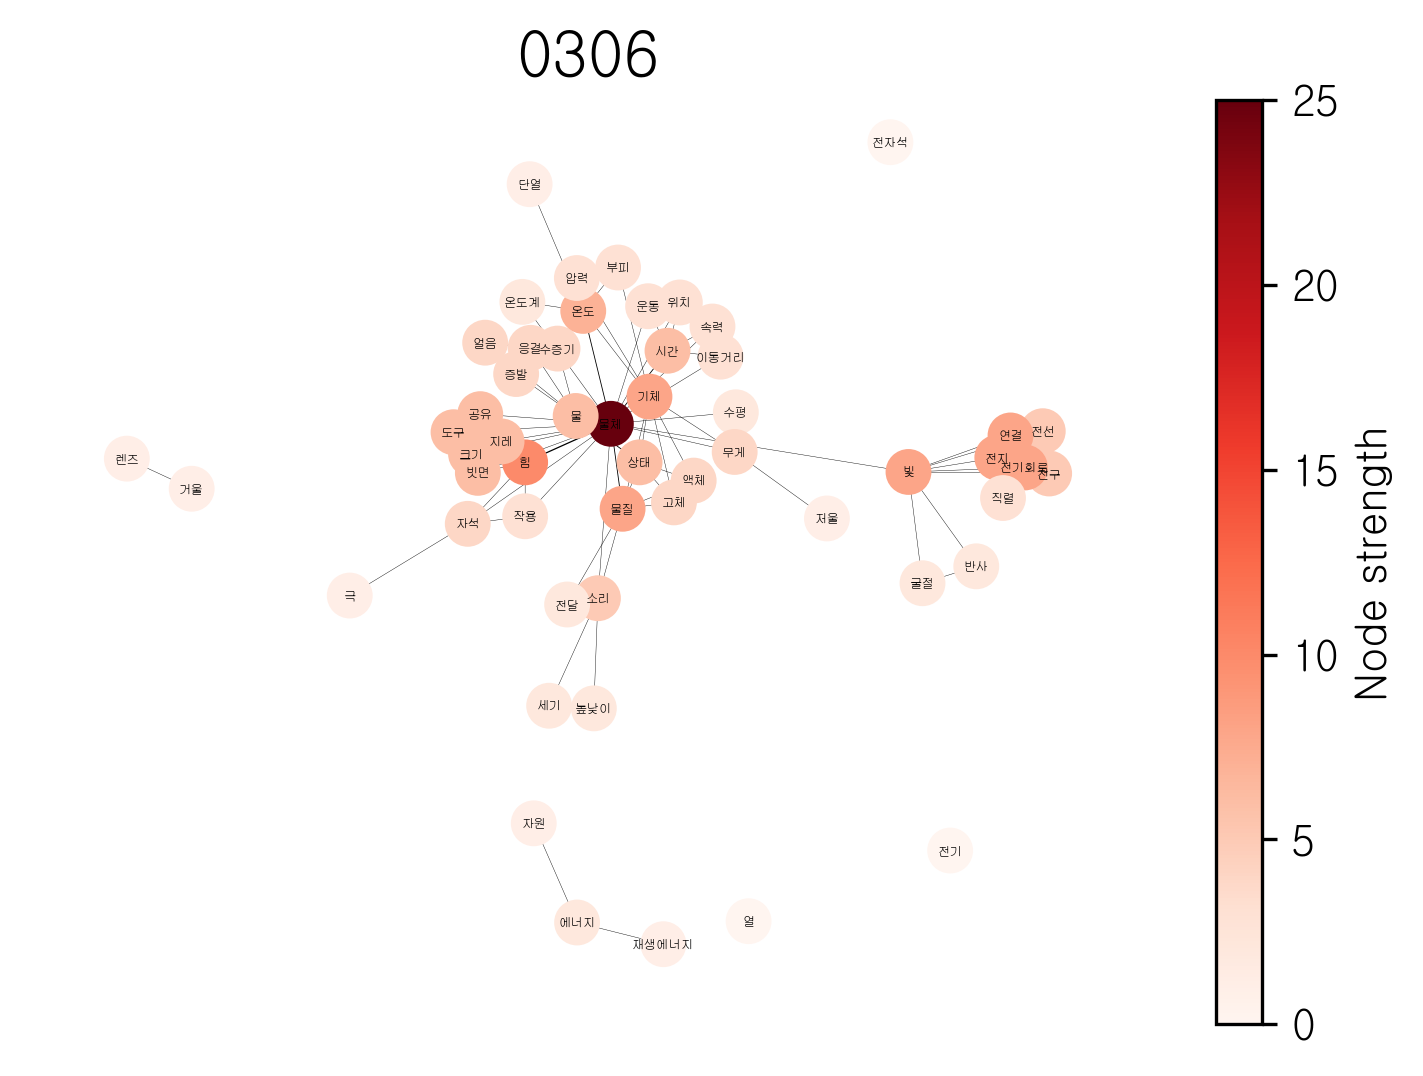

In [29]:
subject_graph(3, file_lst[0], '0306')

In [30]:
G = graph(3, file_lst[0])

In [31]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 54
Number of edges: 107
WordFreq avg: 1.76, WordFreq std: 1.71
Degree avg: 3.96, Degree std: 3.06
NodeWeight avg: 4.3, NodeWeight std: 3.76
EdgeWeight avg: 1.08, EdgeWeight std: 0.31


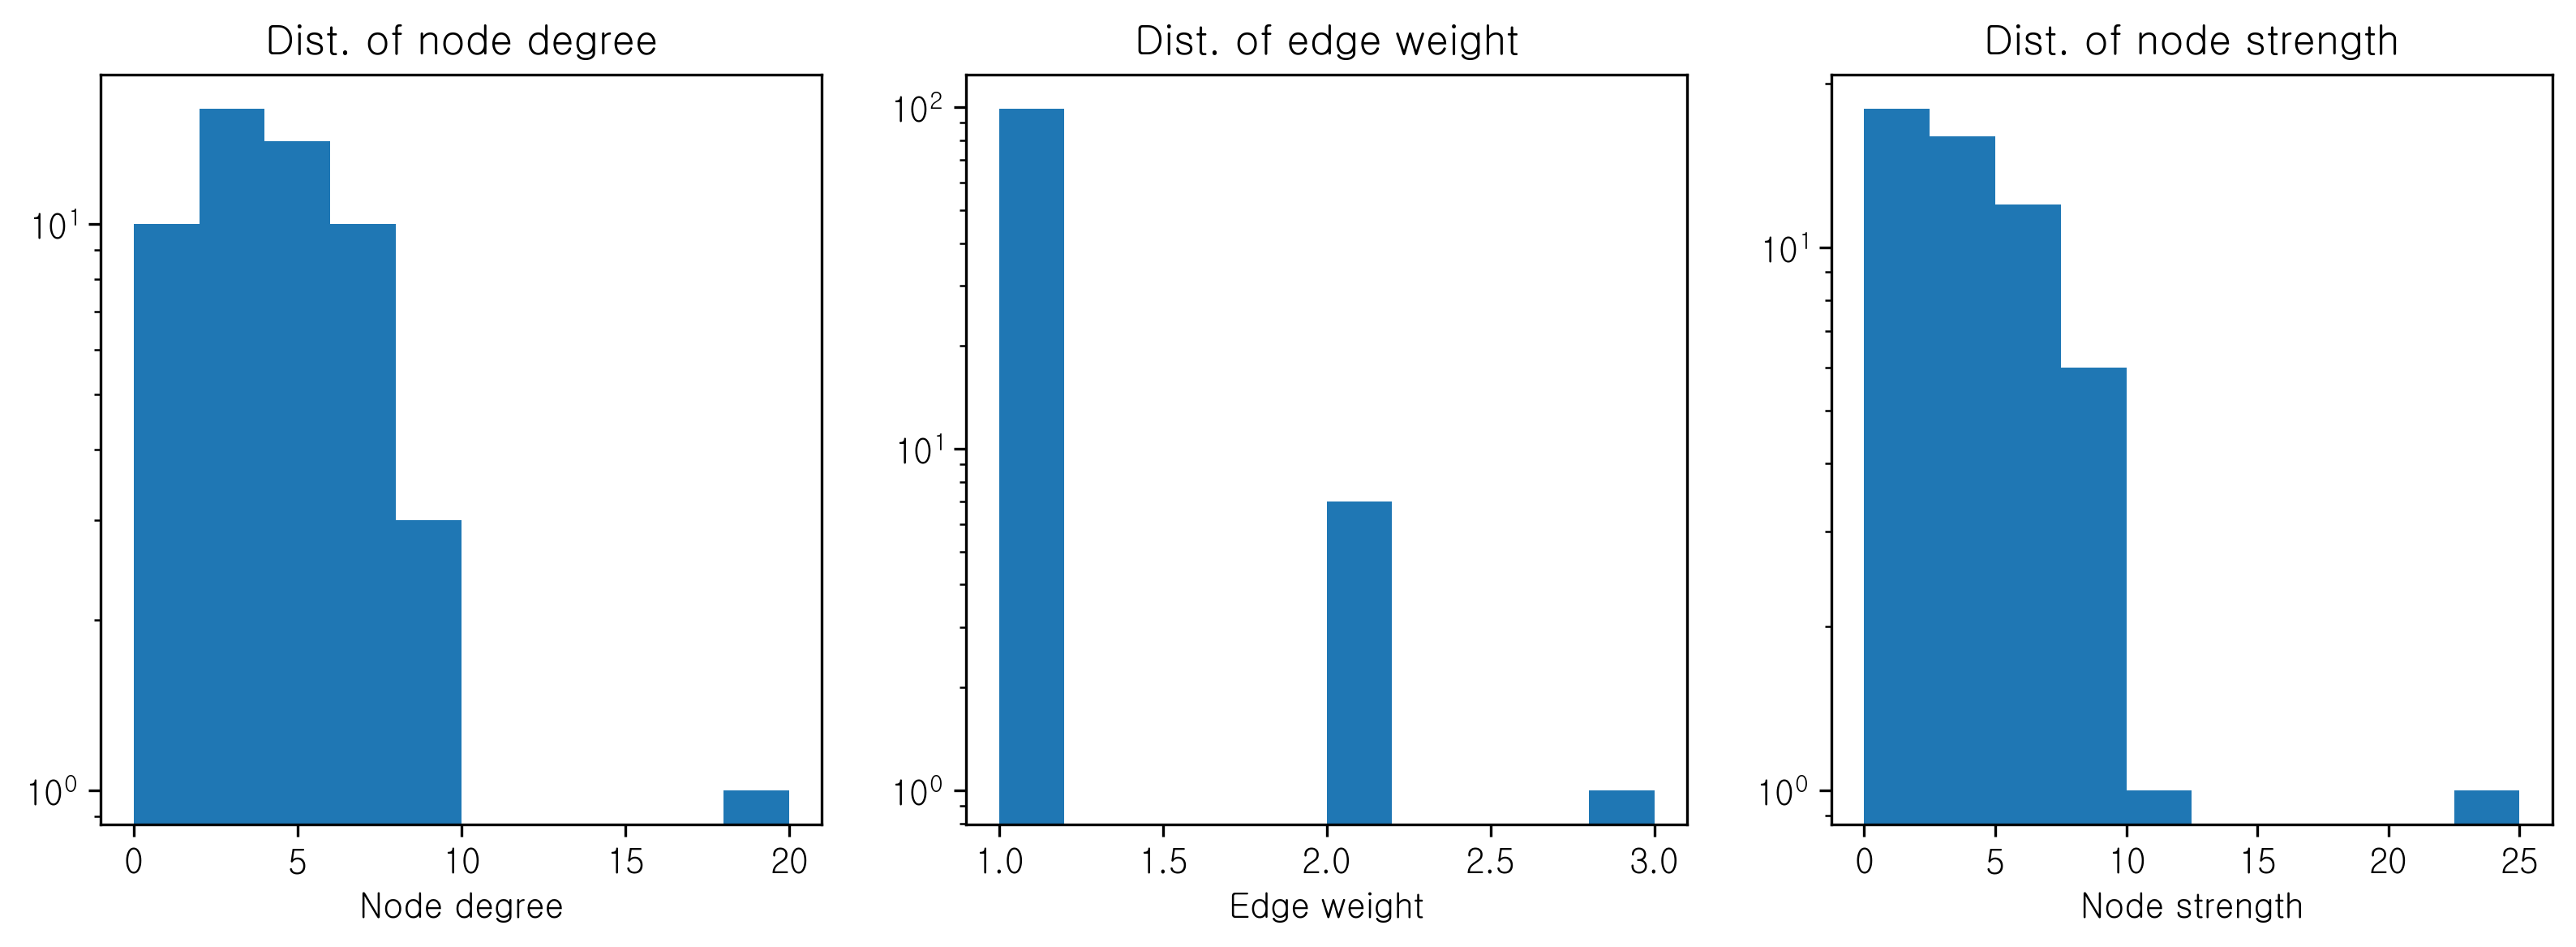

In [32]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions


Calculating best minimal value for power law fit


'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit


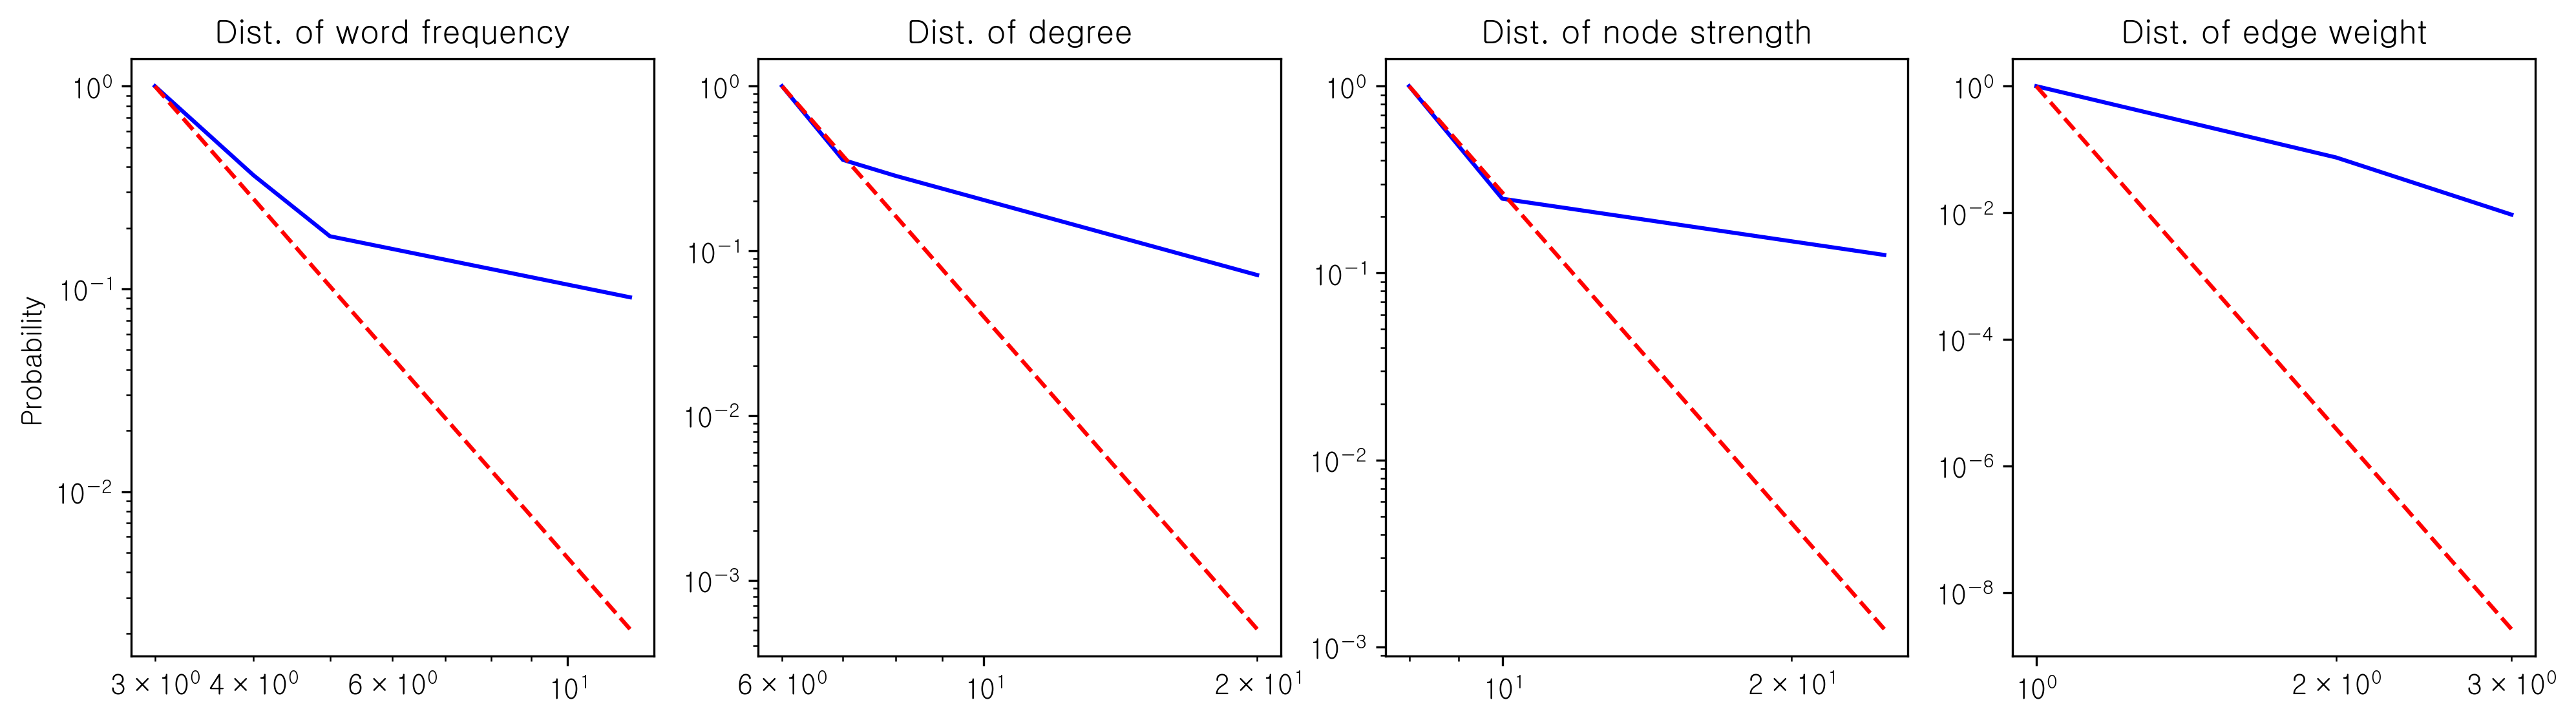

In [33]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [34]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0      물체            12.0      물체         20.0      물체           25.0   
1      기체             5.0       힘          8.0       힘           10.0   
2      물질             4.0      기체          8.0      물질            8.0   
3      온도             4.0       빛          8.0      기체            8.0   
4       힘             3.0      물질          7.0       빛            8.0   
5      무게             3.0      지레          6.0      전지            8.0   
6      상태             3.0      크기          6.0      연결            8.0   
7      소리             3.0      도구          6.0    전기회로            8.0   
8      자석             3.0      빗면          6.0      온도            7.0   
9       물             3.0      공유          6.0      지레            6.0   
10      빛             3.0      온도          6.0      크기            6.0   
11    에너지             2.0      전지          6.0      도구            6.0   
12     시간             2.0      연결          6.0      빗면            6.0   
13     속력             2.0    전기회로          6.0      공유            6.0   
14     전지             2.0      상태          5.0      상태            6.0   
15     연결             2.0      소리          5.0       물            6.0   
16   전기회로             2.0       물          5.0      시간            6.0   
17     수평             1.0      시간          5.0      소리            5.0   
18     저울             1.0      전선          5.0      전선            5.0   
19     지레             1.0      전구          5.0      전구            5.0   

          Edge  Edge Weight Node_BC  Betweenness Centrality  
0      (물체, 힘)            3      물체                0.788332  
1     (물체, 물질)            2       빛                0.313468  
2     (물체, 온도)            2      물질                0.295373  
3     (물체, 시간)            2      기체                0.255961  
4      (상태, 물)            2      상태                0.236754  
5     (전지, 연결)            2      온도                0.206567  
6   (전지, 전기회로)            2       물                0.166869  
7   (연결, 전기회로)            2      소리                0.154425  
8     (물체, 수평)            1      무게                0.125433  
9     (물체, 무게)            1       힘                0.114458  
10    (물체, 지레)            1      고체                0.074128  
11    (물체, 크기)            1      액체                0.074128  
12    (물체, 도구)            1      자석                0.065559  
13    (물체, 빗면)            1      시간                0.064646  
14    (물체, 공유)            1    전기회로                0.048384  
15    (물체, 소리)            1      전지                0.048384  
16    (물체, 작용)            1      연결                0.048384  
17    (물체, 자석)            1      압력                0.046448  
18     (물체, 빛)            1      부피                0.046448  
19   (물체, 온도계)            1      수평                0.039319

# 중1-3

C:\Users\user\AppData\Local\Temp\ipykernel_37040\15638097.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\15638097.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


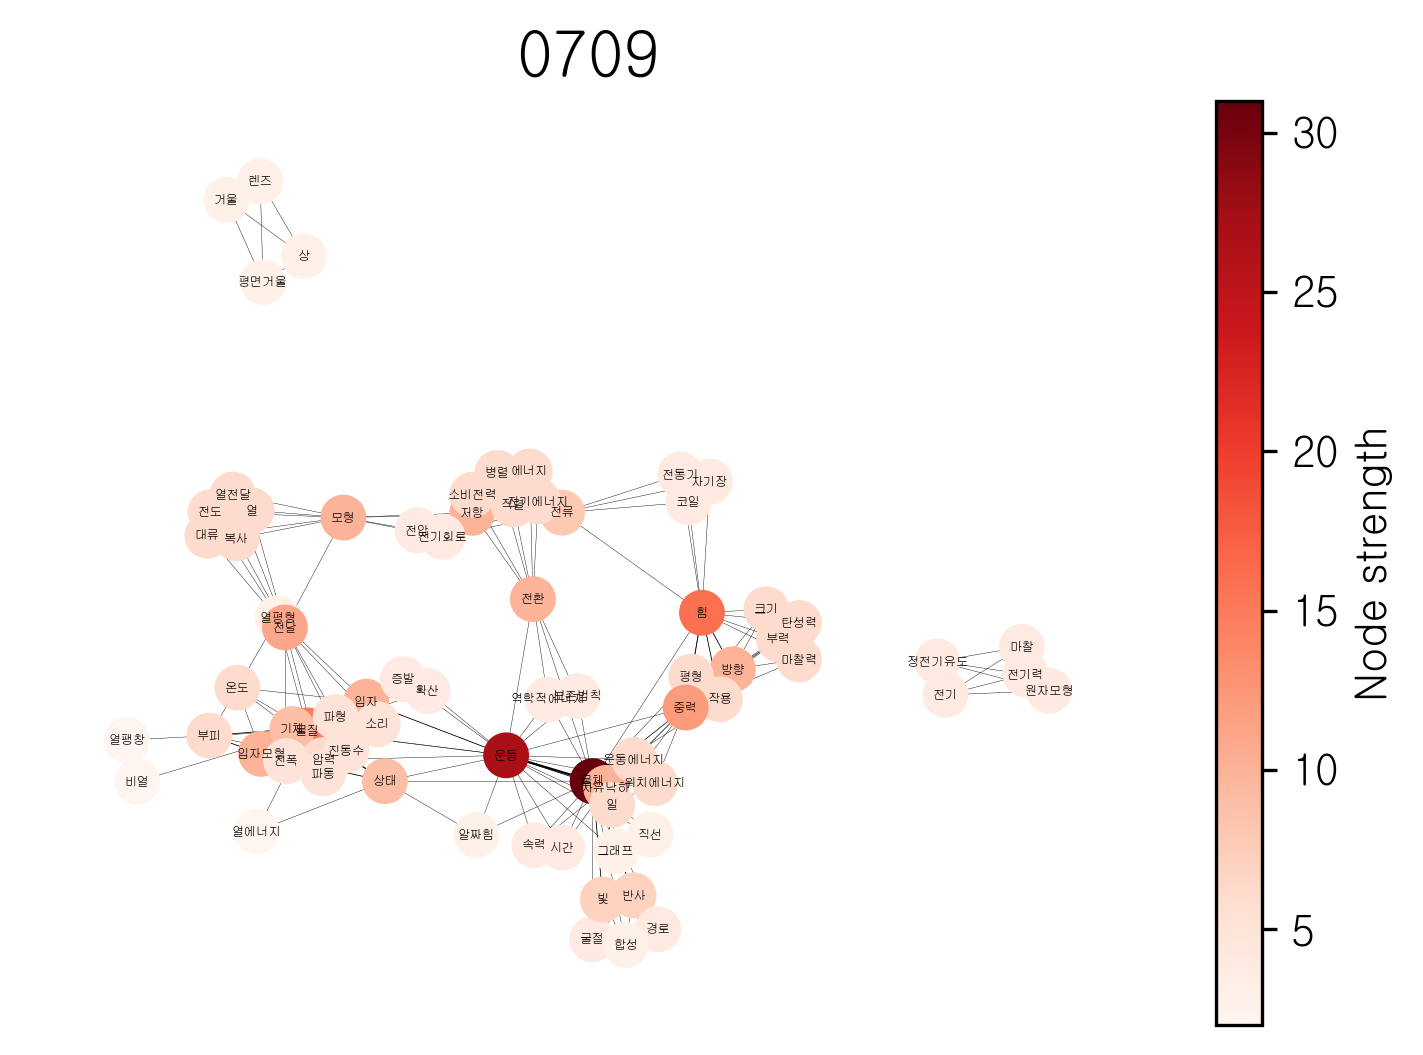

In [35]:
subject_graph(3, file_lst[1], '0709')

In [36]:
G = graph(3, file_lst[1])

In [37]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 75
Number of edges: 219
WordFreq avg: 1.61, WordFreq std: 1.33
Degree avg: 5.84, Degree std: 3.6
NodeWeight avg: 6.45, NodeWeight std: 4.67
EdgeWeight avg: 1.11, EdgeWeight std: 0.4


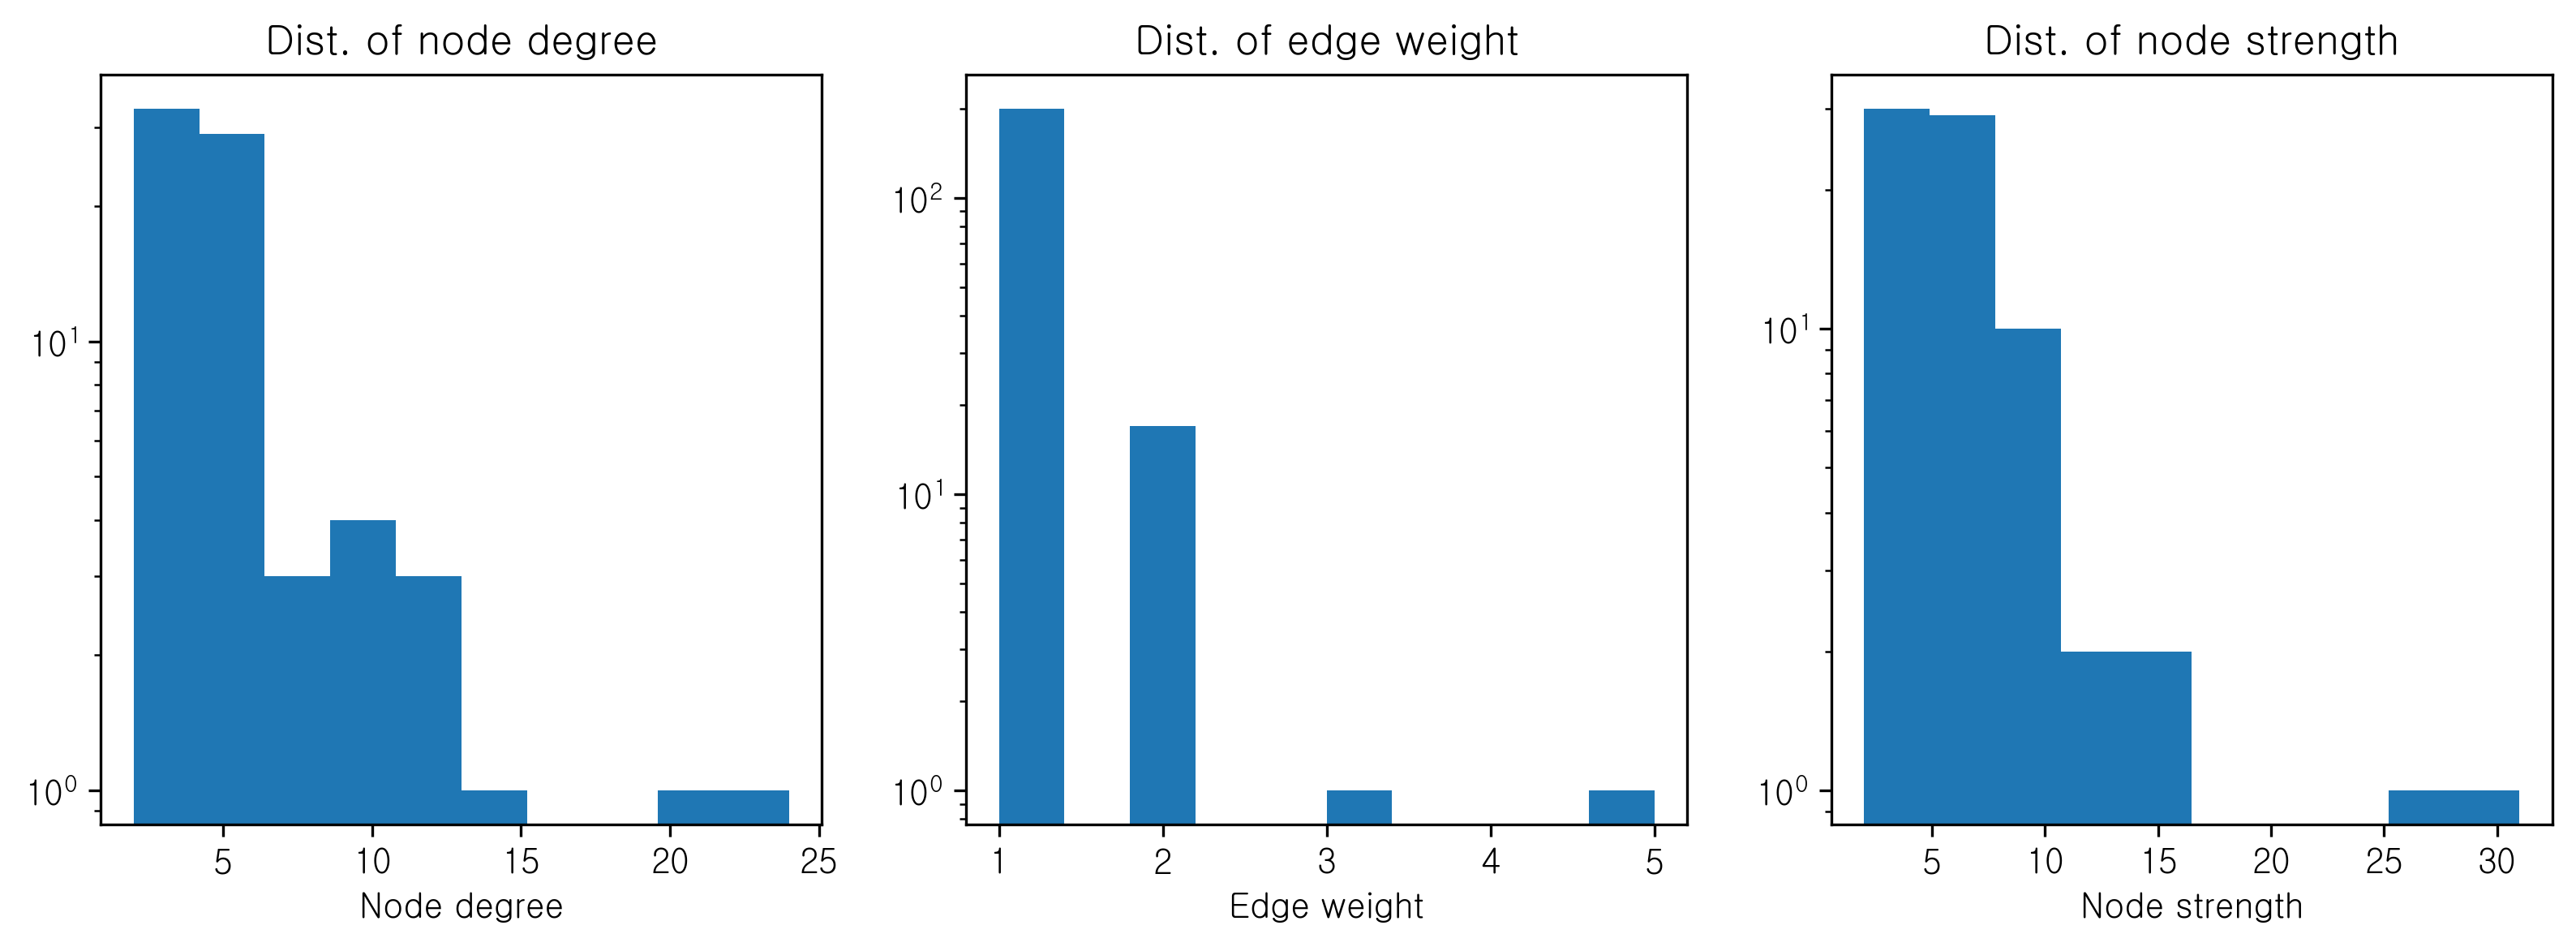

In [38]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


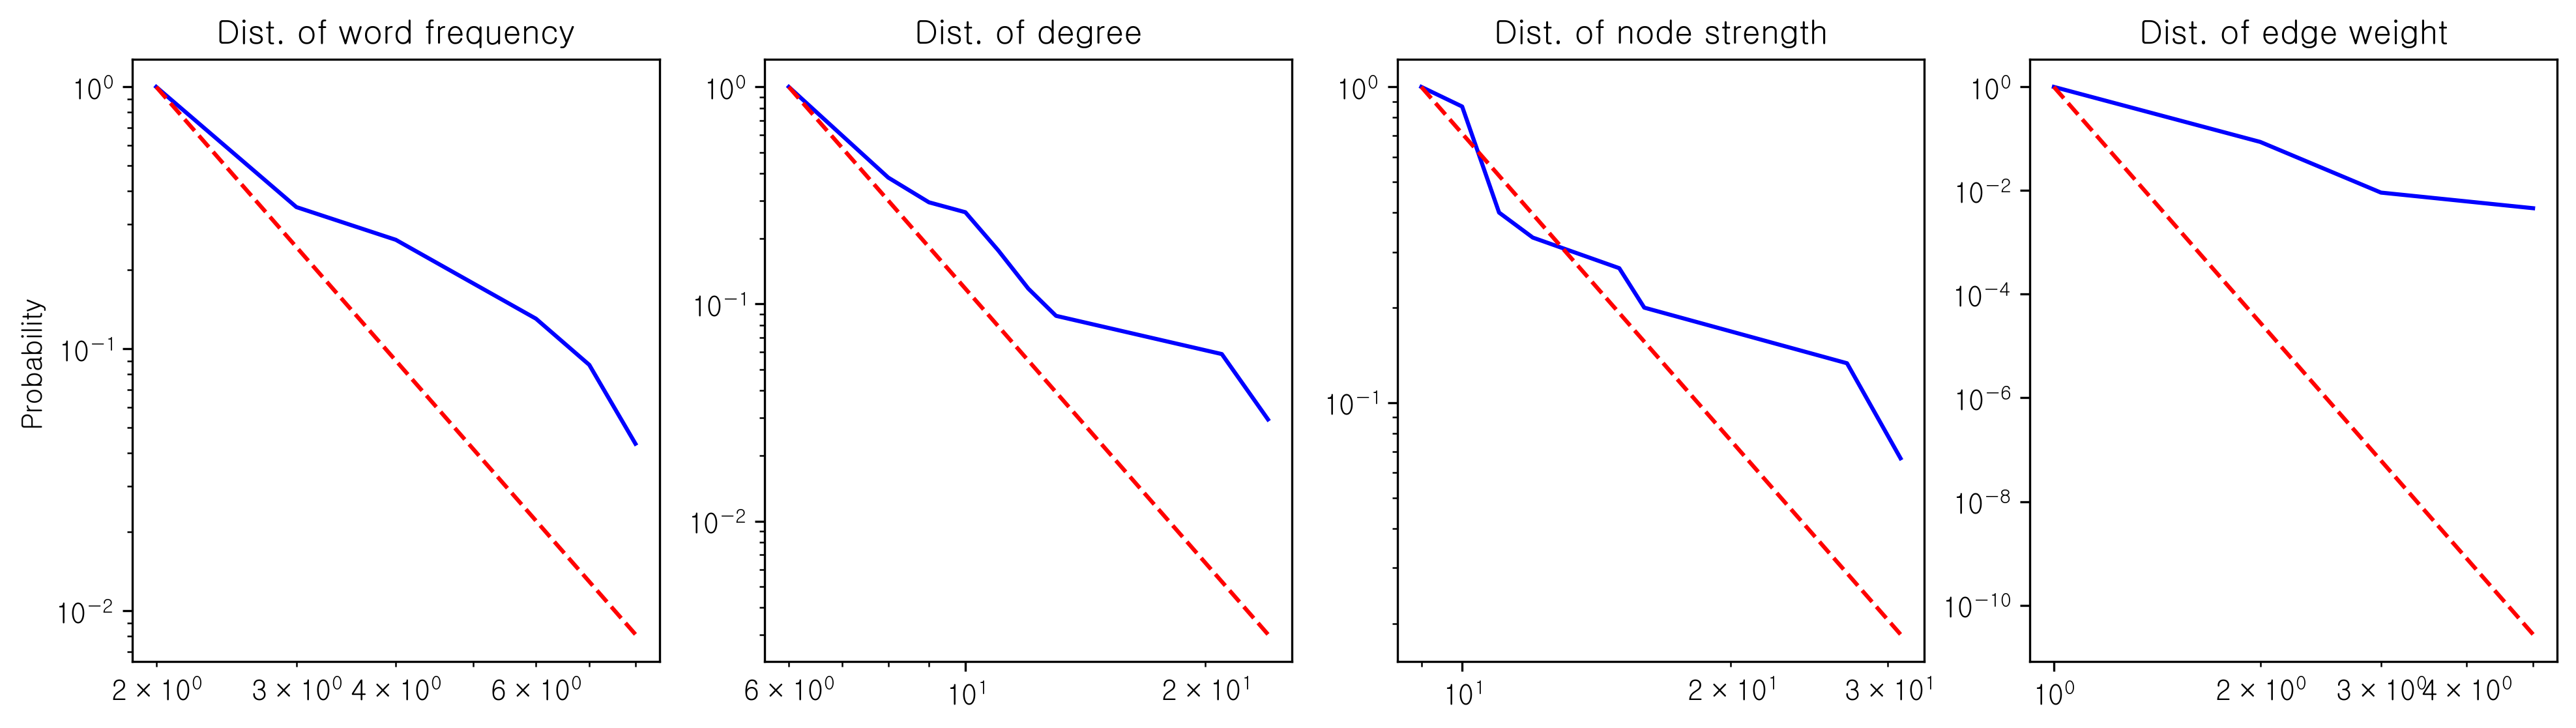

In [39]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [40]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0      물체             8.0      물체         24.0      물체           31.0   
1      운동             7.0      운동         21.0      운동           27.0   
2      물질             6.0       힘         13.0       힘           16.0   
3      상태             4.0      중력         12.0      물질           15.0   
4    입자모형             4.0      물질         11.0      중력           12.0   
5       힘             4.0      전달         11.0      전달           11.0   
6      입자             3.0      모형         10.0      입자           10.0   
7      기체             3.0      저항         10.0      모형           10.0   
8      온도             2.0      전환         10.0    입자모형           10.0   
9      전달             2.0      방향          9.0      방향           10.0   
10     모형             2.0      입자          8.0      저항           10.0   
11     방향             2.0      전류          8.0      전환           10.0   
12     평형             2.0    자유낙하          8.0    자유낙하           10.0   
13     작용             2.0      온도          6.0      상태            9.0   
14     중력             2.0      전도          6.0      기체            9.0   
15     압력             2.0       열          6.0      전류            8.0   
16     부피             2.0      복사          6.0      반사            7.0   
17     반사             2.0      대류          6.0       빛            7.0   
18      빛             2.0     열전달          6.0      온도            6.0   
19     저항             2.0      상태          6.0      전도            6.0   

          Edge  Edge Weight Node_BC  Betweenness Centrality  
0     (운동, 물체)            5      물체                0.456678  
1     (물질, 상태)            3      운동                0.436328  
2     (물질, 입자)            2      모형                0.315845  
3   (물질, 입자모형)            2       힘                0.309820  
4     (입자, 운동)            2      전환                0.286417  
5   (운동, 자유낙하)            2      저항                0.264505  
6   (상태, 입자모형)            2      전류                0.258736  
7   (입자모형, 부피)            2      중력                0.182138  
8   (입자모형, 기체)            2      전달                0.164606  
9      (방향, 힘)            2      물질                0.157906  
10     (평형, 힘)            2      상태                0.108724  
11    (평형, 작용)            2      입자                0.091185  
12     (힘, 작용)            2      방향                0.090161  
13    (물체, 반사)            2    전기회로                0.083579  
14     (물체, 빛)            2      전압                0.083579  
15  (물체, 자유낙하)            2    자유낙하                0.078576  
16    (기체, 압력)            2    보존법칙                0.065201  
17    (기체, 부피)            2  역학적에너지                0.065201  
18     (반사, 빛)            2    입자모형                0.062965  
19    (물질, 온도)            1     전동기                0.056874

# 통합과학

C:\Users\user\AppData\Local\Temp\ipykernel_37040\15638097.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\15638097.py:56: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


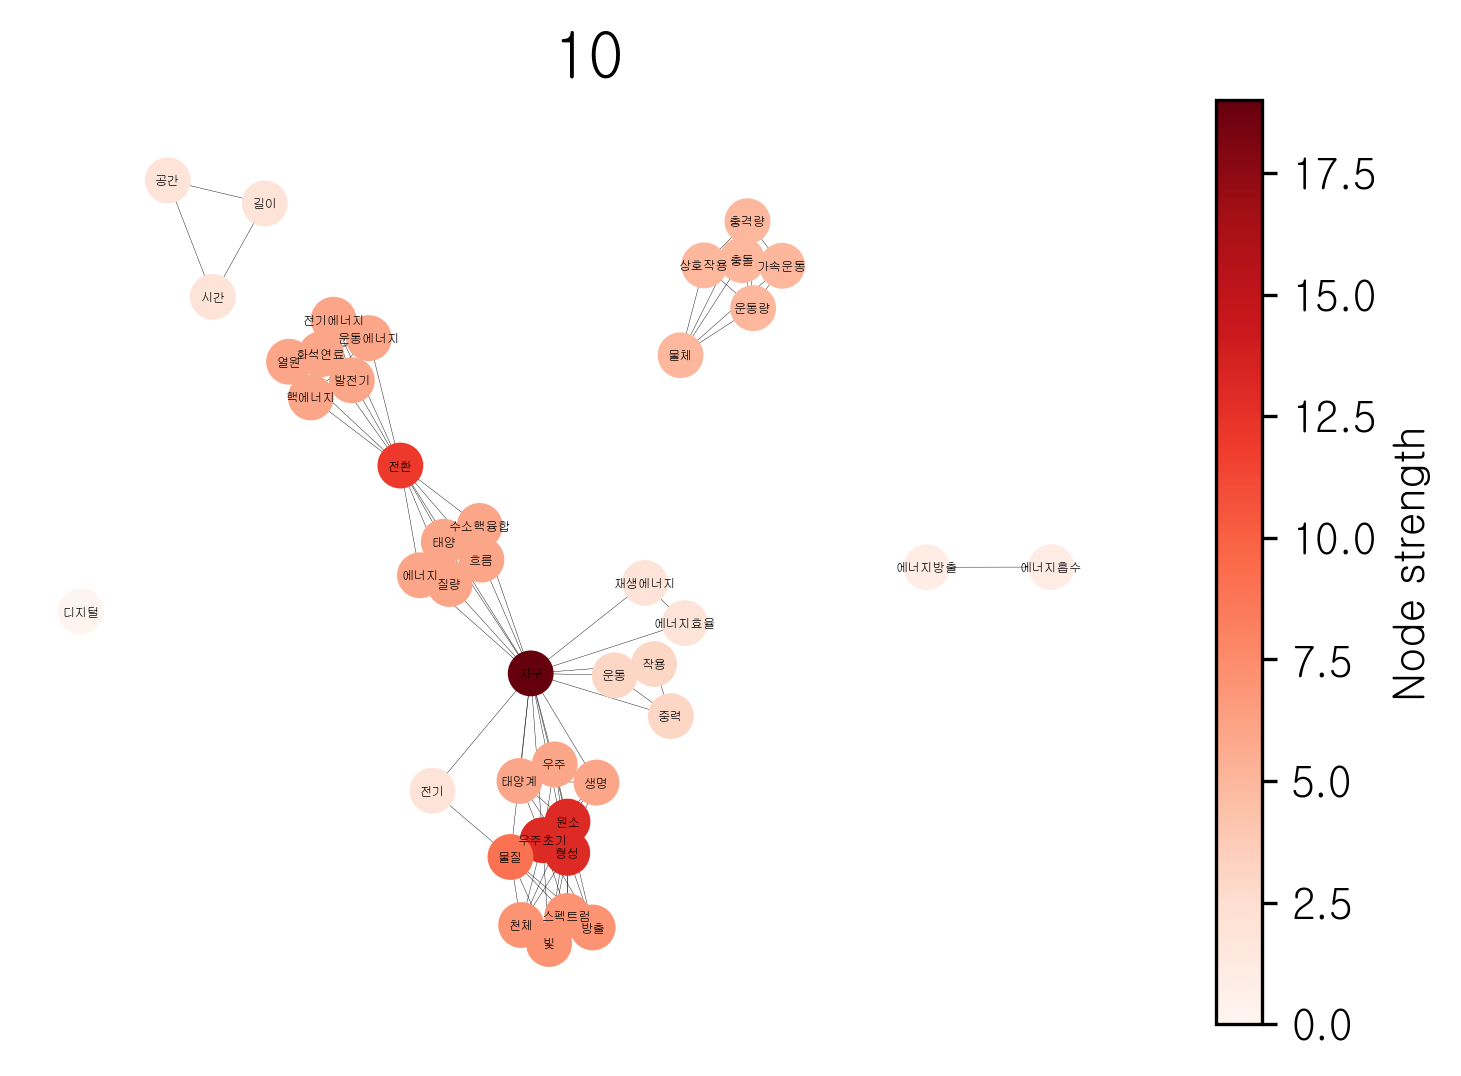

In [41]:
subject_graph(3, file_lst[2], '10')

In [42]:
G = graph(3, file_lst[2])

In [43]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 42
Number of edges: 119
WordFreq avg: 1.21, WordFreq std: 0.67
Degree avg: 5.67, Degree std: 3.46
NodeWeight avg: 5.81, NodeWeight std: 3.71
EdgeWeight avg: 1.03, EdgeWeight std: 0.16


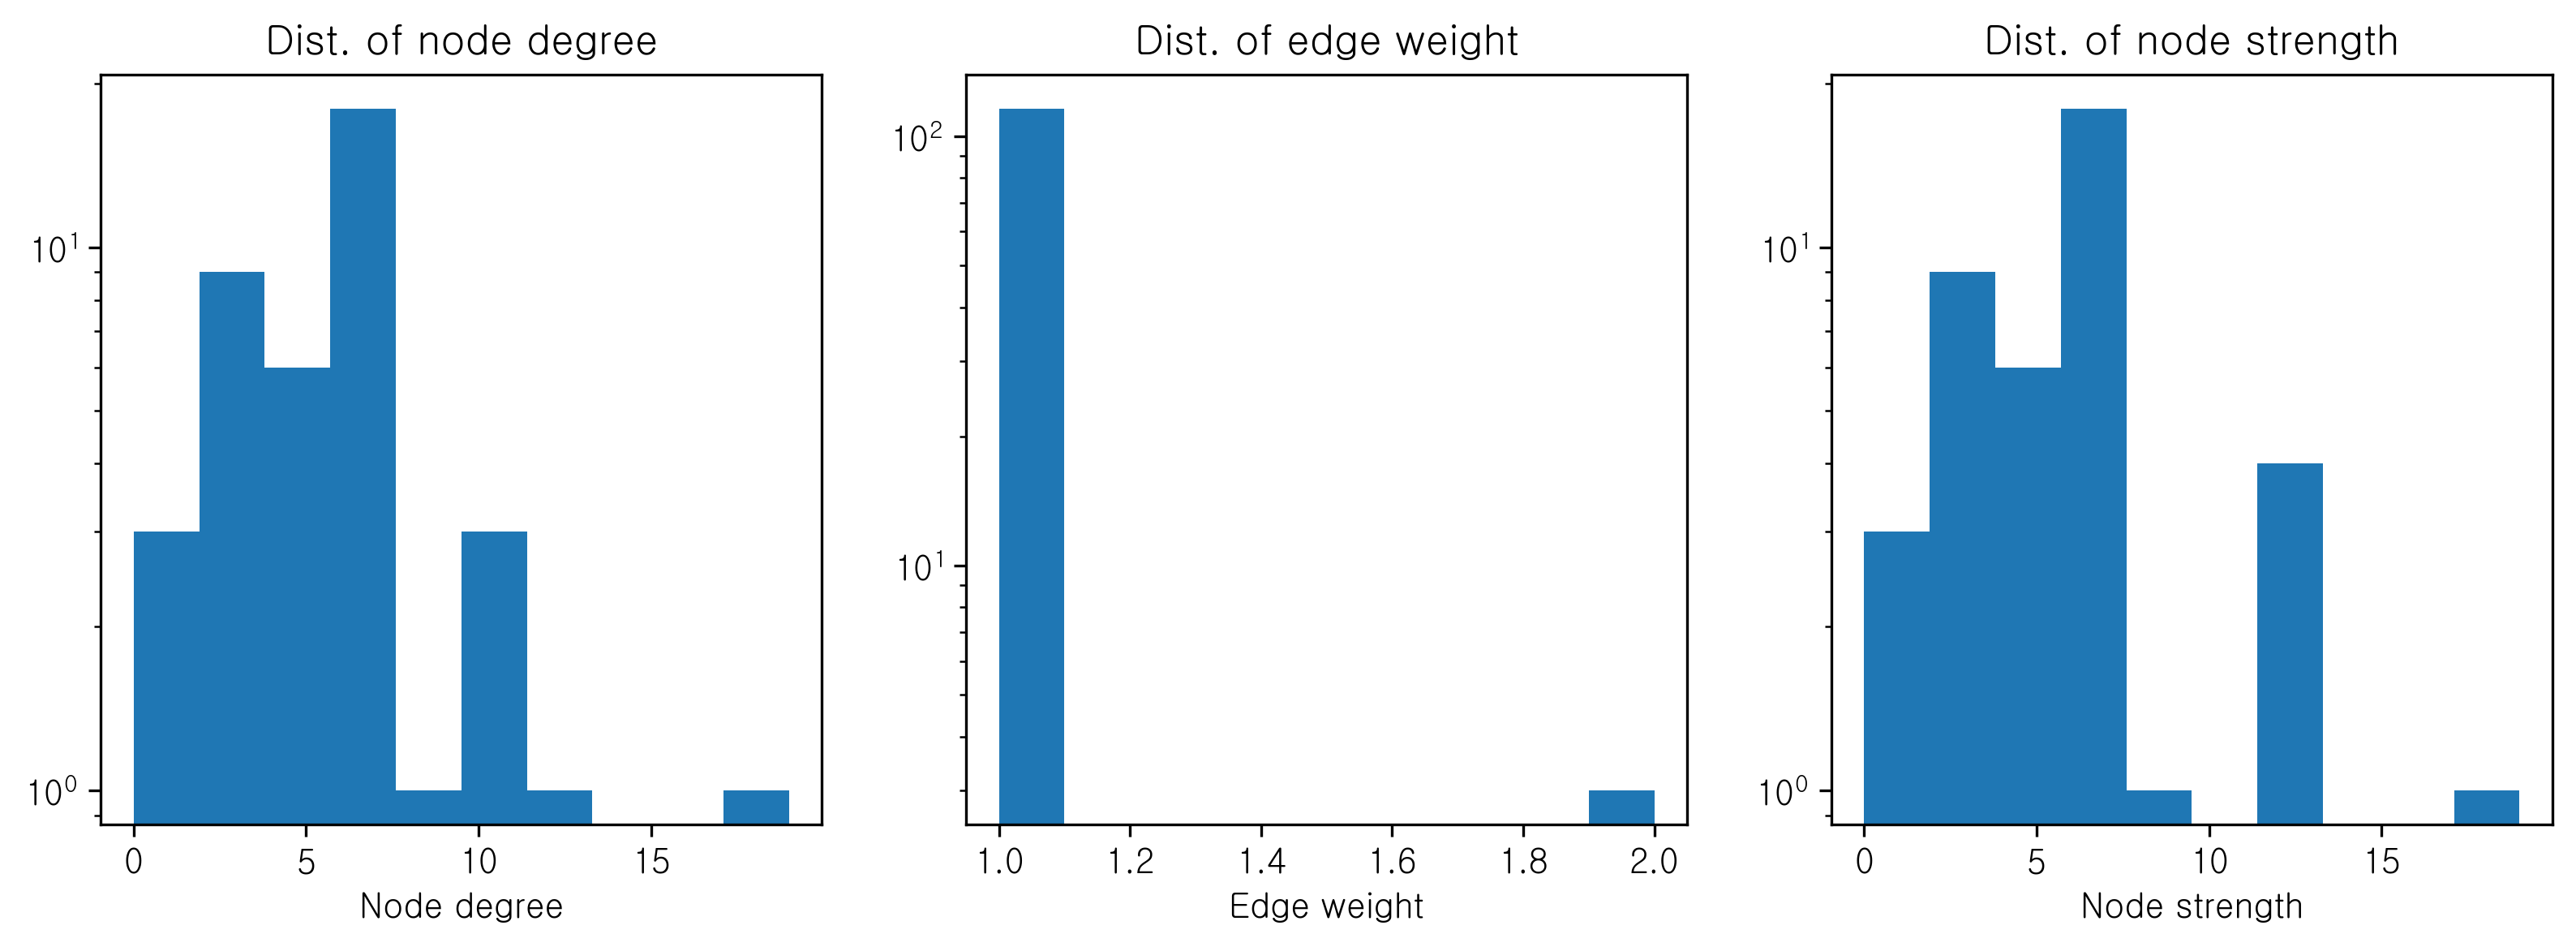

In [44]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested dist

Calculating best minimal value for power law fit


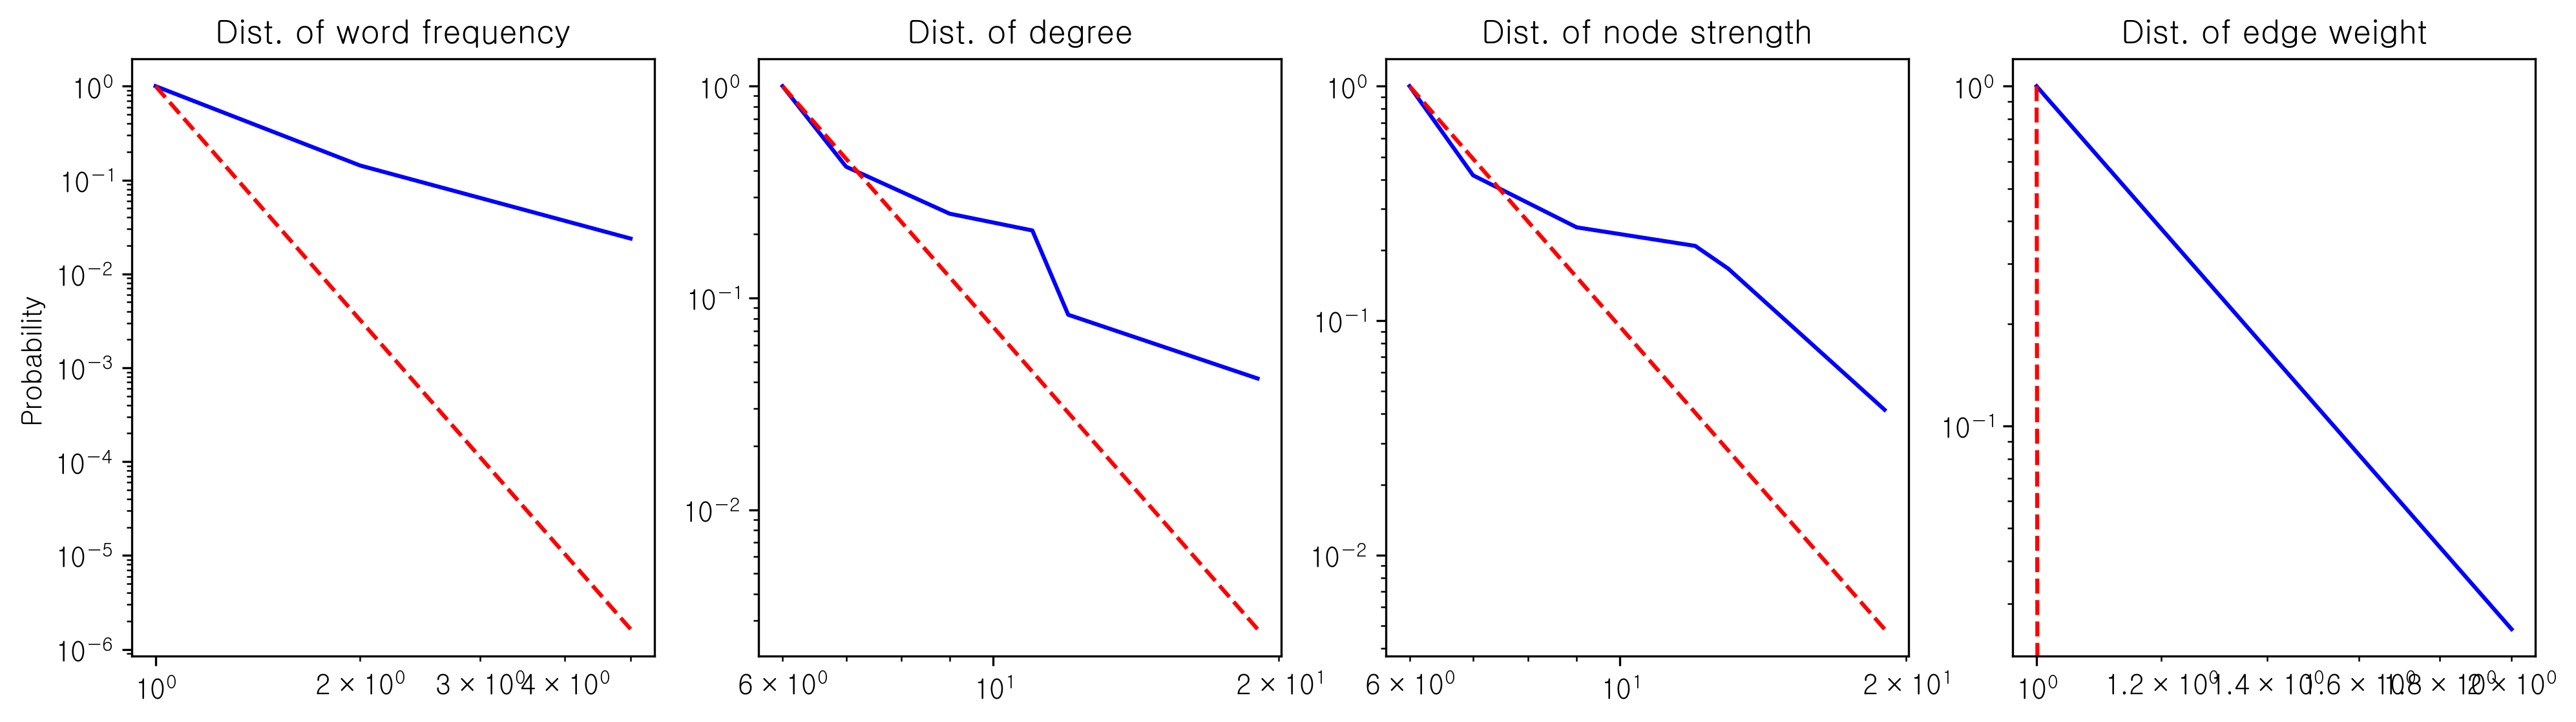

In [45]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [46]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0      지구             5.0      지구         19.0      지구           19.0   
1    우주초기             2.0      전환         12.0    우주초기           13.0   
2      물질             2.0    우주초기         11.0      원소           13.0   
3      원소             2.0      원소         11.0      형성           13.0   
4      형성             2.0      형성         11.0      전환           12.0   
5      전환             2.0      물질          9.0      물질            9.0   
6      공간             1.0      방출          7.0      방출            7.0   
7      길이             1.0      천체          7.0      천체            7.0   
8      시간             1.0    스펙트럼          7.0    스펙트럼            7.0   
9     디지털             1.0       빛          7.0       빛            7.0   
10     방출             1.0      생명          6.0      생명            6.0   
11     천체             1.0      우주          6.0      우주            6.0   
12   스펙트럼             1.0     태양계          6.0     태양계            6.0   
13      빛             1.0      태양          6.0      태양            6.0   
14     생명             1.0   수소핵융합          6.0   수소핵융합            6.0   
15     우주             1.0     에너지          6.0     에너지            6.0   
16    태양계             1.0      흐름          6.0      흐름            6.0   
17     전기             1.0      질량          6.0      질량            6.0   
18     작용             1.0    핵에너지          6.0    핵에너지            6.0   
19     중력             1.0   운동에너지          6.0   운동에너지            6.0   

            Edge  Edge Weight Node_BC  Betweenness Centrality  
0     (우주초기, 원소)            2      지구                0.713654  
1     (우주초기, 형성)            2      전환                0.380366  
2       (원소, 형성)            2      물질                0.131289  
3       (공간, 길이)            1      형성                0.127176  
4       (공간, 시간)            1    우주초기                0.127176  
5       (길이, 시간)            1      원소                0.127176  
6     (우주초기, 물질)            1      흐름                0.081633  
7     (우주초기, 방출)            1      질량                0.081633  
8     (우주초기, 천체)            1   수소핵융합                0.081633  
9   (우주초기, 스펙트럼)            1      태양                0.081633  
10     (우주초기, 빛)            1     에너지                0.081633  
11    (우주초기, 생명)            1      생명                0.064276  
12    (우주초기, 우주)            1     태양계                0.064276  
13    (우주초기, 지구)            1      우주                0.064276  
14   (우주초기, 태양계)            1    화석연료                0.045742  
15      (물질, 방출)            1    핵에너지                0.045742  
16      (물질, 원소)            1   운동에너지                0.045742  
17      (물질, 형성)            1     발전기                0.045742  
18      (물질, 천체)            1      열원                0.045742  
19    (물질, 스펙트럼)            1   전기에너지                0.045742

# 물리학

C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


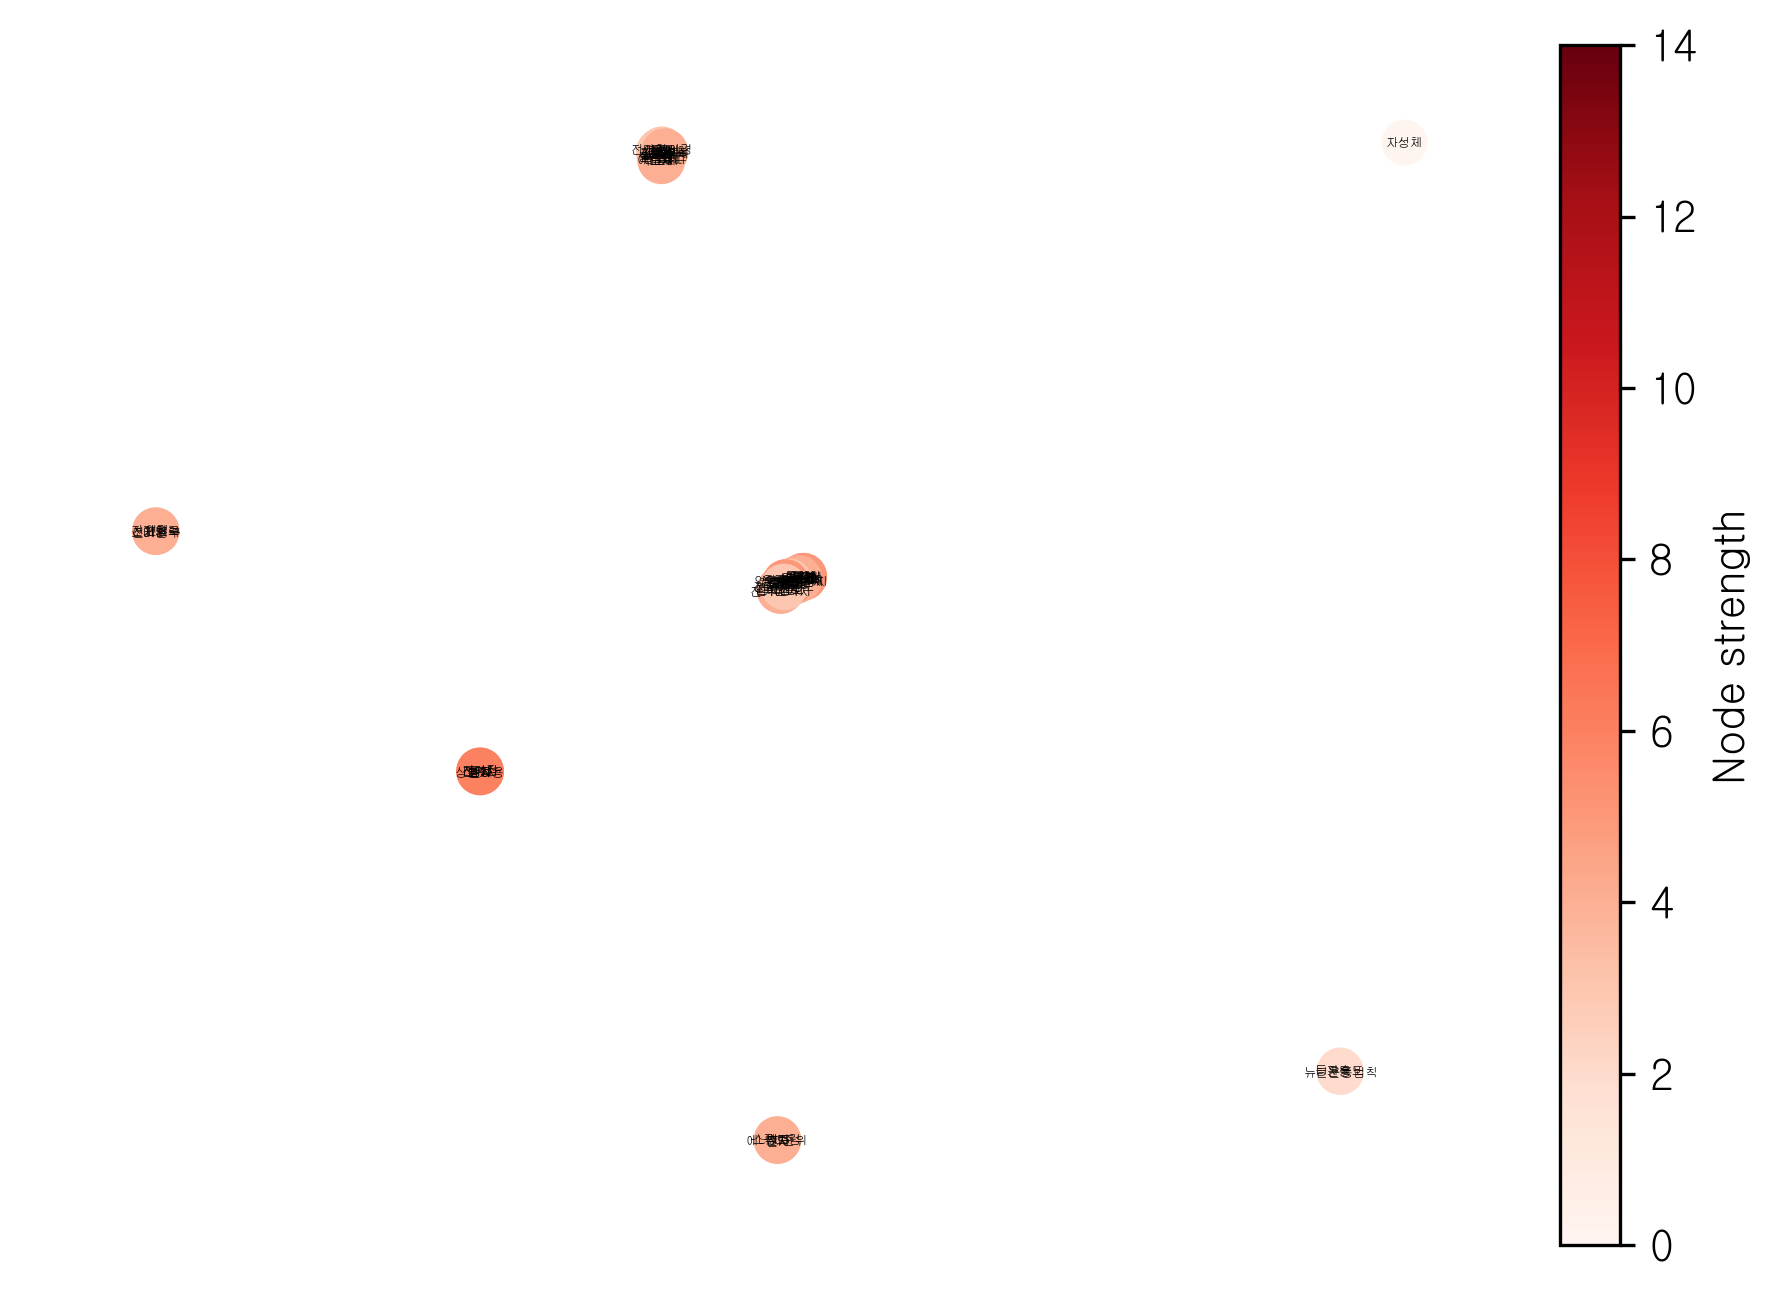

In [47]:
subject_graph_ver2(10000, 14, 1, file_lst[3])

C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


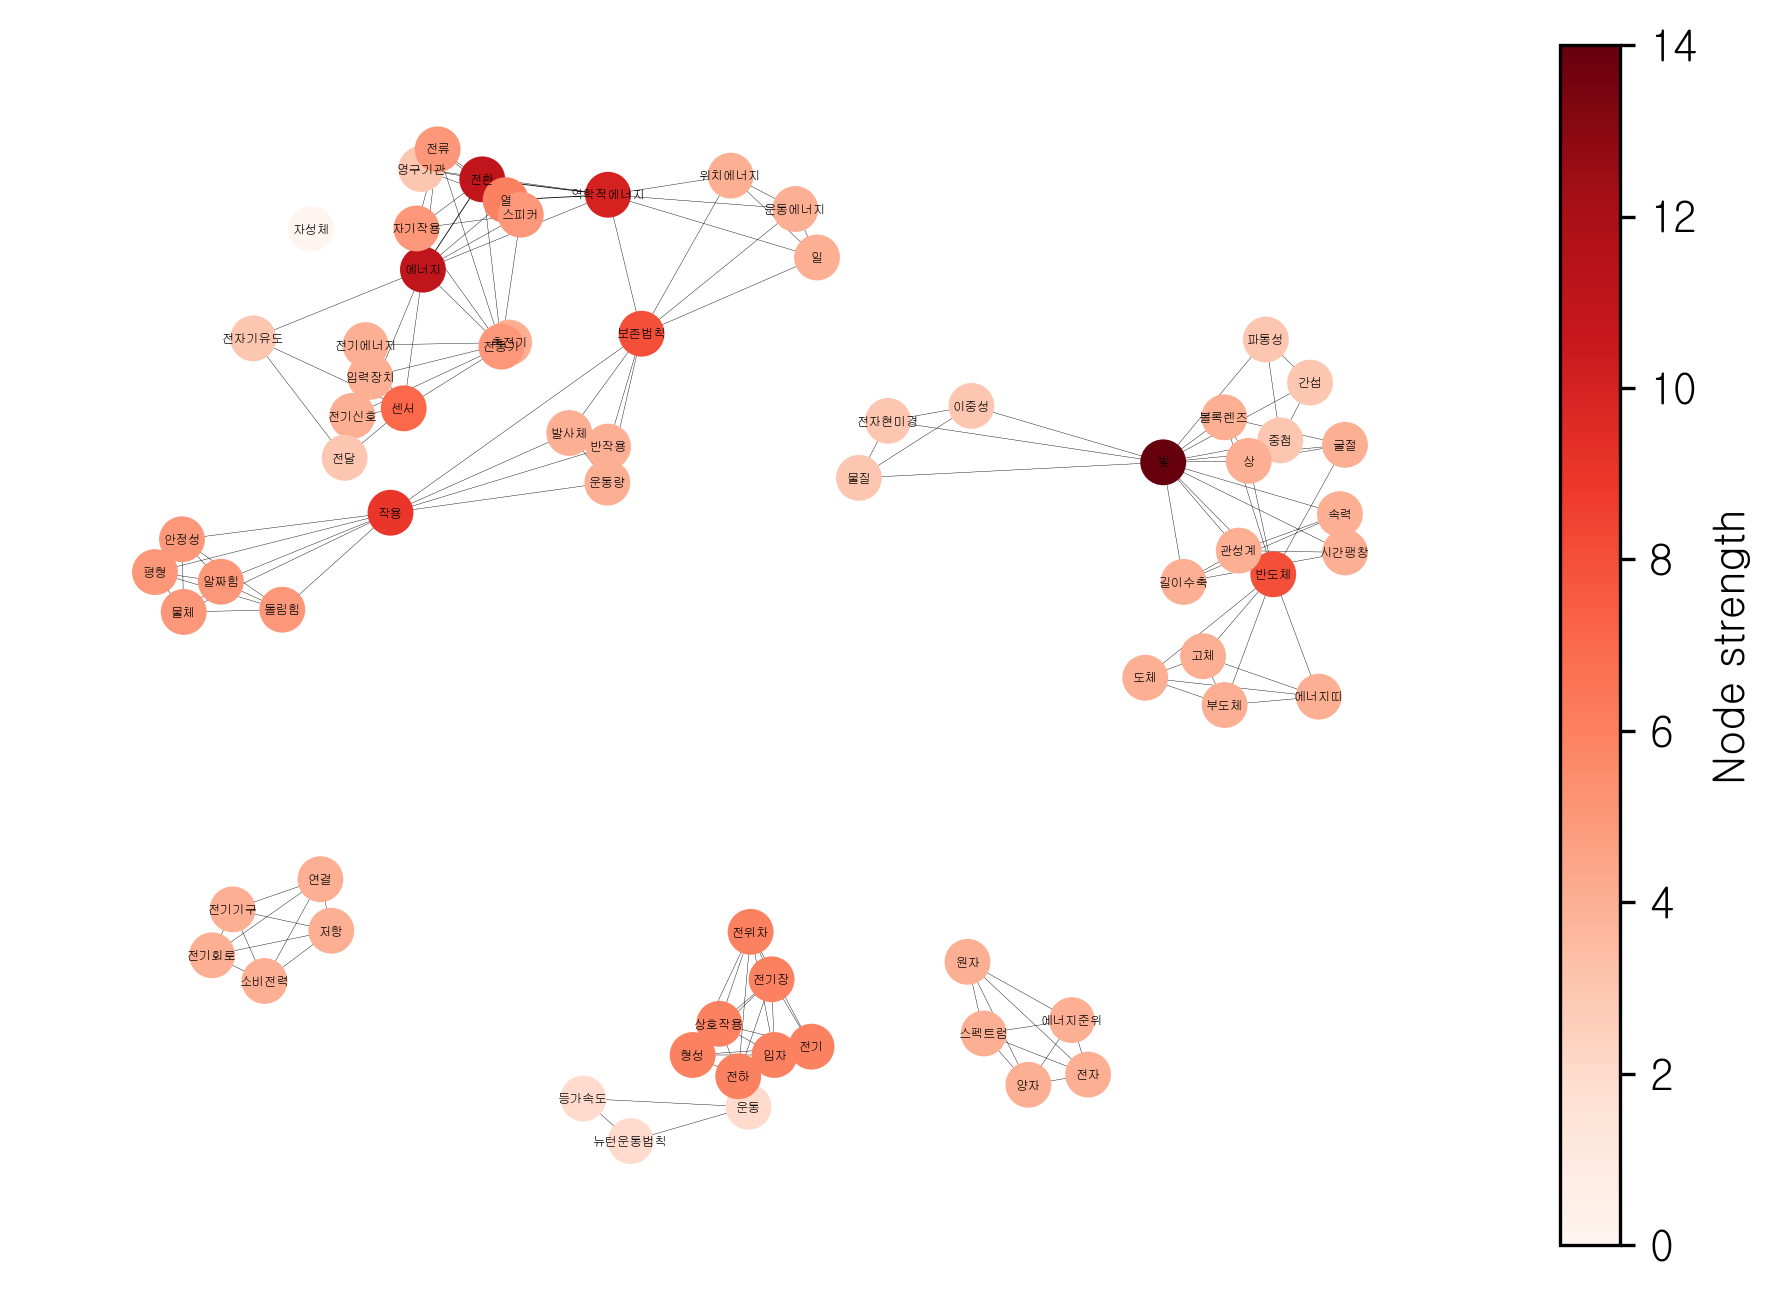

In [48]:
#(itr, seed, k, file_name)
subject_graph_ver2(220,51, 1.5, file_lst[3])

In [70]:
G = graph(3, file_lst[3])

In [71]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 69
Number of edges: 160
WordFreq avg: 1.2, WordFreq std: 0.58
Degree avg: 4.64, Degree std: 2.01
NodeWeight avg: 4.75, NodeWeight std: 2.22
EdgeWeight avg: 1.02, EdgeWeight std: 0.16


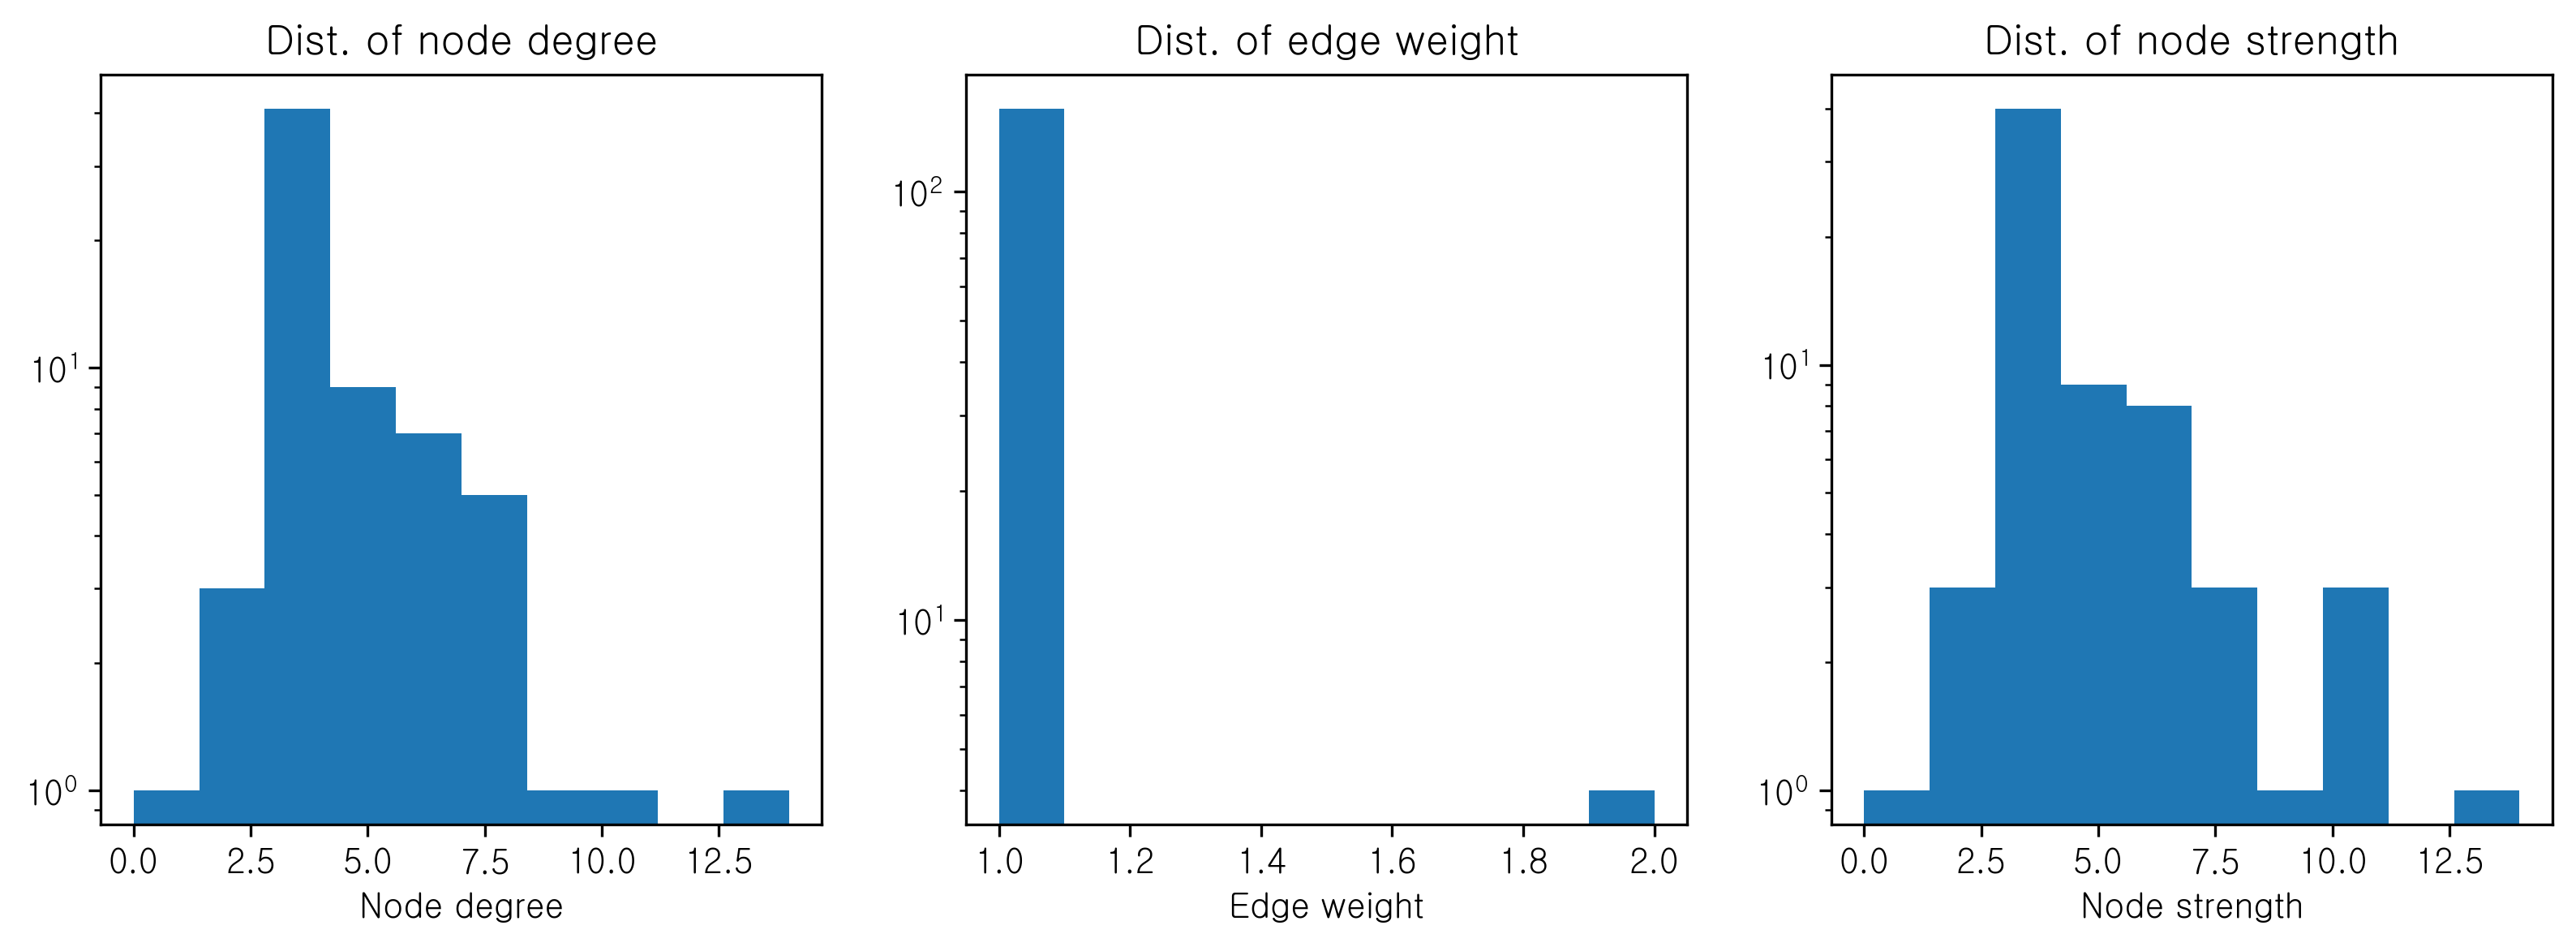

In [72]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values


2: Pass, 8.773093410213537

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: overflow encountered in scalar power
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: invalid value encountered in scalar divide
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
D:\anaconda3\Lib\site-packages\powerlaw.py:1396: RuntimeWarning: overflow encountered in scalar power
  self.Lambda**(1-self.alpha)
D:\anaconda3\Lib\site-packages\powerlaw.py:1808: RuntimeWarning: invalid value encountered in subtract
  ( (loglikelihoods1-loglikelihoods2) - mean_

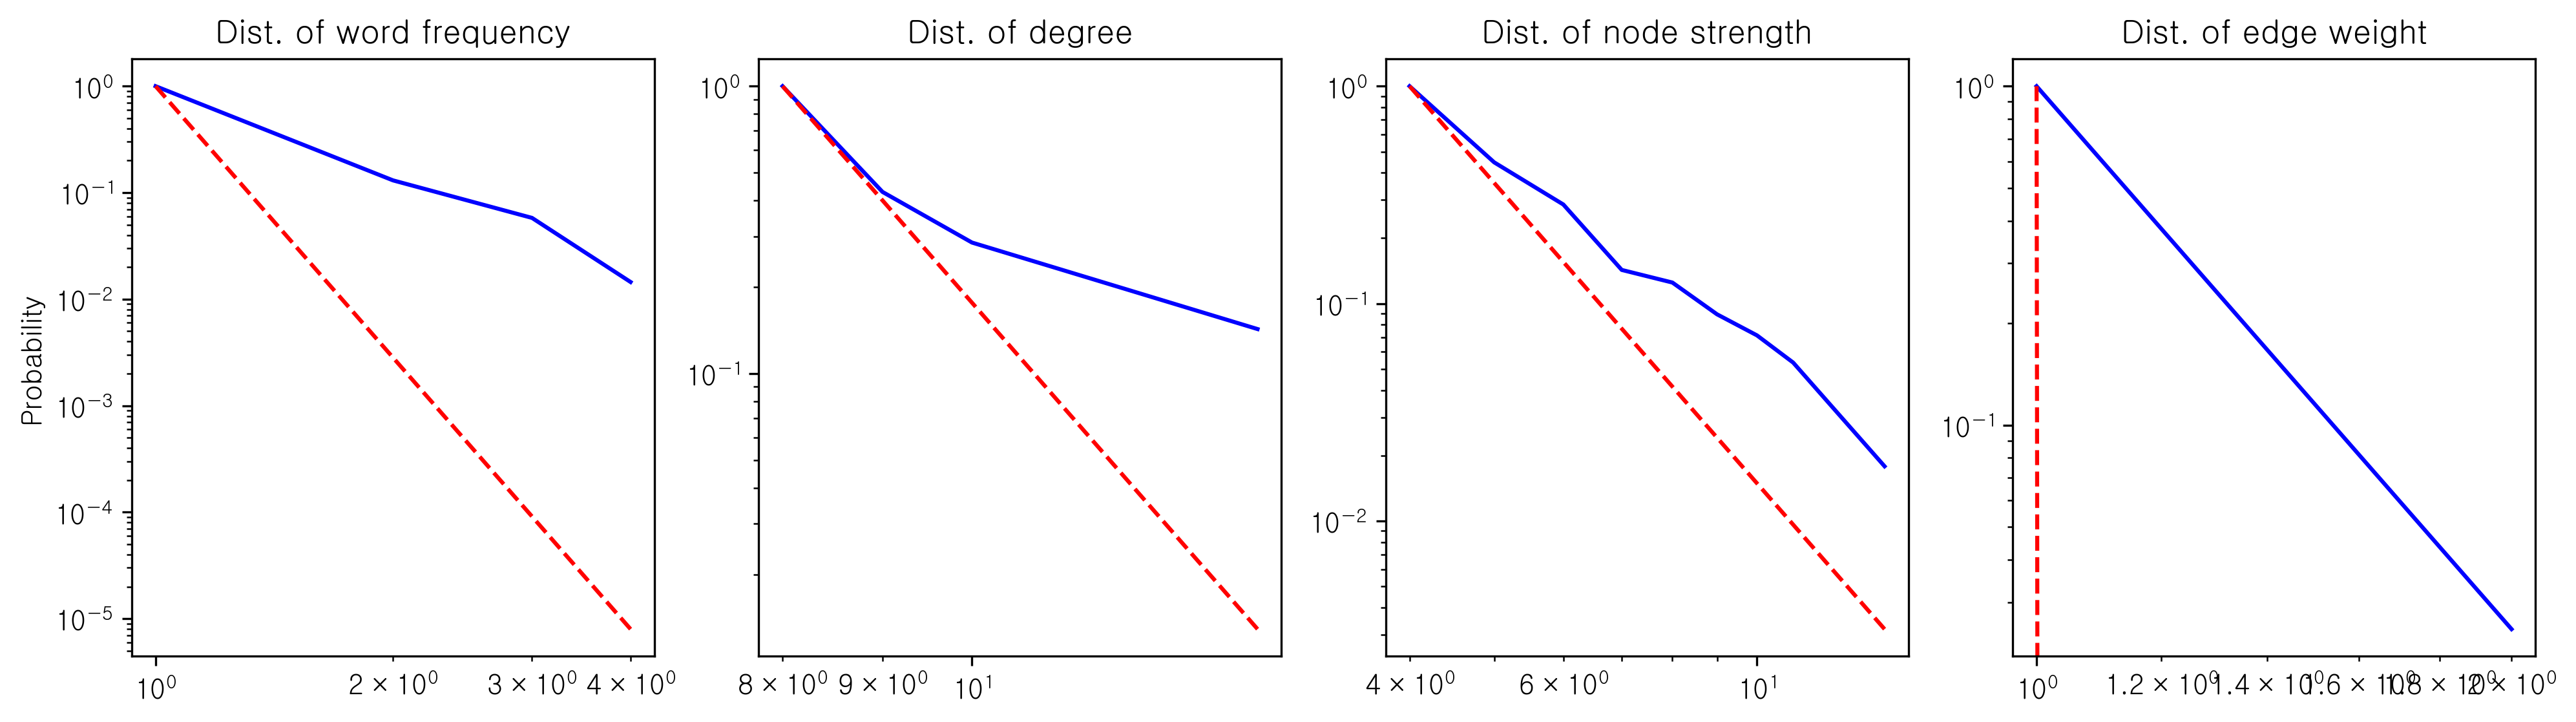

In [73]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [74]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0        빛             4.0       빛         14.0       빛           14.0   
1   역학적에너지             3.0     에너지         10.0      전환           11.0   
2       전환             3.0      작용          9.0     에너지           11.0   
3      에너지             3.0    보존법칙          8.0  역학적에너지           10.0   
4       작용             2.0  역학적에너지          8.0      작용            9.0   
5     보존법칙             2.0      전환          8.0    보존법칙            8.0   
6        열             2.0     반도체          8.0     반도체            8.0   
7       센서             2.0      센서          7.0      센서            7.0   
8      반도체             2.0      전기          6.0       열            6.0   
9      돌림힘             1.0     전위차          6.0      전기            6.0   
10     안정성             1.0      입자          6.0     전위차            6.0   
11     알짜힘             1.0      전하          6.0      입자            6.0   
12      평형             1.0      형성          6.0      전하            6.0   
13      물체             1.0     전기장          6.0      형성            6.0   
14      운동             1.0    상호작용          6.0     전기장            6.0   
15  뉴턴운동법칙             1.0     돌림힘          5.0    상호작용            6.0   
16    등가속도             1.0     안정성          5.0     돌림힘            5.0   
17     운동량             1.0     알짜힘          5.0     안정성            5.0   
18     반작용             1.0      평형          5.0     알짜힘            5.0   
19     발사체             1.0      물체          5.0      평형            5.0   

            Edge  Edge Weight Node_BC  Betweenness Centrality  
0   (역학적에너지, 전환)            2  역학적에너지                0.563022  
1    (역학적에너지, 열)            2     에너지                0.491653  
2        (전환, 열)            2    보존법칙                0.490476  
3      (전환, 에너지)            2      작용                0.341975  
4     (돌림힘, 안정성)            1      전환                0.338539  
5     (돌림힘, 알짜힘)            1      센서                0.286905  
6      (돌림힘, 평형)            1       열                0.160886  
7      (돌림힘, 작용)            1       일                0.112698  
8      (돌림힘, 물체)            1   위치에너지                0.112698  
9     (안정성, 알짜힘)            1   운동에너지                0.112698  
10     (안정성, 평형)            1     운동량                0.091534  
11     (안정성, 작용)            1     반작용                0.091534  
12     (안정성, 물체)            1     발사체                0.091534  
13     (알짜힘, 평형)            1      전달                0.090608  
14     (알짜힘, 작용)            1   전자기유도                0.090608  
15     (알짜힘, 물체)            1    영구기관                0.060730  
16      (평형, 작용)            1      전류                0.060014  
17      (평형, 물체)            1     스피커                0.060014  
18      (작용, 물체)            1    자기작용                0.060014  
19     (작용, 운동량)            1     전동기                0.060014

# 역학과 에너지

C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


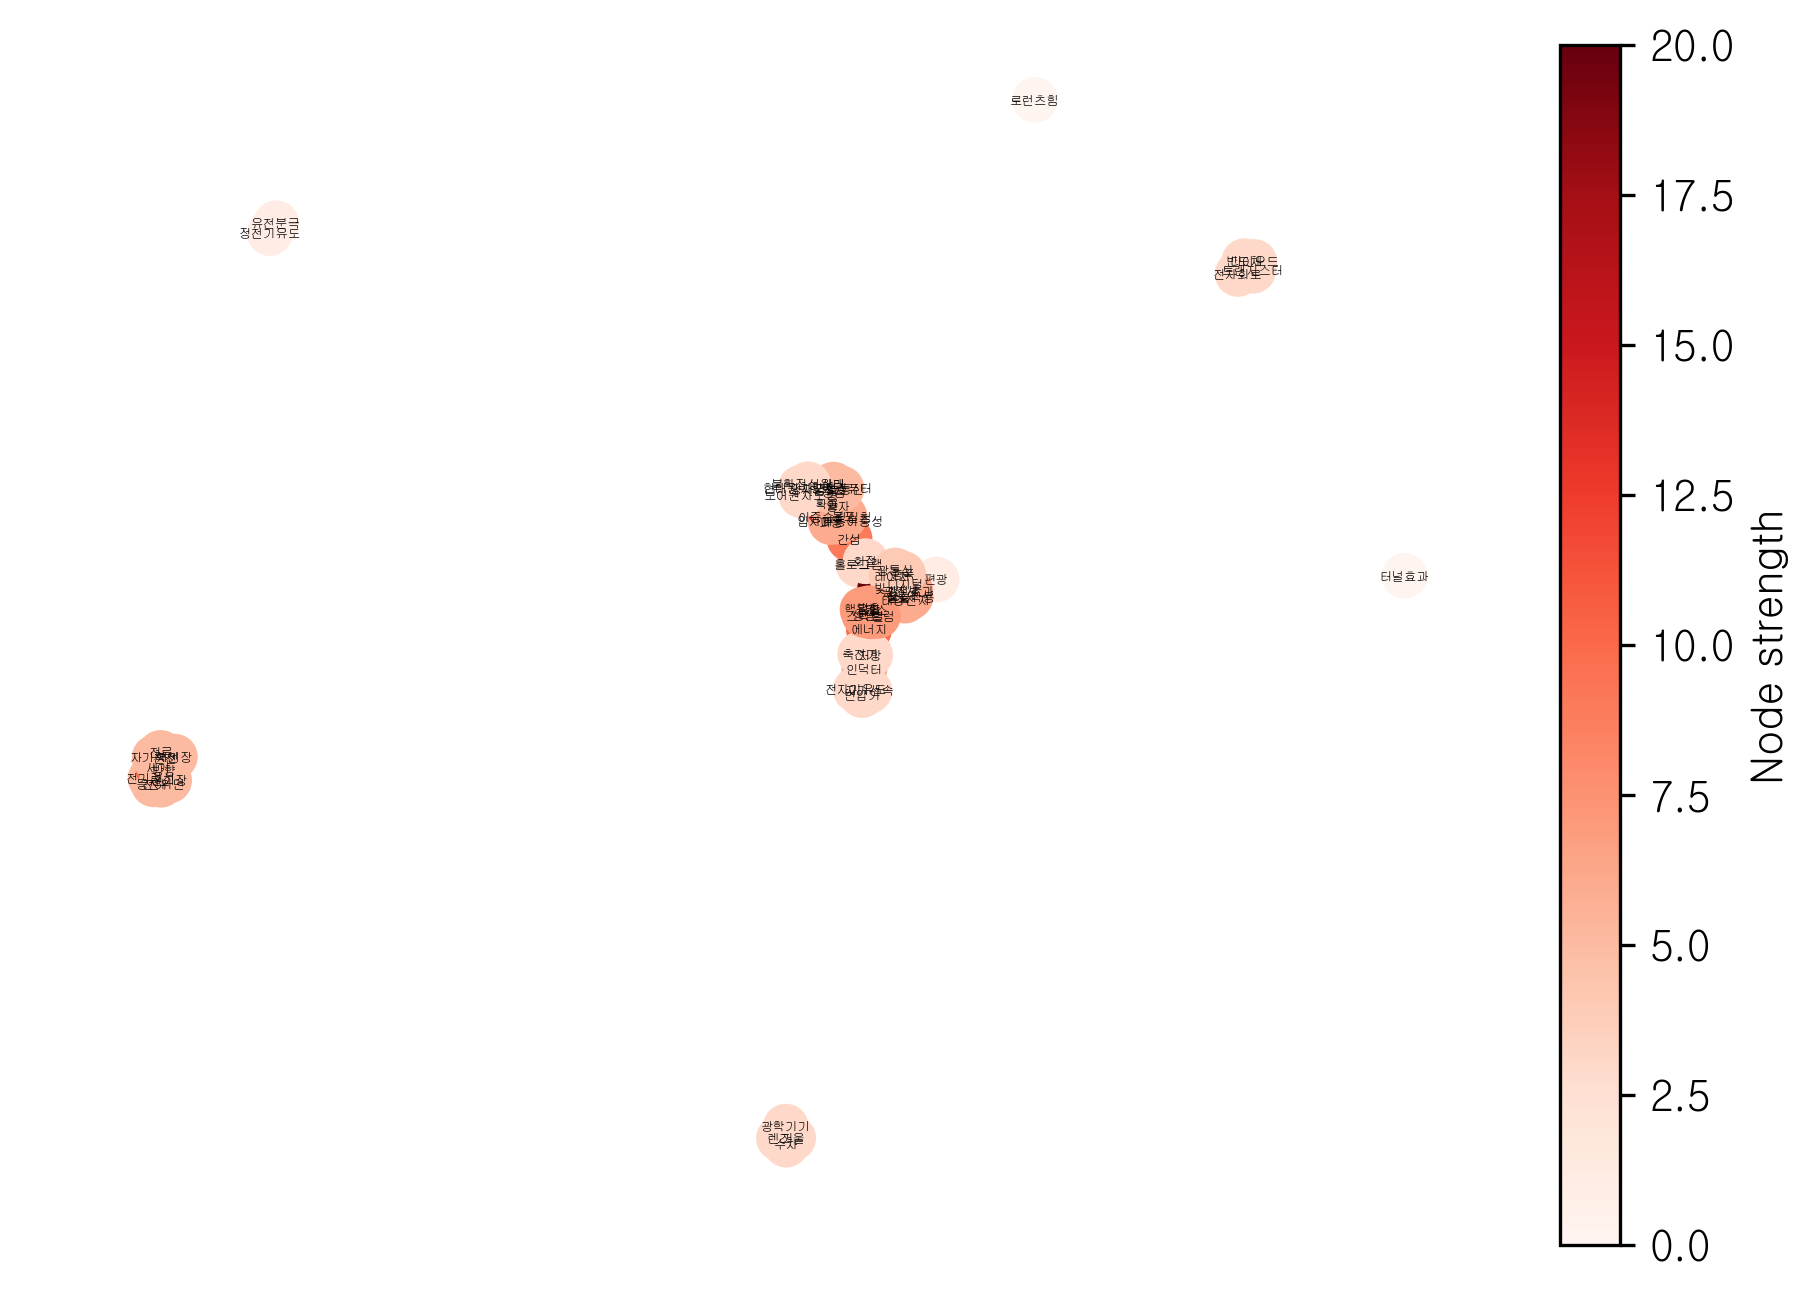

In [55]:
#(itr, seed, k, file_name)
subject_graph_ver2(1000, 1, 1, file_lst[5])

C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


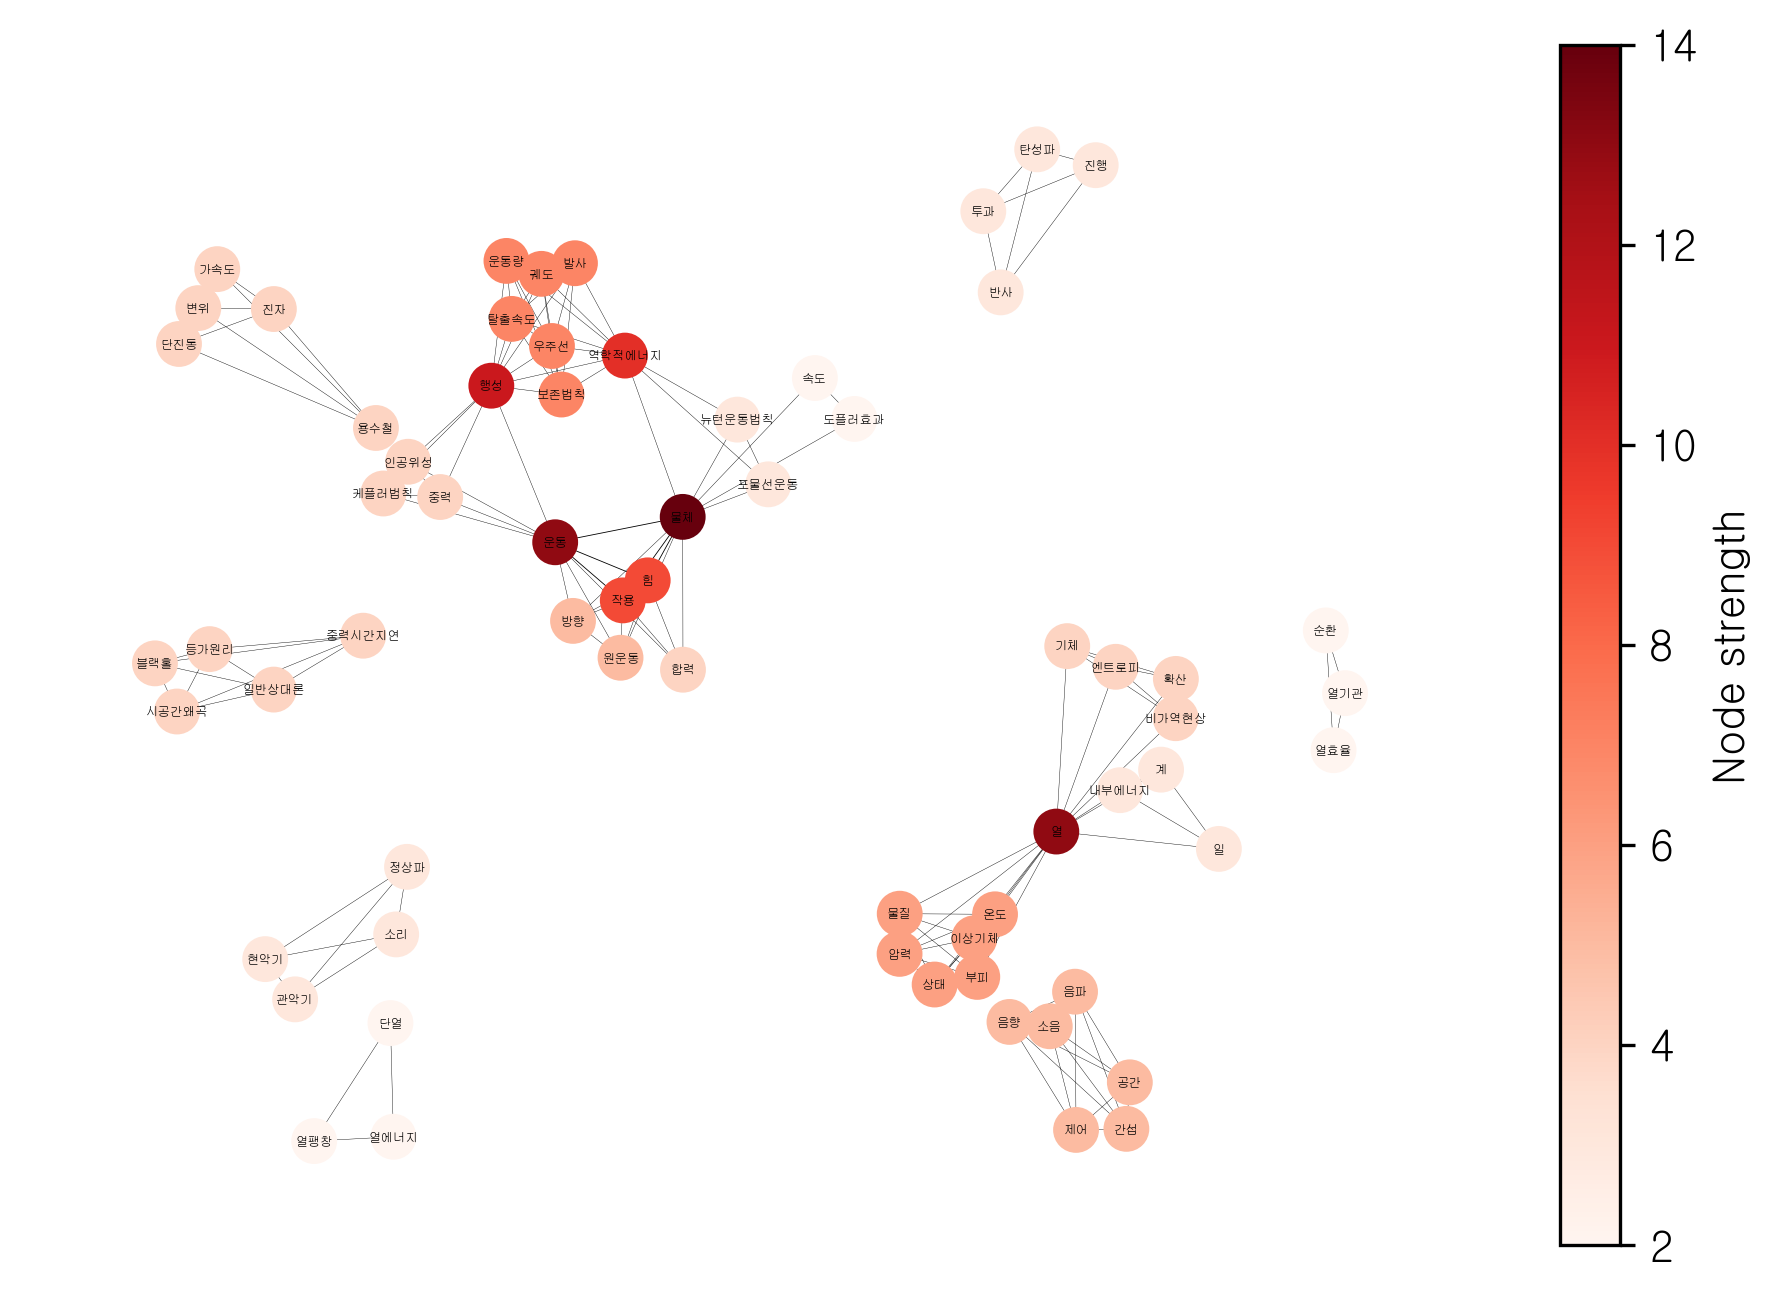

In [56]:
#(itr, seed, k, file_name)
subject_graph_ver2(150,8, 1.0, file_lst[4])

In [75]:
G = graph(3, file_lst[4])

In [76]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 66
Number of edges: 156
WordFreq avg: 1.17, WordFreq std: 0.54
Degree avg: 4.73, Degree std: 2.32
NodeWeight avg: 4.91, NodeWeight std: 2.68
EdgeWeight avg: 1.04, EdgeWeight std: 0.19


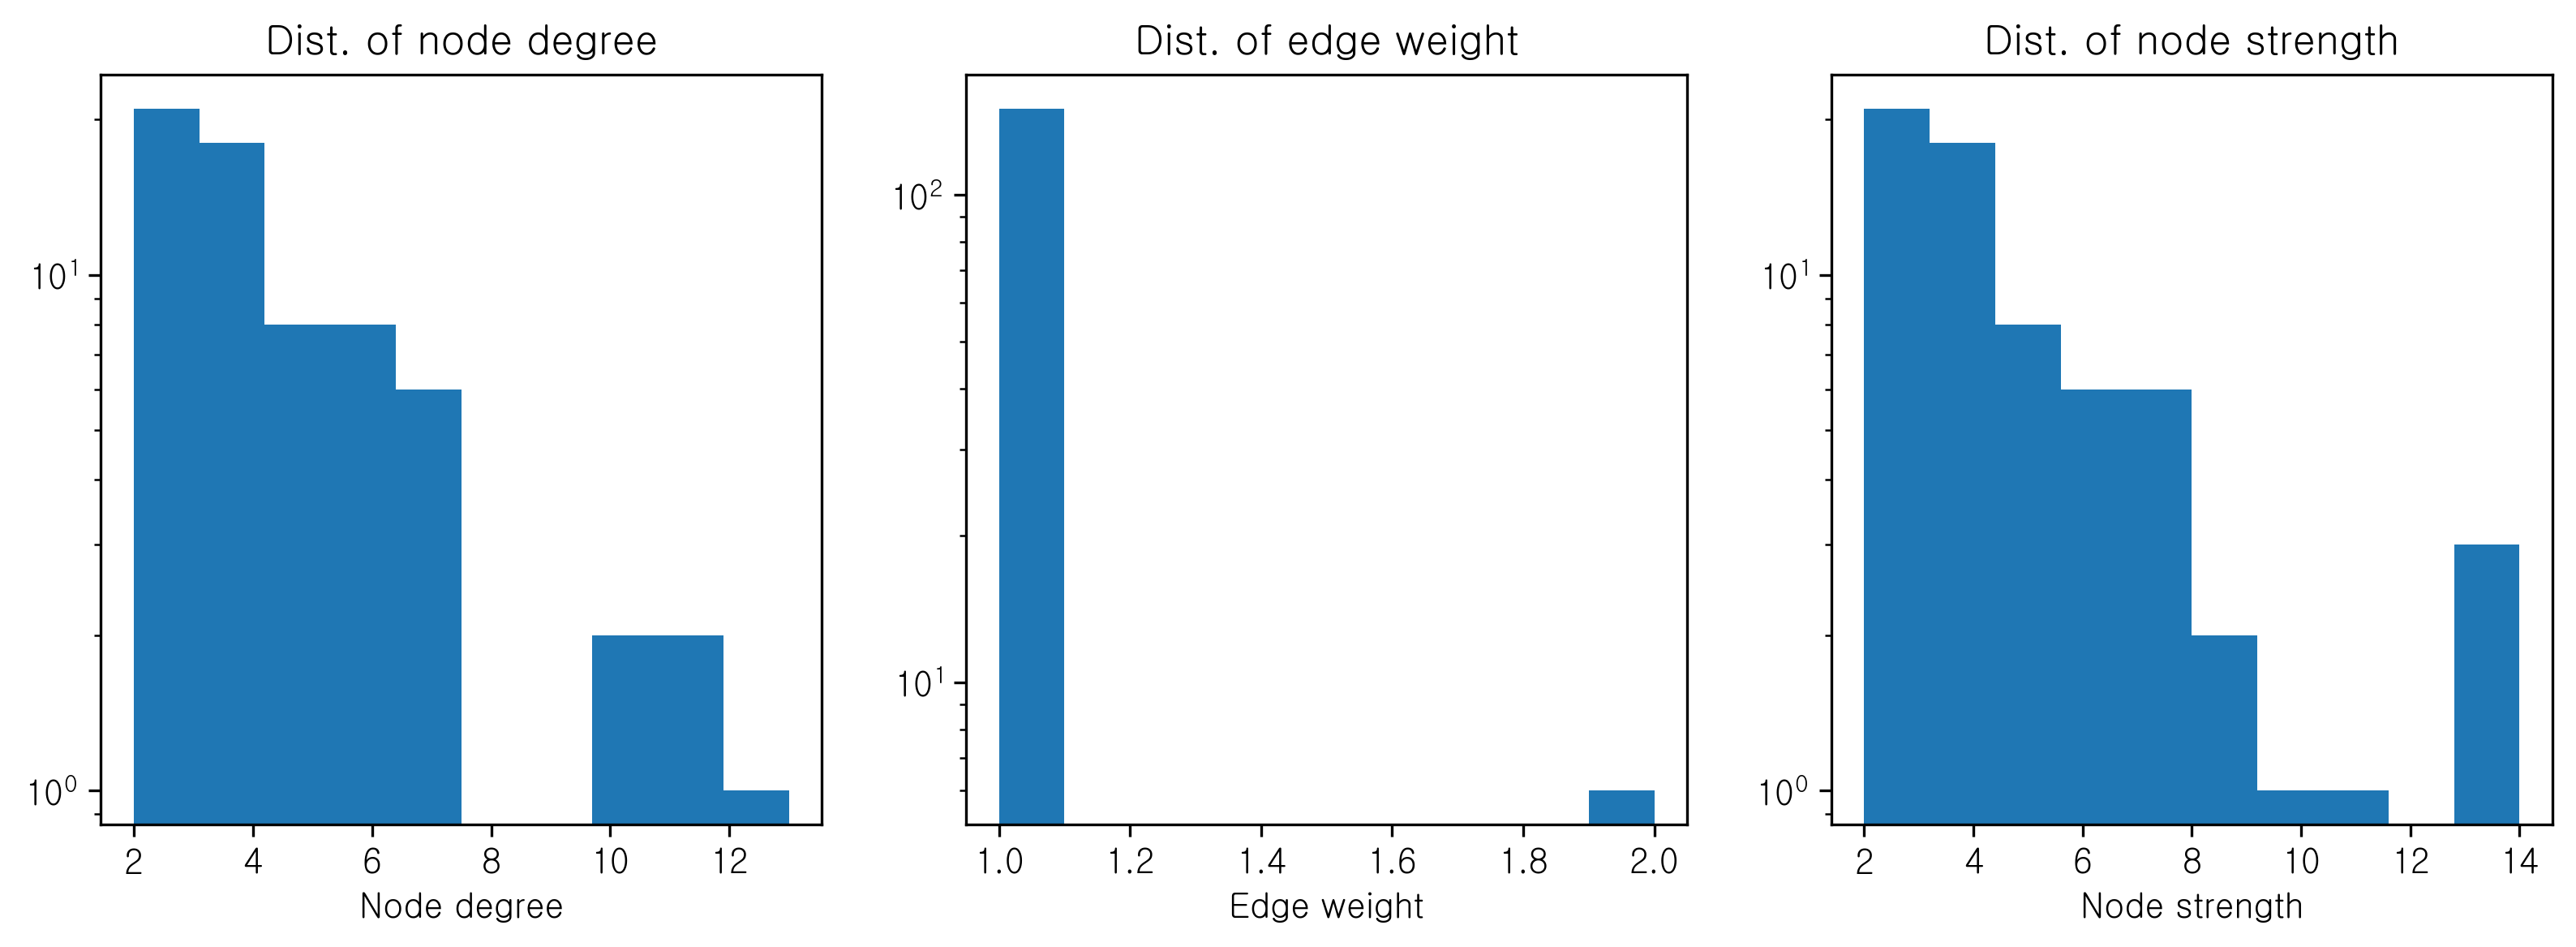

In [77]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: overflow encountered in scalar power
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: invalid value encountered in scalar divide
  C = ( self.Lambda**(1-self.alpha) /
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.


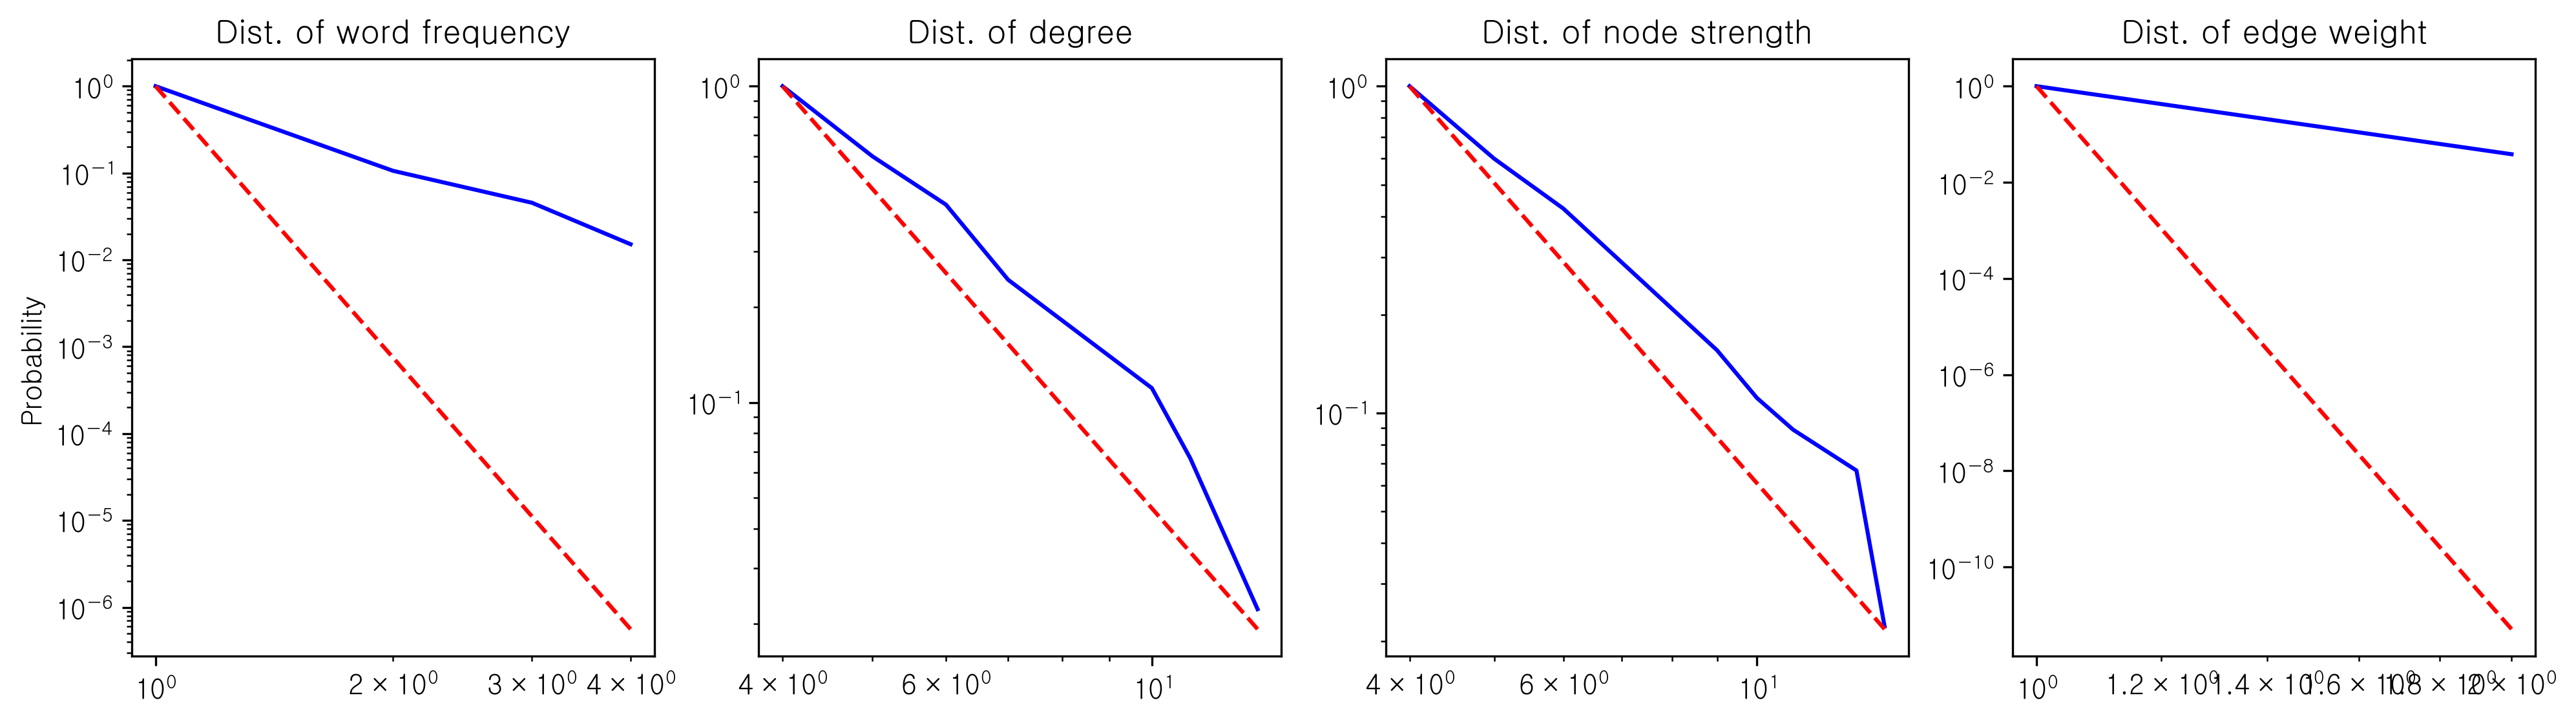

In [78]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [79]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0       물체             4.0       열         13.0      물체           14.0   
1       운동             3.0      물체         11.0      운동           13.0   
2        열             3.0      행성         11.0       열           13.0   
3        힘             2.0      운동         10.0      행성           11.0   
4       작용             2.0  역학적에너지         10.0  역학적에너지           10.0   
5   역학적에너지             2.0     운동량          7.0       힘            9.0   
6       행성             2.0    탈출속도          7.0      작용            9.0   
7       합력             1.0      궤도          7.0     운동량            7.0   
8   뉴턴운동법칙             1.0    보존법칙          7.0    탈출속도            7.0   
9    포물선운동             1.0     우주선          7.0      궤도            7.0   
10      방향             1.0      발사          7.0    보존법칙            7.0   
11     원운동             1.0       힘          6.0     우주선            7.0   
12    인공위성             1.0      작용          6.0      발사            7.0   
13      중력             1.0      물질          6.0      물질            6.0   
14   케플러법칙             1.0      온도          6.0      온도            6.0   
15     운동량             1.0    이상기체          6.0    이상기체            6.0   
16    탈출속도             1.0      상태          6.0      상태            6.0   
17      궤도             1.0      부피          6.0      부피            6.0   
18    보존법칙             1.0      압력          6.0      압력            6.0   
19     우주선             1.0      방향          5.0      방향            5.0   

           Edge  Edge Weight Node_BC  Betweenness Centrality  
0       (운동, 힘)            2      물체                0.451729  
1      (운동, 작용)            2      운동                0.376993  
2      (운동, 물체)            2      행성                0.352644  
3       (힘, 작용)            2  역학적에너지                0.316766  
4       (힘, 물체)            2      작용                0.108096  
5      (작용, 물체)            2       힘                0.108096  
6      (운동, 합력)            1      중력                0.084323  
7      (운동, 방향)            1    인공위성                0.084323  
8     (운동, 원운동)            1   케플러법칙                0.084323  
9    (운동, 인공위성)            1   포물선운동                0.082907  
10     (운동, 중력)            1  뉴턴운동법칙                0.082907  
11     (운동, 행성)            1      궤도                0.069909  
12  (운동, 케플러법칙)            1    보존법칙                0.069909  
13      (힘, 합력)            1     운동량                0.069909  
14      (힘, 방향)            1    탈출속도                0.069909  
15     (힘, 원운동)            1     우주선                0.069909  
16     (작용, 합력)            1      발사                0.069909  
17     (작용, 방향)            1      방향                0.053538  
18    (작용, 원운동)            1     원운동                0.053538  
19     (물체, 합력)            1      합력                0.042350

# 전자기와 양자

C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


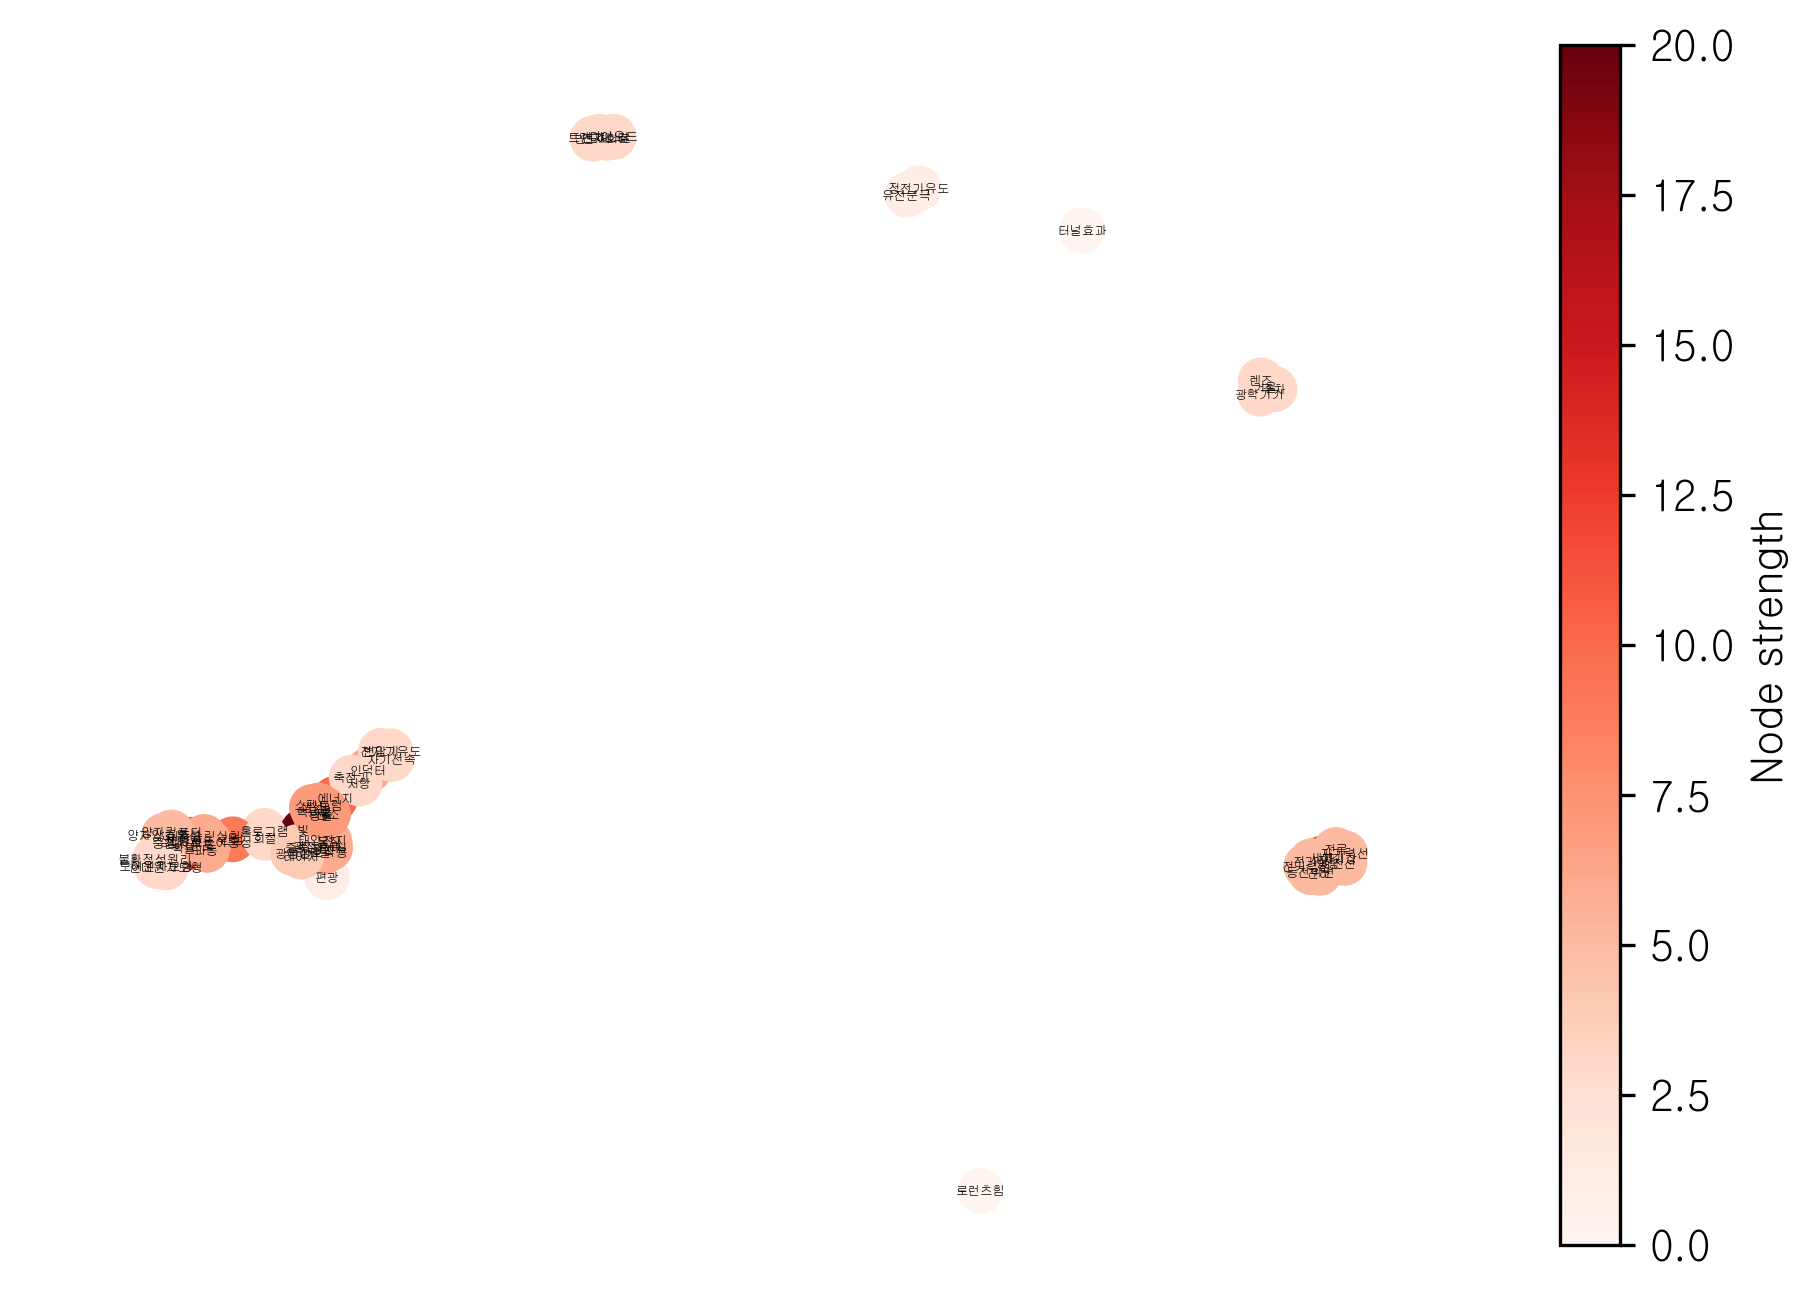

In [63]:
subject_graph_ver2(1000, 10, 1, file_lst[5])

C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # viridis 컬러맵 사용
C:\Users\user\AppData\Local\Temp\ipykernel_37040\2818870238.py:55: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Node strength')


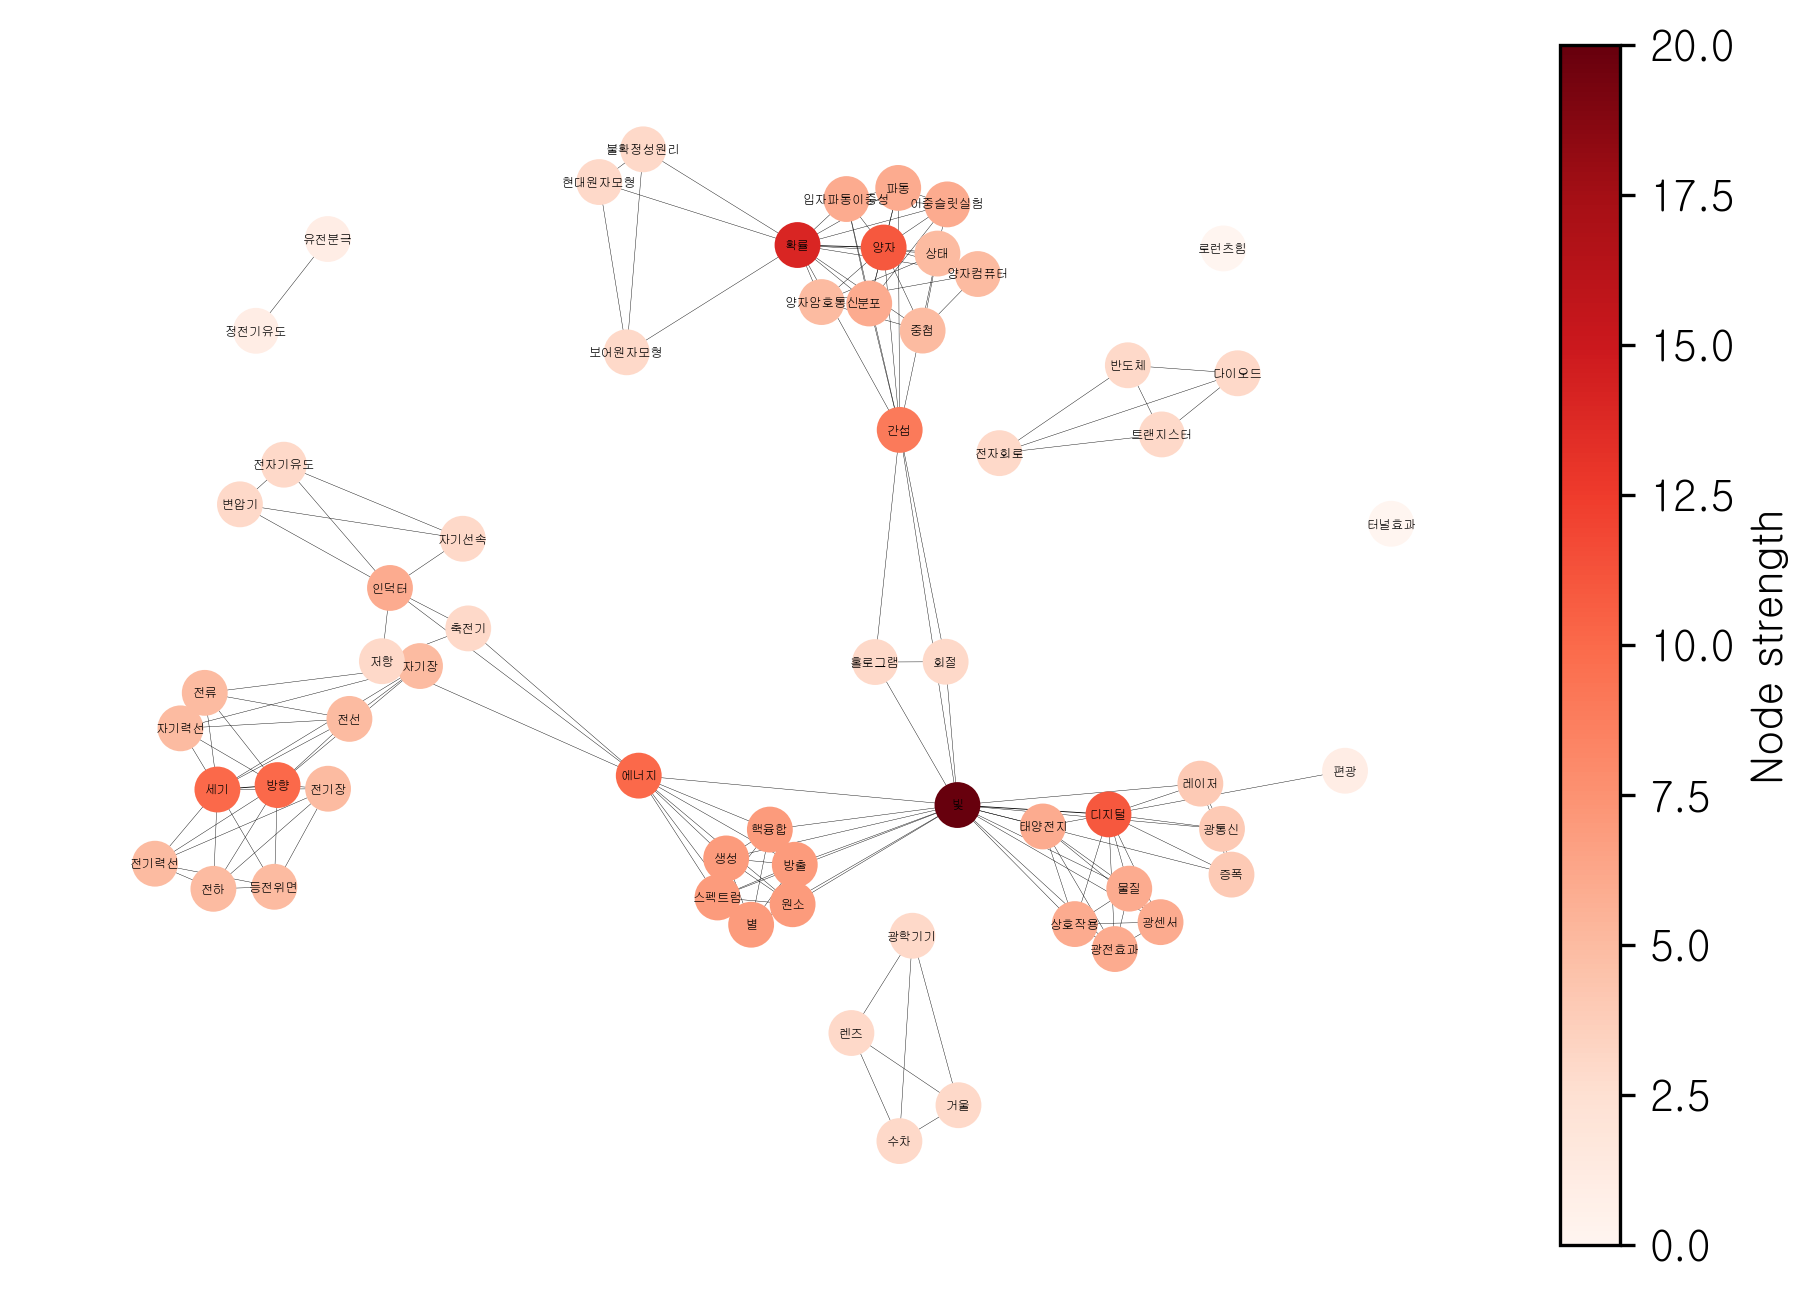

In [64]:
subject_graph_ver2(120, 1, 1, file_lst[5])

In [80]:
G = graph(3, file_lst[5])

In [81]:
hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight = basic_info(G)

Number of nodes: 62
Number of edges: 160
WordFreq avg: 1.21, WordFreq std: 0.57
Degree avg: 5.16, Degree std: 3.08
NodeWeight avg: 5.26, NodeWeight std: 3.29
EdgeWeight avg: 1.02, EdgeWeight std: 0.14


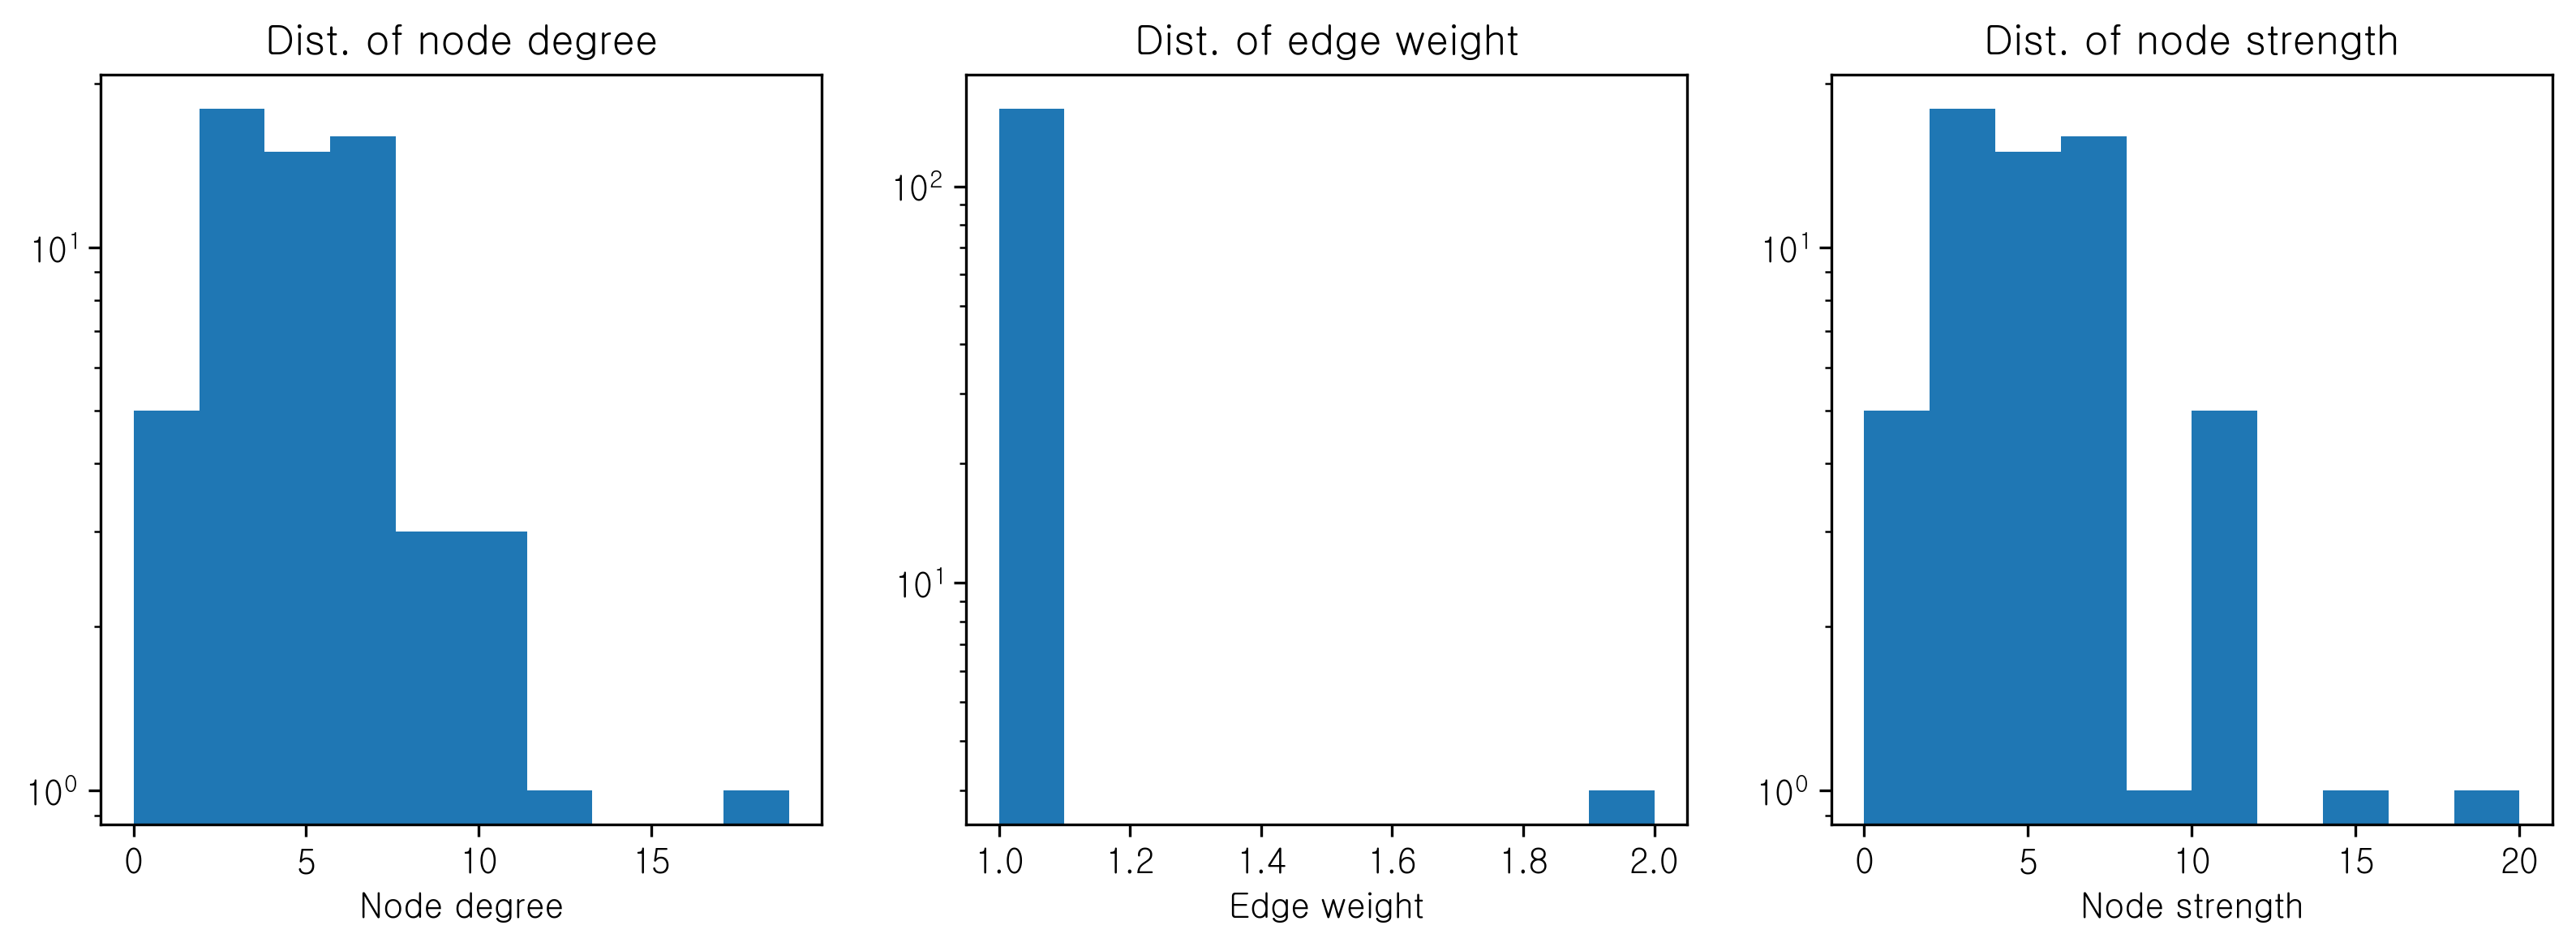

In [82]:
hist_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
2: Pass, 6.590415175877457



Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1615: RuntimeWarning: invalid value encountered in divide
  CDF = CDF/norm
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values
Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
3: Pass, 4.4278839931158736

Calculating best minimal value for power law fit


Assuming nested distributions
'nan' in fit cumulative distribution values.
Likely underflow or overflow error: the optimal fit for this distribution gives values that are so extreme that we lack the numerical precision to calculate them.
Assuming nested distributions
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: overflow encountered in scalar power
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\powerlaw.py:1408: RuntimeWarning: invalid value encountered in scalar divide
  C = ( self.Lambda**(1-self.alpha) /
D:\anaconda3\Lib\site-packages\scipy\optimize\_optimize.py:917: RuntimeWarning: invalid value encountered in subtract
  np.max(np.abs(fsim[0] - fsim[1:])) <= fatol):
D:\anaconda3\Lib\site-packages\powerlaw.py:1396: RuntimeWarning: overflow encountered in scalar power
  self.Lambda**(1-self.alpha)
D:\anaconda3\Lib\site-packages\powerlaw.py:1808: RuntimeWarning: invalid value encountered in subtract
  ( (loglikelihoods1-loglikelihoods2) - mean_

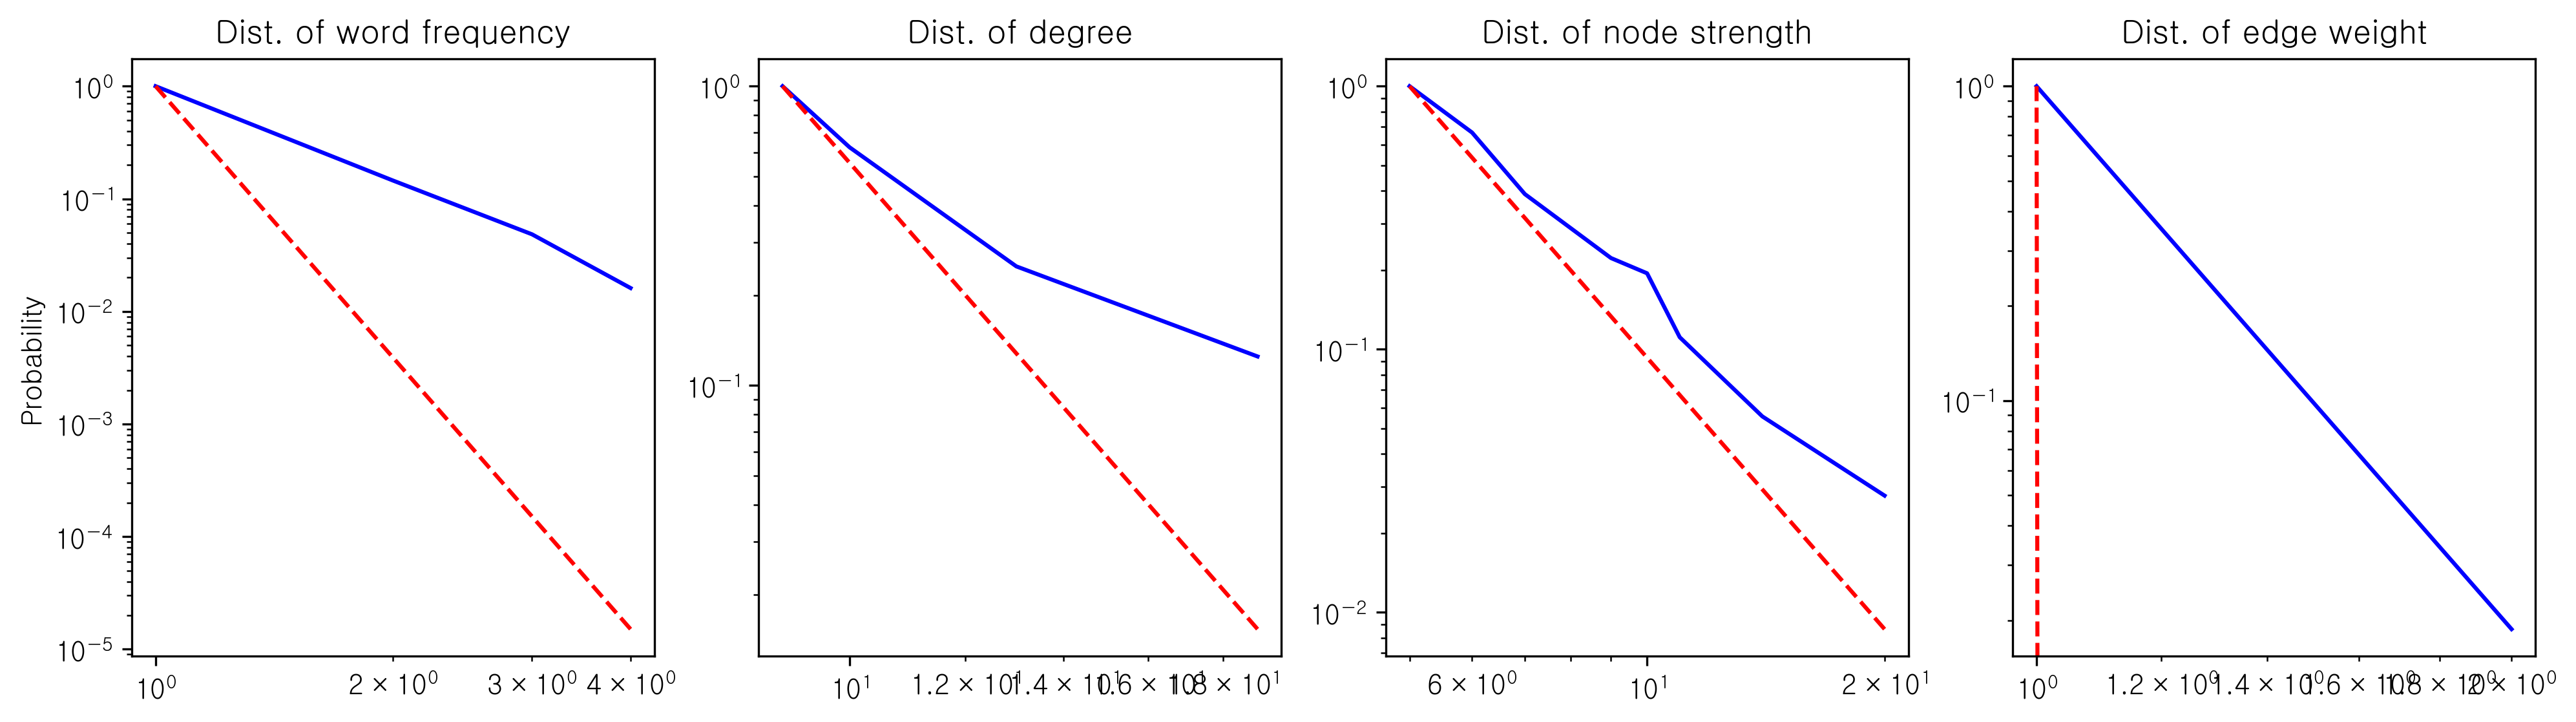

In [83]:
power_plot(hist_wordFreq, hist_edges, hist_nodeWeight, hist_edgeWeight)

In [84]:
df = info(G)
df.head(20)

Node_F  Node Frequency Node_ND  Node Degree Node_NS  Node Strength  \
0       빛             4.0       빛         19.0       빛           20.0   
1     디지털             3.0      확률         13.0      확률           14.0   
2      확률             3.0     에너지         10.0     디지털           11.0   
3      방향             2.0     디지털         10.0      양자           11.0   
4      세기             2.0      양자         10.0      방향           10.0   
5     인덕터             2.0      방향          9.0      세기           10.0   
6     에너지             2.0      세기          9.0     에너지           10.0   
7      간섭             2.0      간섭          9.0      간섭            9.0   
8      양자             2.0      방출          7.0      방출            7.0   
9    전기력선             1.0      생성          7.0      생성            7.0   
10     전하             1.0     핵융합          7.0     핵융합            7.0   
11   등전위면             1.0      원소          7.0      원소            7.0   
12    전기장             1.0       별          7.0       별            7.0   
13   유전분극             1.0    스펙트럼          7.0    스펙트럼            7.0   
14  정전기유도             1.0     인덕터          6.0     인덕터            6.0   
15     전선             1.0      물질          6.0      물질            6.0   
16   자기력선             1.0    광전효과          6.0    광전효과            6.0   
17    자기장             1.0    태양전지          6.0    태양전지            6.0   
18     전류             1.0    상호작용          6.0    상호작용            6.0   
19   로런츠힘             1.0     광센서          6.0     광센서            6.0   

            Edge  Edge Weight  Node_BC  Betweenness Centrality  
0       (방향, 세기)            2        빛                0.711296  
1       (빛, 디지털)            2       간섭                0.482223  
2       (양자, 확률)            2      에너지                0.300101  
3     (방향, 전기력선)            1       확률                0.268500  
4       (방향, 전하)            1      인덕터                0.170040  
5     (방향, 등전위면)            1      디지털                0.168730  
6      (방향, 전기장)            1       양자                0.165962  
7       (방향, 전선)            1       회절                0.126181  
8     (방향, 자기력선)            1     홀로그램                0.126181  
9      (방향, 자기장)            1       파동                0.069701  
10      (방향, 전류)            1   이중슬릿실험                0.069701  
11    (전기력선, 전하)            1       분포                0.069701  
12    (전기력선, 세기)            1  입자파동이중성                0.069701  
13  (전기력선, 등전위면)            1     스펙트럼                0.062247  
14   (전기력선, 전기장)            1       방출                0.062247  
15      (전하, 세기)            1        별                0.062247  
16    (전하, 등전위면)            1       원소                0.062247  
17     (전하, 전기장)            1       생성                0.062247  
18    (세기, 등전위면)            1      핵융합                0.062247  
19     (세기, 전기장)            1      축전기                0.058704